In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
oil = pd.read_csv('oil_sentiment.csv')
climate = pd.read_csv('climate_sentiment.csv')
emicom = pd.read_csv('emission_consumption.csv')
price = pd.read_csv('all_commodities.csv')

In [6]:
oil_price = price[price['Commodity'] == 'Brent Crude Oil']
oil_price.drop(['Unit', 'Commodity', 'Commodity_Simple'], axis=1, inplace=True)

In [15]:
oil_price['Date_Time'] = pd.to_datetime(oil_price['Date_Time'])
oil_price.set_index('Date_Time', inplace=True)
oil_price

/var/folders/2f/cvmbnp4s1r362w323xc1fx800000gn/T/ipykernel_67685/3093365293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oil_price['Date_Time'] = pd.to_datetime(oil_price['Date_Time'])


,Value
Date_Time,
2024-01-22,81.70
2024-01-19,80.71
2024-01-18,81.04
2024-01-17,78.88
2024-01-16,80.15
...,...
1987-05-26,18.63
1987-05-25,18.60
1987-05-22,18.55


In [29]:
# map sentiment to numerical values
climate['sentiment'] = climate['Sentiments'].map({'positive': 1, 'negative': -1, 'neutral': 0})
climate['date'] = pd.to_datetime(climate['date'])
climate_sum = climate.groupby('date').sum()

/var/folders/2f/cvmbnp4s1r362w323xc1fx800000gn/T/ipykernel_67685/1708485108.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  climate_sum = climate.groupby('date').sum()


pandas.core.frame.DataFrame

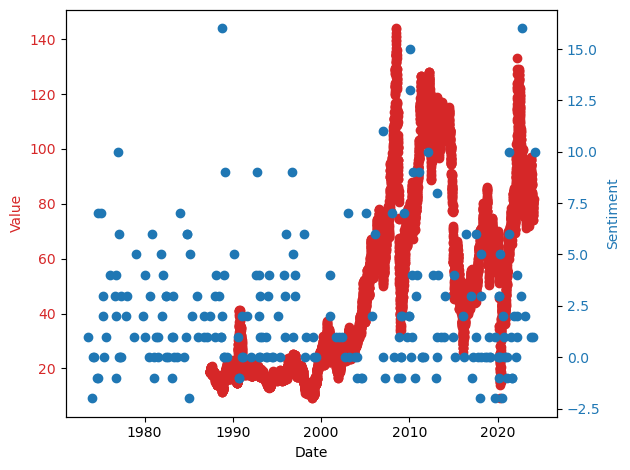

In [32]:
# plot oil prices with climate sentiment
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Value', color=color)
ax1.scatter(oil_price.index, oil_price['Value'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Sentiment', color=color)
ax2.scatter(climate_sum.index, climate_sum['sentiment'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [33]:
# find correlation between oil prices and climate sentiment
oil_price = oil_price.resample('D').mean()
climate_sum = climate_sum.resample('D').mean()
oil_price = oil_price.loc[climate_sum.index]
correlation = oil_price.corrwith(climate_sum)
correlation

KeyError: "[Timestamp('1973-08-15 00:00:00'), Timestamp('1973-08-16 00:00:00'), Timestamp('1973-08-17 00:00:00'), Timestamp('1973-08-18 00:00:00'), Timestamp('1973-08-19 00:00:00'), Timestamp('1973-08-20 00:00:00'), Timestamp('1973-08-21 00:00:00'), Timestamp('1973-08-22 00:00:00'), Timestamp('1973-08-23 00:00:00'), Timestamp('1973-08-24 00:00:00'), Timestamp('1973-08-25 00:00:00'), Timestamp('1973-08-26 00:00:00'), Timestamp('1973-08-27 00:00:00'), Timestamp('1973-08-28 00:00:00'), Timestamp('1973-08-29 00:00:00'), Timestamp('1973-08-30 00:00:00'), Timestamp('1973-08-31 00:00:00'), Timestamp('1973-09-01 00:00:00'), Timestamp('1973-09-02 00:00:00'), Timestamp('1973-09-03 00:00:00'), Timestamp('1973-09-04 00:00:00'), Timestamp('1973-09-05 00:00:00'), Timestamp('1973-09-06 00:00:00'), Timestamp('1973-09-07 00:00:00'), Timestamp('1973-09-08 00:00:00'), Timestamp('1973-09-09 00:00:00'), Timestamp('1973-09-10 00:00:00'), Timestamp('1973-09-11 00:00:00'), Timestamp('1973-09-12 00:00:00'), Timestamp('1973-09-13 00:00:00'), Timestamp('1973-09-14 00:00:00'), Timestamp('1973-09-15 00:00:00'), Timestamp('1973-09-16 00:00:00'), Timestamp('1973-09-17 00:00:00'), Timestamp('1973-09-18 00:00:00'), Timestamp('1973-09-19 00:00:00'), Timestamp('1973-09-20 00:00:00'), Timestamp('1973-09-21 00:00:00'), Timestamp('1973-09-22 00:00:00'), Timestamp('1973-09-23 00:00:00'), Timestamp('1973-09-24 00:00:00'), Timestamp('1973-09-25 00:00:00'), Timestamp('1973-09-26 00:00:00'), Timestamp('1973-09-27 00:00:00'), Timestamp('1973-09-28 00:00:00'), Timestamp('1973-09-29 00:00:00'), Timestamp('1973-09-30 00:00:00'), Timestamp('1973-10-01 00:00:00'), Timestamp('1973-10-02 00:00:00'), Timestamp('1973-10-03 00:00:00'), Timestamp('1973-10-04 00:00:00'), Timestamp('1973-10-05 00:00:00'), Timestamp('1973-10-06 00:00:00'), Timestamp('1973-10-07 00:00:00'), Timestamp('1973-10-08 00:00:00'), Timestamp('1973-10-09 00:00:00'), Timestamp('1973-10-10 00:00:00'), Timestamp('1973-10-11 00:00:00'), Timestamp('1973-10-12 00:00:00'), Timestamp('1973-10-13 00:00:00'), Timestamp('1973-10-14 00:00:00'), Timestamp('1973-10-15 00:00:00'), Timestamp('1973-10-16 00:00:00'), Timestamp('1973-10-17 00:00:00'), Timestamp('1973-10-18 00:00:00'), Timestamp('1973-10-19 00:00:00'), Timestamp('1973-10-20 00:00:00'), Timestamp('1973-10-21 00:00:00'), Timestamp('1973-10-22 00:00:00'), Timestamp('1973-10-23 00:00:00'), Timestamp('1973-10-24 00:00:00'), Timestamp('1973-10-25 00:00:00'), Timestamp('1973-10-26 00:00:00'), Timestamp('1973-10-27 00:00:00'), Timestamp('1973-10-28 00:00:00'), Timestamp('1973-10-29 00:00:00'), Timestamp('1973-10-30 00:00:00'), Timestamp('1973-10-31 00:00:00'), Timestamp('1973-11-01 00:00:00'), Timestamp('1973-11-02 00:00:00'), Timestamp('1973-11-03 00:00:00'), Timestamp('1973-11-04 00:00:00'), Timestamp('1973-11-05 00:00:00'), Timestamp('1973-11-06 00:00:00'), Timestamp('1973-11-07 00:00:00'), Timestamp('1973-11-08 00:00:00'), Timestamp('1973-11-09 00:00:00'), Timestamp('1973-11-10 00:00:00'), Timestamp('1973-11-11 00:00:00'), Timestamp('1973-11-12 00:00:00'), Timestamp('1973-11-13 00:00:00'), Timestamp('1973-11-14 00:00:00'), Timestamp('1973-11-15 00:00:00'), Timestamp('1973-11-16 00:00:00'), Timestamp('1973-11-17 00:00:00'), Timestamp('1973-11-18 00:00:00'), Timestamp('1973-11-19 00:00:00'), Timestamp('1973-11-20 00:00:00'), Timestamp('1973-11-21 00:00:00'), Timestamp('1973-11-22 00:00:00'), Timestamp('1973-11-23 00:00:00'), Timestamp('1973-11-24 00:00:00'), Timestamp('1973-11-25 00:00:00'), Timestamp('1973-11-26 00:00:00'), Timestamp('1973-11-27 00:00:00'), Timestamp('1973-11-28 00:00:00'), Timestamp('1973-11-29 00:00:00'), Timestamp('1973-11-30 00:00:00'), Timestamp('1973-12-01 00:00:00'), Timestamp('1973-12-02 00:00:00'), Timestamp('1973-12-03 00:00:00'), Timestamp('1973-12-04 00:00:00'), Timestamp('1973-12-05 00:00:00'), Timestamp('1973-12-06 00:00:00'), Timestamp('1973-12-07 00:00:00'), Timestamp('1973-12-08 00:00:00'), Timestamp('1973-12-09 00:00:00'), Timestamp('1973-12-10 00:00:00'), Timestamp('1973-12-11 00:00:00'), Timestamp('1973-12-12 00:00:00'), Timestamp('1973-12-13 00:00:00'), Timestamp('1973-12-14 00:00:00'), Timestamp('1973-12-15 00:00:00'), Timestamp('1973-12-16 00:00:00'), Timestamp('1973-12-17 00:00:00'), Timestamp('1973-12-18 00:00:00'), Timestamp('1973-12-19 00:00:00'), Timestamp('1973-12-20 00:00:00'), Timestamp('1973-12-21 00:00:00'), Timestamp('1973-12-22 00:00:00'), Timestamp('1973-12-23 00:00:00'), Timestamp('1973-12-24 00:00:00'), Timestamp('1973-12-25 00:00:00'), Timestamp('1973-12-26 00:00:00'), Timestamp('1973-12-27 00:00:00'), Timestamp('1973-12-28 00:00:00'), Timestamp('1973-12-29 00:00:00'), Timestamp('1973-12-30 00:00:00'), Timestamp('1973-12-31 00:00:00'), Timestamp('1974-01-01 00:00:00'), Timestamp('1974-01-02 00:00:00'), Timestamp('1974-01-03 00:00:00'), Timestamp('1974-01-04 00:00:00'), Timestamp('1974-01-05 00:00:00'), Timestamp('1974-01-06 00:00:00'), Timestamp('1974-01-07 00:00:00'), Timestamp('1974-01-08 00:00:00'), Timestamp('1974-01-09 00:00:00'), Timestamp('1974-01-10 00:00:00'), Timestamp('1974-01-11 00:00:00'), Timestamp('1974-01-12 00:00:00'), Timestamp('1974-01-13 00:00:00'), Timestamp('1974-01-14 00:00:00'), Timestamp('1974-01-15 00:00:00'), Timestamp('1974-01-16 00:00:00'), Timestamp('1974-01-17 00:00:00'), Timestamp('1974-01-18 00:00:00'), Timestamp('1974-01-19 00:00:00'), Timestamp('1974-01-20 00:00:00'), Timestamp('1974-01-21 00:00:00'), Timestamp('1974-01-22 00:00:00'), Timestamp('1974-01-23 00:00:00'), Timestamp('1974-01-24 00:00:00'), Timestamp('1974-01-25 00:00:00'), Timestamp('1974-01-26 00:00:00'), Timestamp('1974-01-27 00:00:00'), Timestamp('1974-01-28 00:00:00'), Timestamp('1974-01-29 00:00:00'), Timestamp('1974-01-30 00:00:00'), Timestamp('1974-01-31 00:00:00'), Timestamp('1974-02-01 00:00:00'), Timestamp('1974-02-02 00:00:00'), Timestamp('1974-02-03 00:00:00'), Timestamp('1974-02-04 00:00:00'), Timestamp('1974-02-05 00:00:00'), Timestamp('1974-02-06 00:00:00'), Timestamp('1974-02-07 00:00:00'), Timestamp('1974-02-08 00:00:00'), Timestamp('1974-02-09 00:00:00'), Timestamp('1974-02-10 00:00:00'), Timestamp('1974-02-11 00:00:00'), Timestamp('1974-02-12 00:00:00'), Timestamp('1974-02-13 00:00:00'), Timestamp('1974-02-14 00:00:00'), Timestamp('1974-02-15 00:00:00'), Timestamp('1974-02-16 00:00:00'), Timestamp('1974-02-17 00:00:00'), Timestamp('1974-02-18 00:00:00'), Timestamp('1974-02-19 00:00:00'), Timestamp('1974-02-20 00:00:00'), Timestamp('1974-02-21 00:00:00'), Timestamp('1974-02-22 00:00:00'), Timestamp('1974-02-23 00:00:00'), Timestamp('1974-02-24 00:00:00'), Timestamp('1974-02-25 00:00:00'), Timestamp('1974-02-26 00:00:00'), Timestamp('1974-02-27 00:00:00'), Timestamp('1974-02-28 00:00:00'), Timestamp('1974-03-01 00:00:00'), Timestamp('1974-03-02 00:00:00'), Timestamp('1974-03-03 00:00:00'), Timestamp('1974-03-04 00:00:00'), Timestamp('1974-03-05 00:00:00'), Timestamp('1974-03-06 00:00:00'), Timestamp('1974-03-07 00:00:00'), Timestamp('1974-03-08 00:00:00'), Timestamp('1974-03-09 00:00:00'), Timestamp('1974-03-10 00:00:00'), Timestamp('1974-03-11 00:00:00'), Timestamp('1974-03-12 00:00:00'), Timestamp('1974-03-13 00:00:00'), Timestamp('1974-03-14 00:00:00'), Timestamp('1974-03-15 00:00:00'), Timestamp('1974-03-16 00:00:00'), Timestamp('1974-03-17 00:00:00'), Timestamp('1974-03-18 00:00:00'), Timestamp('1974-03-19 00:00:00'), Timestamp('1974-03-20 00:00:00'), Timestamp('1974-03-21 00:00:00'), Timestamp('1974-03-22 00:00:00'), Timestamp('1974-03-23 00:00:00'), Timestamp('1974-03-24 00:00:00'), Timestamp('1974-03-25 00:00:00'), Timestamp('1974-03-26 00:00:00'), Timestamp('1974-03-27 00:00:00'), Timestamp('1974-03-28 00:00:00'), Timestamp('1974-03-29 00:00:00'), Timestamp('1974-03-30 00:00:00'), Timestamp('1974-03-31 00:00:00'), Timestamp('1974-04-01 00:00:00'), Timestamp('1974-04-02 00:00:00'), Timestamp('1974-04-03 00:00:00'), Timestamp('1974-04-04 00:00:00'), Timestamp('1974-04-05 00:00:00'), Timestamp('1974-04-06 00:00:00'), Timestamp('1974-04-07 00:00:00'), Timestamp('1974-04-08 00:00:00'), Timestamp('1974-04-09 00:00:00'), Timestamp('1974-04-10 00:00:00'), Timestamp('1974-04-11 00:00:00'), Timestamp('1974-04-12 00:00:00'), Timestamp('1974-04-13 00:00:00'), Timestamp('1974-04-14 00:00:00'), Timestamp('1974-04-15 00:00:00'), Timestamp('1974-04-16 00:00:00'), Timestamp('1974-04-17 00:00:00'), Timestamp('1974-04-18 00:00:00'), Timestamp('1974-04-19 00:00:00'), Timestamp('1974-04-20 00:00:00'), Timestamp('1974-04-21 00:00:00'), Timestamp('1974-04-22 00:00:00'), Timestamp('1974-04-23 00:00:00'), Timestamp('1974-04-24 00:00:00'), Timestamp('1974-04-25 00:00:00'), Timestamp('1974-04-26 00:00:00'), Timestamp('1974-04-27 00:00:00'), Timestamp('1974-04-28 00:00:00'), Timestamp('1974-04-29 00:00:00'), Timestamp('1974-04-30 00:00:00'), Timestamp('1974-05-01 00:00:00'), Timestamp('1974-05-02 00:00:00'), Timestamp('1974-05-03 00:00:00'), Timestamp('1974-05-04 00:00:00'), Timestamp('1974-05-05 00:00:00'), Timestamp('1974-05-06 00:00:00'), Timestamp('1974-05-07 00:00:00'), Timestamp('1974-05-08 00:00:00'), Timestamp('1974-05-09 00:00:00'), Timestamp('1974-05-10 00:00:00'), Timestamp('1974-05-11 00:00:00'), Timestamp('1974-05-12 00:00:00'), Timestamp('1974-05-13 00:00:00'), Timestamp('1974-05-14 00:00:00'), Timestamp('1974-05-15 00:00:00'), Timestamp('1974-05-16 00:00:00'), Timestamp('1974-05-17 00:00:00'), Timestamp('1974-05-18 00:00:00'), Timestamp('1974-05-19 00:00:00'), Timestamp('1974-05-20 00:00:00'), Timestamp('1974-05-21 00:00:00'), Timestamp('1974-05-22 00:00:00'), Timestamp('1974-05-23 00:00:00'), Timestamp('1974-05-24 00:00:00'), Timestamp('1974-05-25 00:00:00'), Timestamp('1974-05-26 00:00:00'), Timestamp('1974-05-27 00:00:00'), Timestamp('1974-05-28 00:00:00'), Timestamp('1974-05-29 00:00:00'), Timestamp('1974-05-30 00:00:00'), Timestamp('1974-05-31 00:00:00'), Timestamp('1974-06-01 00:00:00'), Timestamp('1974-06-02 00:00:00'), Timestamp('1974-06-03 00:00:00'), Timestamp('1974-06-04 00:00:00'), Timestamp('1974-06-05 00:00:00'), Timestamp('1974-06-06 00:00:00'), Timestamp('1974-06-07 00:00:00'), Timestamp('1974-06-08 00:00:00'), Timestamp('1974-06-09 00:00:00'), Timestamp('1974-06-10 00:00:00'), Timestamp('1974-06-11 00:00:00'), Timestamp('1974-06-12 00:00:00'), Timestamp('1974-06-13 00:00:00'), Timestamp('1974-06-14 00:00:00'), Timestamp('1974-06-15 00:00:00'), Timestamp('1974-06-16 00:00:00'), Timestamp('1974-06-17 00:00:00'), Timestamp('1974-06-18 00:00:00'), Timestamp('1974-06-19 00:00:00'), Timestamp('1974-06-20 00:00:00'), Timestamp('1974-06-21 00:00:00'), Timestamp('1974-06-22 00:00:00'), Timestamp('1974-06-23 00:00:00'), Timestamp('1974-06-24 00:00:00'), Timestamp('1974-06-25 00:00:00'), Timestamp('1974-06-26 00:00:00'), Timestamp('1974-06-27 00:00:00'), Timestamp('1974-06-28 00:00:00'), Timestamp('1974-06-29 00:00:00'), Timestamp('1974-06-30 00:00:00'), Timestamp('1974-07-01 00:00:00'), Timestamp('1974-07-02 00:00:00'), Timestamp('1974-07-03 00:00:00'), Timestamp('1974-07-04 00:00:00'), Timestamp('1974-07-05 00:00:00'), Timestamp('1974-07-06 00:00:00'), Timestamp('1974-07-07 00:00:00'), Timestamp('1974-07-08 00:00:00'), Timestamp('1974-07-09 00:00:00'), Timestamp('1974-07-10 00:00:00'), Timestamp('1974-07-11 00:00:00'), Timestamp('1974-07-12 00:00:00'), Timestamp('1974-07-13 00:00:00'), Timestamp('1974-07-14 00:00:00'), Timestamp('1974-07-15 00:00:00'), Timestamp('1974-07-16 00:00:00'), Timestamp('1974-07-17 00:00:00'), Timestamp('1974-07-18 00:00:00'), Timestamp('1974-07-19 00:00:00'), Timestamp('1974-07-20 00:00:00'), Timestamp('1974-07-21 00:00:00'), Timestamp('1974-07-22 00:00:00'), Timestamp('1974-07-23 00:00:00'), Timestamp('1974-07-24 00:00:00'), Timestamp('1974-07-25 00:00:00'), Timestamp('1974-07-26 00:00:00'), Timestamp('1974-07-27 00:00:00'), Timestamp('1974-07-28 00:00:00'), Timestamp('1974-07-29 00:00:00'), Timestamp('1974-07-30 00:00:00'), Timestamp('1974-07-31 00:00:00'), Timestamp('1974-08-01 00:00:00'), Timestamp('1974-08-02 00:00:00'), Timestamp('1974-08-03 00:00:00'), Timestamp('1974-08-04 00:00:00'), Timestamp('1974-08-05 00:00:00'), Timestamp('1974-08-06 00:00:00'), Timestamp('1974-08-07 00:00:00'), Timestamp('1974-08-08 00:00:00'), Timestamp('1974-08-09 00:00:00'), Timestamp('1974-08-10 00:00:00'), Timestamp('1974-08-11 00:00:00'), Timestamp('1974-08-12 00:00:00'), Timestamp('1974-08-13 00:00:00'), Timestamp('1974-08-14 00:00:00'), Timestamp('1974-08-15 00:00:00'), Timestamp('1974-08-16 00:00:00'), Timestamp('1974-08-17 00:00:00'), Timestamp('1974-08-18 00:00:00'), Timestamp('1974-08-19 00:00:00'), Timestamp('1974-08-20 00:00:00'), Timestamp('1974-08-21 00:00:00'), Timestamp('1974-08-22 00:00:00'), Timestamp('1974-08-23 00:00:00'), Timestamp('1974-08-24 00:00:00'), Timestamp('1974-08-25 00:00:00'), Timestamp('1974-08-26 00:00:00'), Timestamp('1974-08-27 00:00:00'), Timestamp('1974-08-28 00:00:00'), Timestamp('1974-08-29 00:00:00'), Timestamp('1974-08-30 00:00:00'), Timestamp('1974-08-31 00:00:00'), Timestamp('1974-09-01 00:00:00'), Timestamp('1974-09-02 00:00:00'), Timestamp('1974-09-03 00:00:00'), Timestamp('1974-09-04 00:00:00'), Timestamp('1974-09-05 00:00:00'), Timestamp('1974-09-06 00:00:00'), Timestamp('1974-09-07 00:00:00'), Timestamp('1974-09-08 00:00:00'), Timestamp('1974-09-09 00:00:00'), Timestamp('1974-09-10 00:00:00'), Timestamp('1974-09-11 00:00:00'), Timestamp('1974-09-12 00:00:00'), Timestamp('1974-09-13 00:00:00'), Timestamp('1974-09-14 00:00:00'), Timestamp('1974-09-15 00:00:00'), Timestamp('1974-09-16 00:00:00'), Timestamp('1974-09-17 00:00:00'), Timestamp('1974-09-18 00:00:00'), Timestamp('1974-09-19 00:00:00'), Timestamp('1974-09-20 00:00:00'), Timestamp('1974-09-21 00:00:00'), Timestamp('1974-09-22 00:00:00'), Timestamp('1974-09-23 00:00:00'), Timestamp('1974-09-24 00:00:00'), Timestamp('1974-09-25 00:00:00'), Timestamp('1974-09-26 00:00:00'), Timestamp('1974-09-27 00:00:00'), Timestamp('1974-09-28 00:00:00'), Timestamp('1974-09-29 00:00:00'), Timestamp('1974-09-30 00:00:00'), Timestamp('1974-10-01 00:00:00'), Timestamp('1974-10-02 00:00:00'), Timestamp('1974-10-03 00:00:00'), Timestamp('1974-10-04 00:00:00'), Timestamp('1974-10-05 00:00:00'), Timestamp('1974-10-06 00:00:00'), Timestamp('1974-10-07 00:00:00'), Timestamp('1974-10-08 00:00:00'), Timestamp('1974-10-09 00:00:00'), Timestamp('1974-10-10 00:00:00'), Timestamp('1974-10-11 00:00:00'), Timestamp('1974-10-12 00:00:00'), Timestamp('1974-10-13 00:00:00'), Timestamp('1974-10-14 00:00:00'), Timestamp('1974-10-15 00:00:00'), Timestamp('1974-10-16 00:00:00'), Timestamp('1974-10-17 00:00:00'), Timestamp('1974-10-18 00:00:00'), Timestamp('1974-10-19 00:00:00'), Timestamp('1974-10-20 00:00:00'), Timestamp('1974-10-21 00:00:00'), Timestamp('1974-10-22 00:00:00'), Timestamp('1974-10-23 00:00:00'), Timestamp('1974-10-24 00:00:00'), Timestamp('1974-10-25 00:00:00'), Timestamp('1974-10-26 00:00:00'), Timestamp('1974-10-27 00:00:00'), Timestamp('1974-10-28 00:00:00'), Timestamp('1974-10-29 00:00:00'), Timestamp('1974-10-30 00:00:00'), Timestamp('1974-10-31 00:00:00'), Timestamp('1974-11-01 00:00:00'), Timestamp('1974-11-02 00:00:00'), Timestamp('1974-11-03 00:00:00'), Timestamp('1974-11-04 00:00:00'), Timestamp('1974-11-05 00:00:00'), Timestamp('1974-11-06 00:00:00'), Timestamp('1974-11-07 00:00:00'), Timestamp('1974-11-08 00:00:00'), Timestamp('1974-11-09 00:00:00'), Timestamp('1974-11-10 00:00:00'), Timestamp('1974-11-11 00:00:00'), Timestamp('1974-11-12 00:00:00'), Timestamp('1974-11-13 00:00:00'), Timestamp('1974-11-14 00:00:00'), Timestamp('1974-11-15 00:00:00'), Timestamp('1974-11-16 00:00:00'), Timestamp('1974-11-17 00:00:00'), Timestamp('1974-11-18 00:00:00'), Timestamp('1974-11-19 00:00:00'), Timestamp('1974-11-20 00:00:00'), Timestamp('1974-11-21 00:00:00'), Timestamp('1974-11-22 00:00:00'), Timestamp('1974-11-23 00:00:00'), Timestamp('1974-11-24 00:00:00'), Timestamp('1974-11-25 00:00:00'), Timestamp('1974-11-26 00:00:00'), Timestamp('1974-11-27 00:00:00'), Timestamp('1974-11-28 00:00:00'), Timestamp('1974-11-29 00:00:00'), Timestamp('1974-11-30 00:00:00'), Timestamp('1974-12-01 00:00:00'), Timestamp('1974-12-02 00:00:00'), Timestamp('1974-12-03 00:00:00'), Timestamp('1974-12-04 00:00:00'), Timestamp('1974-12-05 00:00:00'), Timestamp('1974-12-06 00:00:00'), Timestamp('1974-12-07 00:00:00'), Timestamp('1974-12-08 00:00:00'), Timestamp('1974-12-09 00:00:00'), Timestamp('1974-12-10 00:00:00'), Timestamp('1974-12-11 00:00:00'), Timestamp('1974-12-12 00:00:00'), Timestamp('1974-12-13 00:00:00'), Timestamp('1974-12-14 00:00:00'), Timestamp('1974-12-15 00:00:00'), Timestamp('1974-12-16 00:00:00'), Timestamp('1974-12-17 00:00:00'), Timestamp('1974-12-18 00:00:00'), Timestamp('1974-12-19 00:00:00'), Timestamp('1974-12-20 00:00:00'), Timestamp('1974-12-21 00:00:00'), Timestamp('1974-12-22 00:00:00'), Timestamp('1974-12-23 00:00:00'), Timestamp('1974-12-24 00:00:00'), Timestamp('1974-12-25 00:00:00'), Timestamp('1974-12-26 00:00:00'), Timestamp('1974-12-27 00:00:00'), Timestamp('1974-12-28 00:00:00'), Timestamp('1974-12-29 00:00:00'), Timestamp('1974-12-30 00:00:00'), Timestamp('1974-12-31 00:00:00'), Timestamp('1975-01-01 00:00:00'), Timestamp('1975-01-02 00:00:00'), Timestamp('1975-01-03 00:00:00'), Timestamp('1975-01-04 00:00:00'), Timestamp('1975-01-05 00:00:00'), Timestamp('1975-01-06 00:00:00'), Timestamp('1975-01-07 00:00:00'), Timestamp('1975-01-08 00:00:00'), Timestamp('1975-01-09 00:00:00'), Timestamp('1975-01-10 00:00:00'), Timestamp('1975-01-11 00:00:00'), Timestamp('1975-01-12 00:00:00'), Timestamp('1975-01-13 00:00:00'), Timestamp('1975-01-14 00:00:00'), Timestamp('1975-01-15 00:00:00'), Timestamp('1975-01-16 00:00:00'), Timestamp('1975-01-17 00:00:00'), Timestamp('1975-01-18 00:00:00'), Timestamp('1975-01-19 00:00:00'), Timestamp('1975-01-20 00:00:00'), Timestamp('1975-01-21 00:00:00'), Timestamp('1975-01-22 00:00:00'), Timestamp('1975-01-23 00:00:00'), Timestamp('1975-01-24 00:00:00'), Timestamp('1975-01-25 00:00:00'), Timestamp('1975-01-26 00:00:00'), Timestamp('1975-01-27 00:00:00'), Timestamp('1975-01-28 00:00:00'), Timestamp('1975-01-29 00:00:00'), Timestamp('1975-01-30 00:00:00'), Timestamp('1975-01-31 00:00:00'), Timestamp('1975-02-01 00:00:00'), Timestamp('1975-02-02 00:00:00'), Timestamp('1975-02-03 00:00:00'), Timestamp('1975-02-04 00:00:00'), Timestamp('1975-02-05 00:00:00'), Timestamp('1975-02-06 00:00:00'), Timestamp('1975-02-07 00:00:00'), Timestamp('1975-02-08 00:00:00'), Timestamp('1975-02-09 00:00:00'), Timestamp('1975-02-10 00:00:00'), Timestamp('1975-02-11 00:00:00'), Timestamp('1975-02-12 00:00:00'), Timestamp('1975-02-13 00:00:00'), Timestamp('1975-02-14 00:00:00'), Timestamp('1975-02-15 00:00:00'), Timestamp('1975-02-16 00:00:00'), Timestamp('1975-02-17 00:00:00'), Timestamp('1975-02-18 00:00:00'), Timestamp('1975-02-19 00:00:00'), Timestamp('1975-02-20 00:00:00'), Timestamp('1975-02-21 00:00:00'), Timestamp('1975-02-22 00:00:00'), Timestamp('1975-02-23 00:00:00'), Timestamp('1975-02-24 00:00:00'), Timestamp('1975-02-25 00:00:00'), Timestamp('1975-02-26 00:00:00'), Timestamp('1975-02-27 00:00:00'), Timestamp('1975-02-28 00:00:00'), Timestamp('1975-03-01 00:00:00'), Timestamp('1975-03-02 00:00:00'), Timestamp('1975-03-03 00:00:00'), Timestamp('1975-03-04 00:00:00'), Timestamp('1975-03-05 00:00:00'), Timestamp('1975-03-06 00:00:00'), Timestamp('1975-03-07 00:00:00'), Timestamp('1975-03-08 00:00:00'), Timestamp('1975-03-09 00:00:00'), Timestamp('1975-03-10 00:00:00'), Timestamp('1975-03-11 00:00:00'), Timestamp('1975-03-12 00:00:00'), Timestamp('1975-03-13 00:00:00'), Timestamp('1975-03-14 00:00:00'), Timestamp('1975-03-15 00:00:00'), Timestamp('1975-03-16 00:00:00'), Timestamp('1975-03-17 00:00:00'), Timestamp('1975-03-18 00:00:00'), Timestamp('1975-03-19 00:00:00'), Timestamp('1975-03-20 00:00:00'), Timestamp('1975-03-21 00:00:00'), Timestamp('1975-03-22 00:00:00'), Timestamp('1975-03-23 00:00:00'), Timestamp('1975-03-24 00:00:00'), Timestamp('1975-03-25 00:00:00'), Timestamp('1975-03-26 00:00:00'), Timestamp('1975-03-27 00:00:00'), Timestamp('1975-03-28 00:00:00'), Timestamp('1975-03-29 00:00:00'), Timestamp('1975-03-30 00:00:00'), Timestamp('1975-03-31 00:00:00'), Timestamp('1975-04-01 00:00:00'), Timestamp('1975-04-02 00:00:00'), Timestamp('1975-04-03 00:00:00'), Timestamp('1975-04-04 00:00:00'), Timestamp('1975-04-05 00:00:00'), Timestamp('1975-04-06 00:00:00'), Timestamp('1975-04-07 00:00:00'), Timestamp('1975-04-08 00:00:00'), Timestamp('1975-04-09 00:00:00'), Timestamp('1975-04-10 00:00:00'), Timestamp('1975-04-11 00:00:00'), Timestamp('1975-04-12 00:00:00'), Timestamp('1975-04-13 00:00:00'), Timestamp('1975-04-14 00:00:00'), Timestamp('1975-04-15 00:00:00'), Timestamp('1975-04-16 00:00:00'), Timestamp('1975-04-17 00:00:00'), Timestamp('1975-04-18 00:00:00'), Timestamp('1975-04-19 00:00:00'), Timestamp('1975-04-20 00:00:00'), Timestamp('1975-04-21 00:00:00'), Timestamp('1975-04-22 00:00:00'), Timestamp('1975-04-23 00:00:00'), Timestamp('1975-04-24 00:00:00'), Timestamp('1975-04-25 00:00:00'), Timestamp('1975-04-26 00:00:00'), Timestamp('1975-04-27 00:00:00'), Timestamp('1975-04-28 00:00:00'), Timestamp('1975-04-29 00:00:00'), Timestamp('1975-04-30 00:00:00'), Timestamp('1975-05-01 00:00:00'), Timestamp('1975-05-02 00:00:00'), Timestamp('1975-05-03 00:00:00'), Timestamp('1975-05-04 00:00:00'), Timestamp('1975-05-05 00:00:00'), Timestamp('1975-05-06 00:00:00'), Timestamp('1975-05-07 00:00:00'), Timestamp('1975-05-08 00:00:00'), Timestamp('1975-05-09 00:00:00'), Timestamp('1975-05-10 00:00:00'), Timestamp('1975-05-11 00:00:00'), Timestamp('1975-05-12 00:00:00'), Timestamp('1975-05-13 00:00:00'), Timestamp('1975-05-14 00:00:00'), Timestamp('1975-05-15 00:00:00'), Timestamp('1975-05-16 00:00:00'), Timestamp('1975-05-17 00:00:00'), Timestamp('1975-05-18 00:00:00'), Timestamp('1975-05-19 00:00:00'), Timestamp('1975-05-20 00:00:00'), Timestamp('1975-05-21 00:00:00'), Timestamp('1975-05-22 00:00:00'), Timestamp('1975-05-23 00:00:00'), Timestamp('1975-05-24 00:00:00'), Timestamp('1975-05-25 00:00:00'), Timestamp('1975-05-26 00:00:00'), Timestamp('1975-05-27 00:00:00'), Timestamp('1975-05-28 00:00:00'), Timestamp('1975-05-29 00:00:00'), Timestamp('1975-05-30 00:00:00'), Timestamp('1975-05-31 00:00:00'), Timestamp('1975-06-01 00:00:00'), Timestamp('1975-06-02 00:00:00'), Timestamp('1975-06-03 00:00:00'), Timestamp('1975-06-04 00:00:00'), Timestamp('1975-06-05 00:00:00'), Timestamp('1975-06-06 00:00:00'), Timestamp('1975-06-07 00:00:00'), Timestamp('1975-06-08 00:00:00'), Timestamp('1975-06-09 00:00:00'), Timestamp('1975-06-10 00:00:00'), Timestamp('1975-06-11 00:00:00'), Timestamp('1975-06-12 00:00:00'), Timestamp('1975-06-13 00:00:00'), Timestamp('1975-06-14 00:00:00'), Timestamp('1975-06-15 00:00:00'), Timestamp('1975-06-16 00:00:00'), Timestamp('1975-06-17 00:00:00'), Timestamp('1975-06-18 00:00:00'), Timestamp('1975-06-19 00:00:00'), Timestamp('1975-06-20 00:00:00'), Timestamp('1975-06-21 00:00:00'), Timestamp('1975-06-22 00:00:00'), Timestamp('1975-06-23 00:00:00'), Timestamp('1975-06-24 00:00:00'), Timestamp('1975-06-25 00:00:00'), Timestamp('1975-06-26 00:00:00'), Timestamp('1975-06-27 00:00:00'), Timestamp('1975-06-28 00:00:00'), Timestamp('1975-06-29 00:00:00'), Timestamp('1975-06-30 00:00:00'), Timestamp('1975-07-01 00:00:00'), Timestamp('1975-07-02 00:00:00'), Timestamp('1975-07-03 00:00:00'), Timestamp('1975-07-04 00:00:00'), Timestamp('1975-07-05 00:00:00'), Timestamp('1975-07-06 00:00:00'), Timestamp('1975-07-07 00:00:00'), Timestamp('1975-07-08 00:00:00'), Timestamp('1975-07-09 00:00:00'), Timestamp('1975-07-10 00:00:00'), Timestamp('1975-07-11 00:00:00'), Timestamp('1975-07-12 00:00:00'), Timestamp('1975-07-13 00:00:00'), Timestamp('1975-07-14 00:00:00'), Timestamp('1975-07-15 00:00:00'), Timestamp('1975-07-16 00:00:00'), Timestamp('1975-07-17 00:00:00'), Timestamp('1975-07-18 00:00:00'), Timestamp('1975-07-19 00:00:00'), Timestamp('1975-07-20 00:00:00'), Timestamp('1975-07-21 00:00:00'), Timestamp('1975-07-22 00:00:00'), Timestamp('1975-07-23 00:00:00'), Timestamp('1975-07-24 00:00:00'), Timestamp('1975-07-25 00:00:00'), Timestamp('1975-07-26 00:00:00'), Timestamp('1975-07-27 00:00:00'), Timestamp('1975-07-28 00:00:00'), Timestamp('1975-07-29 00:00:00'), Timestamp('1975-07-30 00:00:00'), Timestamp('1975-07-31 00:00:00'), Timestamp('1975-08-01 00:00:00'), Timestamp('1975-08-02 00:00:00'), Timestamp('1975-08-03 00:00:00'), Timestamp('1975-08-04 00:00:00'), Timestamp('1975-08-05 00:00:00'), Timestamp('1975-08-06 00:00:00'), Timestamp('1975-08-07 00:00:00'), Timestamp('1975-08-08 00:00:00'), Timestamp('1975-08-09 00:00:00'), Timestamp('1975-08-10 00:00:00'), Timestamp('1975-08-11 00:00:00'), Timestamp('1975-08-12 00:00:00'), Timestamp('1975-08-13 00:00:00'), Timestamp('1975-08-14 00:00:00'), Timestamp('1975-08-15 00:00:00'), Timestamp('1975-08-16 00:00:00'), Timestamp('1975-08-17 00:00:00'), Timestamp('1975-08-18 00:00:00'), Timestamp('1975-08-19 00:00:00'), Timestamp('1975-08-20 00:00:00'), Timestamp('1975-08-21 00:00:00'), Timestamp('1975-08-22 00:00:00'), Timestamp('1975-08-23 00:00:00'), Timestamp('1975-08-24 00:00:00'), Timestamp('1975-08-25 00:00:00'), Timestamp('1975-08-26 00:00:00'), Timestamp('1975-08-27 00:00:00'), Timestamp('1975-08-28 00:00:00'), Timestamp('1975-08-29 00:00:00'), Timestamp('1975-08-30 00:00:00'), Timestamp('1975-08-31 00:00:00'), Timestamp('1975-09-01 00:00:00'), Timestamp('1975-09-02 00:00:00'), Timestamp('1975-09-03 00:00:00'), Timestamp('1975-09-04 00:00:00'), Timestamp('1975-09-05 00:00:00'), Timestamp('1975-09-06 00:00:00'), Timestamp('1975-09-07 00:00:00'), Timestamp('1975-09-08 00:00:00'), Timestamp('1975-09-09 00:00:00'), Timestamp('1975-09-10 00:00:00'), Timestamp('1975-09-11 00:00:00'), Timestamp('1975-09-12 00:00:00'), Timestamp('1975-09-13 00:00:00'), Timestamp('1975-09-14 00:00:00'), Timestamp('1975-09-15 00:00:00'), Timestamp('1975-09-16 00:00:00'), Timestamp('1975-09-17 00:00:00'), Timestamp('1975-09-18 00:00:00'), Timestamp('1975-09-19 00:00:00'), Timestamp('1975-09-20 00:00:00'), Timestamp('1975-09-21 00:00:00'), Timestamp('1975-09-22 00:00:00'), Timestamp('1975-09-23 00:00:00'), Timestamp('1975-09-24 00:00:00'), Timestamp('1975-09-25 00:00:00'), Timestamp('1975-09-26 00:00:00'), Timestamp('1975-09-27 00:00:00'), Timestamp('1975-09-28 00:00:00'), Timestamp('1975-09-29 00:00:00'), Timestamp('1975-09-30 00:00:00'), Timestamp('1975-10-01 00:00:00'), Timestamp('1975-10-02 00:00:00'), Timestamp('1975-10-03 00:00:00'), Timestamp('1975-10-04 00:00:00'), Timestamp('1975-10-05 00:00:00'), Timestamp('1975-10-06 00:00:00'), Timestamp('1975-10-07 00:00:00'), Timestamp('1975-10-08 00:00:00'), Timestamp('1975-10-09 00:00:00'), Timestamp('1975-10-10 00:00:00'), Timestamp('1975-10-11 00:00:00'), Timestamp('1975-10-12 00:00:00'), Timestamp('1975-10-13 00:00:00'), Timestamp('1975-10-14 00:00:00'), Timestamp('1975-10-15 00:00:00'), Timestamp('1975-10-16 00:00:00'), Timestamp('1975-10-17 00:00:00'), Timestamp('1975-10-18 00:00:00'), Timestamp('1975-10-19 00:00:00'), Timestamp('1975-10-20 00:00:00'), Timestamp('1975-10-21 00:00:00'), Timestamp('1975-10-22 00:00:00'), Timestamp('1975-10-23 00:00:00'), Timestamp('1975-10-24 00:00:00'), Timestamp('1975-10-25 00:00:00'), Timestamp('1975-10-26 00:00:00'), Timestamp('1975-10-27 00:00:00'), Timestamp('1975-10-28 00:00:00'), Timestamp('1975-10-29 00:00:00'), Timestamp('1975-10-30 00:00:00'), Timestamp('1975-10-31 00:00:00'), Timestamp('1975-11-01 00:00:00'), Timestamp('1975-11-02 00:00:00'), Timestamp('1975-11-03 00:00:00'), Timestamp('1975-11-04 00:00:00'), Timestamp('1975-11-05 00:00:00'), Timestamp('1975-11-06 00:00:00'), Timestamp('1975-11-07 00:00:00'), Timestamp('1975-11-08 00:00:00'), Timestamp('1975-11-09 00:00:00'), Timestamp('1975-11-10 00:00:00'), Timestamp('1975-11-11 00:00:00'), Timestamp('1975-11-12 00:00:00'), Timestamp('1975-11-13 00:00:00'), Timestamp('1975-11-14 00:00:00'), Timestamp('1975-11-15 00:00:00'), Timestamp('1975-11-16 00:00:00'), Timestamp('1975-11-17 00:00:00'), Timestamp('1975-11-18 00:00:00'), Timestamp('1975-11-19 00:00:00'), Timestamp('1975-11-20 00:00:00'), Timestamp('1975-11-21 00:00:00'), Timestamp('1975-11-22 00:00:00'), Timestamp('1975-11-23 00:00:00'), Timestamp('1975-11-24 00:00:00'), Timestamp('1975-11-25 00:00:00'), Timestamp('1975-11-26 00:00:00'), Timestamp('1975-11-27 00:00:00'), Timestamp('1975-11-28 00:00:00'), Timestamp('1975-11-29 00:00:00'), Timestamp('1975-11-30 00:00:00'), Timestamp('1975-12-01 00:00:00'), Timestamp('1975-12-02 00:00:00'), Timestamp('1975-12-03 00:00:00'), Timestamp('1975-12-04 00:00:00'), Timestamp('1975-12-05 00:00:00'), Timestamp('1975-12-06 00:00:00'), Timestamp('1975-12-07 00:00:00'), Timestamp('1975-12-08 00:00:00'), Timestamp('1975-12-09 00:00:00'), Timestamp('1975-12-10 00:00:00'), Timestamp('1975-12-11 00:00:00'), Timestamp('1975-12-12 00:00:00'), Timestamp('1975-12-13 00:00:00'), Timestamp('1975-12-14 00:00:00'), Timestamp('1975-12-15 00:00:00'), Timestamp('1975-12-16 00:00:00'), Timestamp('1975-12-17 00:00:00'), Timestamp('1975-12-18 00:00:00'), Timestamp('1975-12-19 00:00:00'), Timestamp('1975-12-20 00:00:00'), Timestamp('1975-12-21 00:00:00'), Timestamp('1975-12-22 00:00:00'), Timestamp('1975-12-23 00:00:00'), Timestamp('1975-12-24 00:00:00'), Timestamp('1975-12-25 00:00:00'), Timestamp('1975-12-26 00:00:00'), Timestamp('1975-12-27 00:00:00'), Timestamp('1975-12-28 00:00:00'), Timestamp('1975-12-29 00:00:00'), Timestamp('1975-12-30 00:00:00'), Timestamp('1975-12-31 00:00:00'), Timestamp('1976-01-01 00:00:00'), Timestamp('1976-01-02 00:00:00'), Timestamp('1976-01-03 00:00:00'), Timestamp('1976-01-04 00:00:00'), Timestamp('1976-01-05 00:00:00'), Timestamp('1976-01-06 00:00:00'), Timestamp('1976-01-07 00:00:00'), Timestamp('1976-01-08 00:00:00'), Timestamp('1976-01-09 00:00:00'), Timestamp('1976-01-10 00:00:00'), Timestamp('1976-01-11 00:00:00'), Timestamp('1976-01-12 00:00:00'), Timestamp('1976-01-13 00:00:00'), Timestamp('1976-01-14 00:00:00'), Timestamp('1976-01-15 00:00:00'), Timestamp('1976-01-16 00:00:00'), Timestamp('1976-01-17 00:00:00'), Timestamp('1976-01-18 00:00:00'), Timestamp('1976-01-19 00:00:00'), Timestamp('1976-01-20 00:00:00'), Timestamp('1976-01-21 00:00:00'), Timestamp('1976-01-22 00:00:00'), Timestamp('1976-01-23 00:00:00'), Timestamp('1976-01-24 00:00:00'), Timestamp('1976-01-25 00:00:00'), Timestamp('1976-01-26 00:00:00'), Timestamp('1976-01-27 00:00:00'), Timestamp('1976-01-28 00:00:00'), Timestamp('1976-01-29 00:00:00'), Timestamp('1976-01-30 00:00:00'), Timestamp('1976-01-31 00:00:00'), Timestamp('1976-02-01 00:00:00'), Timestamp('1976-02-02 00:00:00'), Timestamp('1976-02-03 00:00:00'), Timestamp('1976-02-04 00:00:00'), Timestamp('1976-02-05 00:00:00'), Timestamp('1976-02-06 00:00:00'), Timestamp('1976-02-07 00:00:00'), Timestamp('1976-02-08 00:00:00'), Timestamp('1976-02-09 00:00:00'), Timestamp('1976-02-10 00:00:00'), Timestamp('1976-02-11 00:00:00'), Timestamp('1976-02-12 00:00:00'), Timestamp('1976-02-13 00:00:00'), Timestamp('1976-02-14 00:00:00'), Timestamp('1976-02-15 00:00:00'), Timestamp('1976-02-16 00:00:00'), Timestamp('1976-02-17 00:00:00'), Timestamp('1976-02-18 00:00:00'), Timestamp('1976-02-19 00:00:00'), Timestamp('1976-02-20 00:00:00'), Timestamp('1976-02-21 00:00:00'), Timestamp('1976-02-22 00:00:00'), Timestamp('1976-02-23 00:00:00'), Timestamp('1976-02-24 00:00:00'), Timestamp('1976-02-25 00:00:00'), Timestamp('1976-02-26 00:00:00'), Timestamp('1976-02-27 00:00:00'), Timestamp('1976-02-28 00:00:00'), Timestamp('1976-02-29 00:00:00'), Timestamp('1976-03-01 00:00:00'), Timestamp('1976-03-02 00:00:00'), Timestamp('1976-03-03 00:00:00'), Timestamp('1976-03-04 00:00:00'), Timestamp('1976-03-05 00:00:00'), Timestamp('1976-03-06 00:00:00'), Timestamp('1976-03-07 00:00:00'), Timestamp('1976-03-08 00:00:00'), Timestamp('1976-03-09 00:00:00'), Timestamp('1976-03-10 00:00:00'), Timestamp('1976-03-11 00:00:00'), Timestamp('1976-03-12 00:00:00'), Timestamp('1976-03-13 00:00:00'), Timestamp('1976-03-14 00:00:00'), Timestamp('1976-03-15 00:00:00'), Timestamp('1976-03-16 00:00:00'), Timestamp('1976-03-17 00:00:00'), Timestamp('1976-03-18 00:00:00'), Timestamp('1976-03-19 00:00:00'), Timestamp('1976-03-20 00:00:00'), Timestamp('1976-03-21 00:00:00'), Timestamp('1976-03-22 00:00:00'), Timestamp('1976-03-23 00:00:00'), Timestamp('1976-03-24 00:00:00'), Timestamp('1976-03-25 00:00:00'), Timestamp('1976-03-26 00:00:00'), Timestamp('1976-03-27 00:00:00'), Timestamp('1976-03-28 00:00:00'), Timestamp('1976-03-29 00:00:00'), Timestamp('1976-03-30 00:00:00'), Timestamp('1976-03-31 00:00:00'), Timestamp('1976-04-01 00:00:00'), Timestamp('1976-04-02 00:00:00'), Timestamp('1976-04-03 00:00:00'), Timestamp('1976-04-04 00:00:00'), Timestamp('1976-04-05 00:00:00'), Timestamp('1976-04-06 00:00:00'), Timestamp('1976-04-07 00:00:00'), Timestamp('1976-04-08 00:00:00'), Timestamp('1976-04-09 00:00:00'), Timestamp('1976-04-10 00:00:00'), Timestamp('1976-04-11 00:00:00'), Timestamp('1976-04-12 00:00:00'), Timestamp('1976-04-13 00:00:00'), Timestamp('1976-04-14 00:00:00'), Timestamp('1976-04-15 00:00:00'), Timestamp('1976-04-16 00:00:00'), Timestamp('1976-04-17 00:00:00'), Timestamp('1976-04-18 00:00:00'), Timestamp('1976-04-19 00:00:00'), Timestamp('1976-04-20 00:00:00'), Timestamp('1976-04-21 00:00:00'), Timestamp('1976-04-22 00:00:00'), Timestamp('1976-04-23 00:00:00'), Timestamp('1976-04-24 00:00:00'), Timestamp('1976-04-25 00:00:00'), Timestamp('1976-04-26 00:00:00'), Timestamp('1976-04-27 00:00:00'), Timestamp('1976-04-28 00:00:00'), Timestamp('1976-04-29 00:00:00'), Timestamp('1976-04-30 00:00:00'), Timestamp('1976-05-01 00:00:00'), Timestamp('1976-05-02 00:00:00'), Timestamp('1976-05-03 00:00:00'), Timestamp('1976-05-04 00:00:00'), Timestamp('1976-05-05 00:00:00'), Timestamp('1976-05-06 00:00:00'), Timestamp('1976-05-07 00:00:00'), Timestamp('1976-05-08 00:00:00'), Timestamp('1976-05-09 00:00:00'), Timestamp('1976-05-10 00:00:00'), Timestamp('1976-05-11 00:00:00'), Timestamp('1976-05-12 00:00:00'), Timestamp('1976-05-13 00:00:00'), Timestamp('1976-05-14 00:00:00'), Timestamp('1976-05-15 00:00:00'), Timestamp('1976-05-16 00:00:00'), Timestamp('1976-05-17 00:00:00'), Timestamp('1976-05-18 00:00:00'), Timestamp('1976-05-19 00:00:00'), Timestamp('1976-05-20 00:00:00'), Timestamp('1976-05-21 00:00:00'), Timestamp('1976-05-22 00:00:00'), Timestamp('1976-05-23 00:00:00'), Timestamp('1976-05-24 00:00:00'), Timestamp('1976-05-25 00:00:00'), Timestamp('1976-05-26 00:00:00'), Timestamp('1976-05-27 00:00:00'), Timestamp('1976-05-28 00:00:00'), Timestamp('1976-05-29 00:00:00'), Timestamp('1976-05-30 00:00:00'), Timestamp('1976-05-31 00:00:00'), Timestamp('1976-06-01 00:00:00'), Timestamp('1976-06-02 00:00:00'), Timestamp('1976-06-03 00:00:00'), Timestamp('1976-06-04 00:00:00'), Timestamp('1976-06-05 00:00:00'), Timestamp('1976-06-06 00:00:00'), Timestamp('1976-06-07 00:00:00'), Timestamp('1976-06-08 00:00:00'), Timestamp('1976-06-09 00:00:00'), Timestamp('1976-06-10 00:00:00'), Timestamp('1976-06-11 00:00:00'), Timestamp('1976-06-12 00:00:00'), Timestamp('1976-06-13 00:00:00'), Timestamp('1976-06-14 00:00:00'), Timestamp('1976-06-15 00:00:00'), Timestamp('1976-06-16 00:00:00'), Timestamp('1976-06-17 00:00:00'), Timestamp('1976-06-18 00:00:00'), Timestamp('1976-06-19 00:00:00'), Timestamp('1976-06-20 00:00:00'), Timestamp('1976-06-21 00:00:00'), Timestamp('1976-06-22 00:00:00'), Timestamp('1976-06-23 00:00:00'), Timestamp('1976-06-24 00:00:00'), Timestamp('1976-06-25 00:00:00'), Timestamp('1976-06-26 00:00:00'), Timestamp('1976-06-27 00:00:00'), Timestamp('1976-06-28 00:00:00'), Timestamp('1976-06-29 00:00:00'), Timestamp('1976-06-30 00:00:00'), Timestamp('1976-07-01 00:00:00'), Timestamp('1976-07-02 00:00:00'), Timestamp('1976-07-03 00:00:00'), Timestamp('1976-07-04 00:00:00'), Timestamp('1976-07-05 00:00:00'), Timestamp('1976-07-06 00:00:00'), Timestamp('1976-07-07 00:00:00'), Timestamp('1976-07-08 00:00:00'), Timestamp('1976-07-09 00:00:00'), Timestamp('1976-07-10 00:00:00'), Timestamp('1976-07-11 00:00:00'), Timestamp('1976-07-12 00:00:00'), Timestamp('1976-07-13 00:00:00'), Timestamp('1976-07-14 00:00:00'), Timestamp('1976-07-15 00:00:00'), Timestamp('1976-07-16 00:00:00'), Timestamp('1976-07-17 00:00:00'), Timestamp('1976-07-18 00:00:00'), Timestamp('1976-07-19 00:00:00'), Timestamp('1976-07-20 00:00:00'), Timestamp('1976-07-21 00:00:00'), Timestamp('1976-07-22 00:00:00'), Timestamp('1976-07-23 00:00:00'), Timestamp('1976-07-24 00:00:00'), Timestamp('1976-07-25 00:00:00'), Timestamp('1976-07-26 00:00:00'), Timestamp('1976-07-27 00:00:00'), Timestamp('1976-07-28 00:00:00'), Timestamp('1976-07-29 00:00:00'), Timestamp('1976-07-30 00:00:00'), Timestamp('1976-07-31 00:00:00'), Timestamp('1976-08-01 00:00:00'), Timestamp('1976-08-02 00:00:00'), Timestamp('1976-08-03 00:00:00'), Timestamp('1976-08-04 00:00:00'), Timestamp('1976-08-05 00:00:00'), Timestamp('1976-08-06 00:00:00'), Timestamp('1976-08-07 00:00:00'), Timestamp('1976-08-08 00:00:00'), Timestamp('1976-08-09 00:00:00'), Timestamp('1976-08-10 00:00:00'), Timestamp('1976-08-11 00:00:00'), Timestamp('1976-08-12 00:00:00'), Timestamp('1976-08-13 00:00:00'), Timestamp('1976-08-14 00:00:00'), Timestamp('1976-08-15 00:00:00'), Timestamp('1976-08-16 00:00:00'), Timestamp('1976-08-17 00:00:00'), Timestamp('1976-08-18 00:00:00'), Timestamp('1976-08-19 00:00:00'), Timestamp('1976-08-20 00:00:00'), Timestamp('1976-08-21 00:00:00'), Timestamp('1976-08-22 00:00:00'), Timestamp('1976-08-23 00:00:00'), Timestamp('1976-08-24 00:00:00'), Timestamp('1976-08-25 00:00:00'), Timestamp('1976-08-26 00:00:00'), Timestamp('1976-08-27 00:00:00'), Timestamp('1976-08-28 00:00:00'), Timestamp('1976-08-29 00:00:00'), Timestamp('1976-08-30 00:00:00'), Timestamp('1976-08-31 00:00:00'), Timestamp('1976-09-01 00:00:00'), Timestamp('1976-09-02 00:00:00'), Timestamp('1976-09-03 00:00:00'), Timestamp('1976-09-04 00:00:00'), Timestamp('1976-09-05 00:00:00'), Timestamp('1976-09-06 00:00:00'), Timestamp('1976-09-07 00:00:00'), Timestamp('1976-09-08 00:00:00'), Timestamp('1976-09-09 00:00:00'), Timestamp('1976-09-10 00:00:00'), Timestamp('1976-09-11 00:00:00'), Timestamp('1976-09-12 00:00:00'), Timestamp('1976-09-13 00:00:00'), Timestamp('1976-09-14 00:00:00'), Timestamp('1976-09-15 00:00:00'), Timestamp('1976-09-16 00:00:00'), Timestamp('1976-09-17 00:00:00'), Timestamp('1976-09-18 00:00:00'), Timestamp('1976-09-19 00:00:00'), Timestamp('1976-09-20 00:00:00'), Timestamp('1976-09-21 00:00:00'), Timestamp('1976-09-22 00:00:00'), Timestamp('1976-09-23 00:00:00'), Timestamp('1976-09-24 00:00:00'), Timestamp('1976-09-25 00:00:00'), Timestamp('1976-09-26 00:00:00'), Timestamp('1976-09-27 00:00:00'), Timestamp('1976-09-28 00:00:00'), Timestamp('1976-09-29 00:00:00'), Timestamp('1976-09-30 00:00:00'), Timestamp('1976-10-01 00:00:00'), Timestamp('1976-10-02 00:00:00'), Timestamp('1976-10-03 00:00:00'), Timestamp('1976-10-04 00:00:00'), Timestamp('1976-10-05 00:00:00'), Timestamp('1976-10-06 00:00:00'), Timestamp('1976-10-07 00:00:00'), Timestamp('1976-10-08 00:00:00'), Timestamp('1976-10-09 00:00:00'), Timestamp('1976-10-10 00:00:00'), Timestamp('1976-10-11 00:00:00'), Timestamp('1976-10-12 00:00:00'), Timestamp('1976-10-13 00:00:00'), Timestamp('1976-10-14 00:00:00'), Timestamp('1976-10-15 00:00:00'), Timestamp('1976-10-16 00:00:00'), Timestamp('1976-10-17 00:00:00'), Timestamp('1976-10-18 00:00:00'), Timestamp('1976-10-19 00:00:00'), Timestamp('1976-10-20 00:00:00'), Timestamp('1976-10-21 00:00:00'), Timestamp('1976-10-22 00:00:00'), Timestamp('1976-10-23 00:00:00'), Timestamp('1976-10-24 00:00:00'), Timestamp('1976-10-25 00:00:00'), Timestamp('1976-10-26 00:00:00'), Timestamp('1976-10-27 00:00:00'), Timestamp('1976-10-28 00:00:00'), Timestamp('1976-10-29 00:00:00'), Timestamp('1976-10-30 00:00:00'), Timestamp('1976-10-31 00:00:00'), Timestamp('1976-11-01 00:00:00'), Timestamp('1976-11-02 00:00:00'), Timestamp('1976-11-03 00:00:00'), Timestamp('1976-11-04 00:00:00'), Timestamp('1976-11-05 00:00:00'), Timestamp('1976-11-06 00:00:00'), Timestamp('1976-11-07 00:00:00'), Timestamp('1976-11-08 00:00:00'), Timestamp('1976-11-09 00:00:00'), Timestamp('1976-11-10 00:00:00'), Timestamp('1976-11-11 00:00:00'), Timestamp('1976-11-12 00:00:00'), Timestamp('1976-11-13 00:00:00'), Timestamp('1976-11-14 00:00:00'), Timestamp('1976-11-15 00:00:00'), Timestamp('1976-11-16 00:00:00'), Timestamp('1976-11-17 00:00:00'), Timestamp('1976-11-18 00:00:00'), Timestamp('1976-11-19 00:00:00'), Timestamp('1976-11-20 00:00:00'), Timestamp('1976-11-21 00:00:00'), Timestamp('1976-11-22 00:00:00'), Timestamp('1976-11-23 00:00:00'), Timestamp('1976-11-24 00:00:00'), Timestamp('1976-11-25 00:00:00'), Timestamp('1976-11-26 00:00:00'), Timestamp('1976-11-27 00:00:00'), Timestamp('1976-11-28 00:00:00'), Timestamp('1976-11-29 00:00:00'), Timestamp('1976-11-30 00:00:00'), Timestamp('1976-12-01 00:00:00'), Timestamp('1976-12-02 00:00:00'), Timestamp('1976-12-03 00:00:00'), Timestamp('1976-12-04 00:00:00'), Timestamp('1976-12-05 00:00:00'), Timestamp('1976-12-06 00:00:00'), Timestamp('1976-12-07 00:00:00'), Timestamp('1976-12-08 00:00:00'), Timestamp('1976-12-09 00:00:00'), Timestamp('1976-12-10 00:00:00'), Timestamp('1976-12-11 00:00:00'), Timestamp('1976-12-12 00:00:00'), Timestamp('1976-12-13 00:00:00'), Timestamp('1976-12-14 00:00:00'), Timestamp('1976-12-15 00:00:00'), Timestamp('1976-12-16 00:00:00'), Timestamp('1976-12-17 00:00:00'), Timestamp('1976-12-18 00:00:00'), Timestamp('1976-12-19 00:00:00'), Timestamp('1976-12-20 00:00:00'), Timestamp('1976-12-21 00:00:00'), Timestamp('1976-12-22 00:00:00'), Timestamp('1976-12-23 00:00:00'), Timestamp('1976-12-24 00:00:00'), Timestamp('1976-12-25 00:00:00'), Timestamp('1976-12-26 00:00:00'), Timestamp('1976-12-27 00:00:00'), Timestamp('1976-12-28 00:00:00'), Timestamp('1976-12-29 00:00:00'), Timestamp('1976-12-30 00:00:00'), Timestamp('1976-12-31 00:00:00'), Timestamp('1977-01-01 00:00:00'), Timestamp('1977-01-02 00:00:00'), Timestamp('1977-01-03 00:00:00'), Timestamp('1977-01-04 00:00:00'), Timestamp('1977-01-05 00:00:00'), Timestamp('1977-01-06 00:00:00'), Timestamp('1977-01-07 00:00:00'), Timestamp('1977-01-08 00:00:00'), Timestamp('1977-01-09 00:00:00'), Timestamp('1977-01-10 00:00:00'), Timestamp('1977-01-11 00:00:00'), Timestamp('1977-01-12 00:00:00'), Timestamp('1977-01-13 00:00:00'), Timestamp('1977-01-14 00:00:00'), Timestamp('1977-01-15 00:00:00'), Timestamp('1977-01-16 00:00:00'), Timestamp('1977-01-17 00:00:00'), Timestamp('1977-01-18 00:00:00'), Timestamp('1977-01-19 00:00:00'), Timestamp('1977-01-20 00:00:00'), Timestamp('1977-01-21 00:00:00'), Timestamp('1977-01-22 00:00:00'), Timestamp('1977-01-23 00:00:00'), Timestamp('1977-01-24 00:00:00'), Timestamp('1977-01-25 00:00:00'), Timestamp('1977-01-26 00:00:00'), Timestamp('1977-01-27 00:00:00'), Timestamp('1977-01-28 00:00:00'), Timestamp('1977-01-29 00:00:00'), Timestamp('1977-01-30 00:00:00'), Timestamp('1977-01-31 00:00:00'), Timestamp('1977-02-01 00:00:00'), Timestamp('1977-02-02 00:00:00'), Timestamp('1977-02-03 00:00:00'), Timestamp('1977-02-04 00:00:00'), Timestamp('1977-02-05 00:00:00'), Timestamp('1977-02-06 00:00:00'), Timestamp('1977-02-07 00:00:00'), Timestamp('1977-02-08 00:00:00'), Timestamp('1977-02-09 00:00:00'), Timestamp('1977-02-10 00:00:00'), Timestamp('1977-02-11 00:00:00'), Timestamp('1977-02-12 00:00:00'), Timestamp('1977-02-13 00:00:00'), Timestamp('1977-02-14 00:00:00'), Timestamp('1977-02-15 00:00:00'), Timestamp('1977-02-16 00:00:00'), Timestamp('1977-02-17 00:00:00'), Timestamp('1977-02-18 00:00:00'), Timestamp('1977-02-19 00:00:00'), Timestamp('1977-02-20 00:00:00'), Timestamp('1977-02-21 00:00:00'), Timestamp('1977-02-22 00:00:00'), Timestamp('1977-02-23 00:00:00'), Timestamp('1977-02-24 00:00:00'), Timestamp('1977-02-25 00:00:00'), Timestamp('1977-02-26 00:00:00'), Timestamp('1977-02-27 00:00:00'), Timestamp('1977-02-28 00:00:00'), Timestamp('1977-03-01 00:00:00'), Timestamp('1977-03-02 00:00:00'), Timestamp('1977-03-03 00:00:00'), Timestamp('1977-03-04 00:00:00'), Timestamp('1977-03-05 00:00:00'), Timestamp('1977-03-06 00:00:00'), Timestamp('1977-03-07 00:00:00'), Timestamp('1977-03-08 00:00:00'), Timestamp('1977-03-09 00:00:00'), Timestamp('1977-03-10 00:00:00'), Timestamp('1977-03-11 00:00:00'), Timestamp('1977-03-12 00:00:00'), Timestamp('1977-03-13 00:00:00'), Timestamp('1977-03-14 00:00:00'), Timestamp('1977-03-15 00:00:00'), Timestamp('1977-03-16 00:00:00'), Timestamp('1977-03-17 00:00:00'), Timestamp('1977-03-18 00:00:00'), Timestamp('1977-03-19 00:00:00'), Timestamp('1977-03-20 00:00:00'), Timestamp('1977-03-21 00:00:00'), Timestamp('1977-03-22 00:00:00'), Timestamp('1977-03-23 00:00:00'), Timestamp('1977-03-24 00:00:00'), Timestamp('1977-03-25 00:00:00'), Timestamp('1977-03-26 00:00:00'), Timestamp('1977-03-27 00:00:00'), Timestamp('1977-03-28 00:00:00'), Timestamp('1977-03-29 00:00:00'), Timestamp('1977-03-30 00:00:00'), Timestamp('1977-03-31 00:00:00'), Timestamp('1977-04-01 00:00:00'), Timestamp('1977-04-02 00:00:00'), Timestamp('1977-04-03 00:00:00'), Timestamp('1977-04-04 00:00:00'), Timestamp('1977-04-05 00:00:00'), Timestamp('1977-04-06 00:00:00'), Timestamp('1977-04-07 00:00:00'), Timestamp('1977-04-08 00:00:00'), Timestamp('1977-04-09 00:00:00'), Timestamp('1977-04-10 00:00:00'), Timestamp('1977-04-11 00:00:00'), Timestamp('1977-04-12 00:00:00'), Timestamp('1977-04-13 00:00:00'), Timestamp('1977-04-14 00:00:00'), Timestamp('1977-04-15 00:00:00'), Timestamp('1977-04-16 00:00:00'), Timestamp('1977-04-17 00:00:00'), Timestamp('1977-04-18 00:00:00'), Timestamp('1977-04-19 00:00:00'), Timestamp('1977-04-20 00:00:00'), Timestamp('1977-04-21 00:00:00'), Timestamp('1977-04-22 00:00:00'), Timestamp('1977-04-23 00:00:00'), Timestamp('1977-04-24 00:00:00'), Timestamp('1977-04-25 00:00:00'), Timestamp('1977-04-26 00:00:00'), Timestamp('1977-04-27 00:00:00'), Timestamp('1977-04-28 00:00:00'), Timestamp('1977-04-29 00:00:00'), Timestamp('1977-04-30 00:00:00'), Timestamp('1977-05-01 00:00:00'), Timestamp('1977-05-02 00:00:00'), Timestamp('1977-05-03 00:00:00'), Timestamp('1977-05-04 00:00:00'), Timestamp('1977-05-05 00:00:00'), Timestamp('1977-05-06 00:00:00'), Timestamp('1977-05-07 00:00:00'), Timestamp('1977-05-08 00:00:00'), Timestamp('1977-05-09 00:00:00'), Timestamp('1977-05-10 00:00:00'), Timestamp('1977-05-11 00:00:00'), Timestamp('1977-05-12 00:00:00'), Timestamp('1977-05-13 00:00:00'), Timestamp('1977-05-14 00:00:00'), Timestamp('1977-05-15 00:00:00'), Timestamp('1977-05-16 00:00:00'), Timestamp('1977-05-17 00:00:00'), Timestamp('1977-05-18 00:00:00'), Timestamp('1977-05-19 00:00:00'), Timestamp('1977-05-20 00:00:00'), Timestamp('1977-05-21 00:00:00'), Timestamp('1977-05-22 00:00:00'), Timestamp('1977-05-23 00:00:00'), Timestamp('1977-05-24 00:00:00'), Timestamp('1977-05-25 00:00:00'), Timestamp('1977-05-26 00:00:00'), Timestamp('1977-05-27 00:00:00'), Timestamp('1977-05-28 00:00:00'), Timestamp('1977-05-29 00:00:00'), Timestamp('1977-05-30 00:00:00'), Timestamp('1977-05-31 00:00:00'), Timestamp('1977-06-01 00:00:00'), Timestamp('1977-06-02 00:00:00'), Timestamp('1977-06-03 00:00:00'), Timestamp('1977-06-04 00:00:00'), Timestamp('1977-06-05 00:00:00'), Timestamp('1977-06-06 00:00:00'), Timestamp('1977-06-07 00:00:00'), Timestamp('1977-06-08 00:00:00'), Timestamp('1977-06-09 00:00:00'), Timestamp('1977-06-10 00:00:00'), Timestamp('1977-06-11 00:00:00'), Timestamp('1977-06-12 00:00:00'), Timestamp('1977-06-13 00:00:00'), Timestamp('1977-06-14 00:00:00'), Timestamp('1977-06-15 00:00:00'), Timestamp('1977-06-16 00:00:00'), Timestamp('1977-06-17 00:00:00'), Timestamp('1977-06-18 00:00:00'), Timestamp('1977-06-19 00:00:00'), Timestamp('1977-06-20 00:00:00'), Timestamp('1977-06-21 00:00:00'), Timestamp('1977-06-22 00:00:00'), Timestamp('1977-06-23 00:00:00'), Timestamp('1977-06-24 00:00:00'), Timestamp('1977-06-25 00:00:00'), Timestamp('1977-06-26 00:00:00'), Timestamp('1977-06-27 00:00:00'), Timestamp('1977-06-28 00:00:00'), Timestamp('1977-06-29 00:00:00'), Timestamp('1977-06-30 00:00:00'), Timestamp('1977-07-01 00:00:00'), Timestamp('1977-07-02 00:00:00'), Timestamp('1977-07-03 00:00:00'), Timestamp('1977-07-04 00:00:00'), Timestamp('1977-07-05 00:00:00'), Timestamp('1977-07-06 00:00:00'), Timestamp('1977-07-07 00:00:00'), Timestamp('1977-07-08 00:00:00'), Timestamp('1977-07-09 00:00:00'), Timestamp('1977-07-10 00:00:00'), Timestamp('1977-07-11 00:00:00'), Timestamp('1977-07-12 00:00:00'), Timestamp('1977-07-13 00:00:00'), Timestamp('1977-07-14 00:00:00'), Timestamp('1977-07-15 00:00:00'), Timestamp('1977-07-16 00:00:00'), Timestamp('1977-07-17 00:00:00'), Timestamp('1977-07-18 00:00:00'), Timestamp('1977-07-19 00:00:00'), Timestamp('1977-07-20 00:00:00'), Timestamp('1977-07-21 00:00:00'), Timestamp('1977-07-22 00:00:00'), Timestamp('1977-07-23 00:00:00'), Timestamp('1977-07-24 00:00:00'), Timestamp('1977-07-25 00:00:00'), Timestamp('1977-07-26 00:00:00'), Timestamp('1977-07-27 00:00:00'), Timestamp('1977-07-28 00:00:00'), Timestamp('1977-07-29 00:00:00'), Timestamp('1977-07-30 00:00:00'), Timestamp('1977-07-31 00:00:00'), Timestamp('1977-08-01 00:00:00'), Timestamp('1977-08-02 00:00:00'), Timestamp('1977-08-03 00:00:00'), Timestamp('1977-08-04 00:00:00'), Timestamp('1977-08-05 00:00:00'), Timestamp('1977-08-06 00:00:00'), Timestamp('1977-08-07 00:00:00'), Timestamp('1977-08-08 00:00:00'), Timestamp('1977-08-09 00:00:00'), Timestamp('1977-08-10 00:00:00'), Timestamp('1977-08-11 00:00:00'), Timestamp('1977-08-12 00:00:00'), Timestamp('1977-08-13 00:00:00'), Timestamp('1977-08-14 00:00:00'), Timestamp('1977-08-15 00:00:00'), Timestamp('1977-08-16 00:00:00'), Timestamp('1977-08-17 00:00:00'), Timestamp('1977-08-18 00:00:00'), Timestamp('1977-08-19 00:00:00'), Timestamp('1977-08-20 00:00:00'), Timestamp('1977-08-21 00:00:00'), Timestamp('1977-08-22 00:00:00'), Timestamp('1977-08-23 00:00:00'), Timestamp('1977-08-24 00:00:00'), Timestamp('1977-08-25 00:00:00'), Timestamp('1977-08-26 00:00:00'), Timestamp('1977-08-27 00:00:00'), Timestamp('1977-08-28 00:00:00'), Timestamp('1977-08-29 00:00:00'), Timestamp('1977-08-30 00:00:00'), Timestamp('1977-08-31 00:00:00'), Timestamp('1977-09-01 00:00:00'), Timestamp('1977-09-02 00:00:00'), Timestamp('1977-09-03 00:00:00'), Timestamp('1977-09-04 00:00:00'), Timestamp('1977-09-05 00:00:00'), Timestamp('1977-09-06 00:00:00'), Timestamp('1977-09-07 00:00:00'), Timestamp('1977-09-08 00:00:00'), Timestamp('1977-09-09 00:00:00'), Timestamp('1977-09-10 00:00:00'), Timestamp('1977-09-11 00:00:00'), Timestamp('1977-09-12 00:00:00'), Timestamp('1977-09-13 00:00:00'), Timestamp('1977-09-14 00:00:00'), Timestamp('1977-09-15 00:00:00'), Timestamp('1977-09-16 00:00:00'), Timestamp('1977-09-17 00:00:00'), Timestamp('1977-09-18 00:00:00'), Timestamp('1977-09-19 00:00:00'), Timestamp('1977-09-20 00:00:00'), Timestamp('1977-09-21 00:00:00'), Timestamp('1977-09-22 00:00:00'), Timestamp('1977-09-23 00:00:00'), Timestamp('1977-09-24 00:00:00'), Timestamp('1977-09-25 00:00:00'), Timestamp('1977-09-26 00:00:00'), Timestamp('1977-09-27 00:00:00'), Timestamp('1977-09-28 00:00:00'), Timestamp('1977-09-29 00:00:00'), Timestamp('1977-09-30 00:00:00'), Timestamp('1977-10-01 00:00:00'), Timestamp('1977-10-02 00:00:00'), Timestamp('1977-10-03 00:00:00'), Timestamp('1977-10-04 00:00:00'), Timestamp('1977-10-05 00:00:00'), Timestamp('1977-10-06 00:00:00'), Timestamp('1977-10-07 00:00:00'), Timestamp('1977-10-08 00:00:00'), Timestamp('1977-10-09 00:00:00'), Timestamp('1977-10-10 00:00:00'), Timestamp('1977-10-11 00:00:00'), Timestamp('1977-10-12 00:00:00'), Timestamp('1977-10-13 00:00:00'), Timestamp('1977-10-14 00:00:00'), Timestamp('1977-10-15 00:00:00'), Timestamp('1977-10-16 00:00:00'), Timestamp('1977-10-17 00:00:00'), Timestamp('1977-10-18 00:00:00'), Timestamp('1977-10-19 00:00:00'), Timestamp('1977-10-20 00:00:00'), Timestamp('1977-10-21 00:00:00'), Timestamp('1977-10-22 00:00:00'), Timestamp('1977-10-23 00:00:00'), Timestamp('1977-10-24 00:00:00'), Timestamp('1977-10-25 00:00:00'), Timestamp('1977-10-26 00:00:00'), Timestamp('1977-10-27 00:00:00'), Timestamp('1977-10-28 00:00:00'), Timestamp('1977-10-29 00:00:00'), Timestamp('1977-10-30 00:00:00'), Timestamp('1977-10-31 00:00:00'), Timestamp('1977-11-01 00:00:00'), Timestamp('1977-11-02 00:00:00'), Timestamp('1977-11-03 00:00:00'), Timestamp('1977-11-04 00:00:00'), Timestamp('1977-11-05 00:00:00'), Timestamp('1977-11-06 00:00:00'), Timestamp('1977-11-07 00:00:00'), Timestamp('1977-11-08 00:00:00'), Timestamp('1977-11-09 00:00:00'), Timestamp('1977-11-10 00:00:00'), Timestamp('1977-11-11 00:00:00'), Timestamp('1977-11-12 00:00:00'), Timestamp('1977-11-13 00:00:00'), Timestamp('1977-11-14 00:00:00'), Timestamp('1977-11-15 00:00:00'), Timestamp('1977-11-16 00:00:00'), Timestamp('1977-11-17 00:00:00'), Timestamp('1977-11-18 00:00:00'), Timestamp('1977-11-19 00:00:00'), Timestamp('1977-11-20 00:00:00'), Timestamp('1977-11-21 00:00:00'), Timestamp('1977-11-22 00:00:00'), Timestamp('1977-11-23 00:00:00'), Timestamp('1977-11-24 00:00:00'), Timestamp('1977-11-25 00:00:00'), Timestamp('1977-11-26 00:00:00'), Timestamp('1977-11-27 00:00:00'), Timestamp('1977-11-28 00:00:00'), Timestamp('1977-11-29 00:00:00'), Timestamp('1977-11-30 00:00:00'), Timestamp('1977-12-01 00:00:00'), Timestamp('1977-12-02 00:00:00'), Timestamp('1977-12-03 00:00:00'), Timestamp('1977-12-04 00:00:00'), Timestamp('1977-12-05 00:00:00'), Timestamp('1977-12-06 00:00:00'), Timestamp('1977-12-07 00:00:00'), Timestamp('1977-12-08 00:00:00'), Timestamp('1977-12-09 00:00:00'), Timestamp('1977-12-10 00:00:00'), Timestamp('1977-12-11 00:00:00'), Timestamp('1977-12-12 00:00:00'), Timestamp('1977-12-13 00:00:00'), Timestamp('1977-12-14 00:00:00'), Timestamp('1977-12-15 00:00:00'), Timestamp('1977-12-16 00:00:00'), Timestamp('1977-12-17 00:00:00'), Timestamp('1977-12-18 00:00:00'), Timestamp('1977-12-19 00:00:00'), Timestamp('1977-12-20 00:00:00'), Timestamp('1977-12-21 00:00:00'), Timestamp('1977-12-22 00:00:00'), Timestamp('1977-12-23 00:00:00'), Timestamp('1977-12-24 00:00:00'), Timestamp('1977-12-25 00:00:00'), Timestamp('1977-12-26 00:00:00'), Timestamp('1977-12-27 00:00:00'), Timestamp('1977-12-28 00:00:00'), Timestamp('1977-12-29 00:00:00'), Timestamp('1977-12-30 00:00:00'), Timestamp('1977-12-31 00:00:00'), Timestamp('1978-01-01 00:00:00'), Timestamp('1978-01-02 00:00:00'), Timestamp('1978-01-03 00:00:00'), Timestamp('1978-01-04 00:00:00'), Timestamp('1978-01-05 00:00:00'), Timestamp('1978-01-06 00:00:00'), Timestamp('1978-01-07 00:00:00'), Timestamp('1978-01-08 00:00:00'), Timestamp('1978-01-09 00:00:00'), Timestamp('1978-01-10 00:00:00'), Timestamp('1978-01-11 00:00:00'), Timestamp('1978-01-12 00:00:00'), Timestamp('1978-01-13 00:00:00'), Timestamp('1978-01-14 00:00:00'), Timestamp('1978-01-15 00:00:00'), Timestamp('1978-01-16 00:00:00'), Timestamp('1978-01-17 00:00:00'), Timestamp('1978-01-18 00:00:00'), Timestamp('1978-01-19 00:00:00'), Timestamp('1978-01-20 00:00:00'), Timestamp('1978-01-21 00:00:00'), Timestamp('1978-01-22 00:00:00'), Timestamp('1978-01-23 00:00:00'), Timestamp('1978-01-24 00:00:00'), Timestamp('1978-01-25 00:00:00'), Timestamp('1978-01-26 00:00:00'), Timestamp('1978-01-27 00:00:00'), Timestamp('1978-01-28 00:00:00'), Timestamp('1978-01-29 00:00:00'), Timestamp('1978-01-30 00:00:00'), Timestamp('1978-01-31 00:00:00'), Timestamp('1978-02-01 00:00:00'), Timestamp('1978-02-02 00:00:00'), Timestamp('1978-02-03 00:00:00'), Timestamp('1978-02-04 00:00:00'), Timestamp('1978-02-05 00:00:00'), Timestamp('1978-02-06 00:00:00'), Timestamp('1978-02-07 00:00:00'), Timestamp('1978-02-08 00:00:00'), Timestamp('1978-02-09 00:00:00'), Timestamp('1978-02-10 00:00:00'), Timestamp('1978-02-11 00:00:00'), Timestamp('1978-02-12 00:00:00'), Timestamp('1978-02-13 00:00:00'), Timestamp('1978-02-14 00:00:00'), Timestamp('1978-02-15 00:00:00'), Timestamp('1978-02-16 00:00:00'), Timestamp('1978-02-17 00:00:00'), Timestamp('1978-02-18 00:00:00'), Timestamp('1978-02-19 00:00:00'), Timestamp('1978-02-20 00:00:00'), Timestamp('1978-02-21 00:00:00'), Timestamp('1978-02-22 00:00:00'), Timestamp('1978-02-23 00:00:00'), Timestamp('1978-02-24 00:00:00'), Timestamp('1978-02-25 00:00:00'), Timestamp('1978-02-26 00:00:00'), Timestamp('1978-02-27 00:00:00'), Timestamp('1978-02-28 00:00:00'), Timestamp('1978-03-01 00:00:00'), Timestamp('1978-03-02 00:00:00'), Timestamp('1978-03-03 00:00:00'), Timestamp('1978-03-04 00:00:00'), Timestamp('1978-03-05 00:00:00'), Timestamp('1978-03-06 00:00:00'), Timestamp('1978-03-07 00:00:00'), Timestamp('1978-03-08 00:00:00'), Timestamp('1978-03-09 00:00:00'), Timestamp('1978-03-10 00:00:00'), Timestamp('1978-03-11 00:00:00'), Timestamp('1978-03-12 00:00:00'), Timestamp('1978-03-13 00:00:00'), Timestamp('1978-03-14 00:00:00'), Timestamp('1978-03-15 00:00:00'), Timestamp('1978-03-16 00:00:00'), Timestamp('1978-03-17 00:00:00'), Timestamp('1978-03-18 00:00:00'), Timestamp('1978-03-19 00:00:00'), Timestamp('1978-03-20 00:00:00'), Timestamp('1978-03-21 00:00:00'), Timestamp('1978-03-22 00:00:00'), Timestamp('1978-03-23 00:00:00'), Timestamp('1978-03-24 00:00:00'), Timestamp('1978-03-25 00:00:00'), Timestamp('1978-03-26 00:00:00'), Timestamp('1978-03-27 00:00:00'), Timestamp('1978-03-28 00:00:00'), Timestamp('1978-03-29 00:00:00'), Timestamp('1978-03-30 00:00:00'), Timestamp('1978-03-31 00:00:00'), Timestamp('1978-04-01 00:00:00'), Timestamp('1978-04-02 00:00:00'), Timestamp('1978-04-03 00:00:00'), Timestamp('1978-04-04 00:00:00'), Timestamp('1978-04-05 00:00:00'), Timestamp('1978-04-06 00:00:00'), Timestamp('1978-04-07 00:00:00'), Timestamp('1978-04-08 00:00:00'), Timestamp('1978-04-09 00:00:00'), Timestamp('1978-04-10 00:00:00'), Timestamp('1978-04-11 00:00:00'), Timestamp('1978-04-12 00:00:00'), Timestamp('1978-04-13 00:00:00'), Timestamp('1978-04-14 00:00:00'), Timestamp('1978-04-15 00:00:00'), Timestamp('1978-04-16 00:00:00'), Timestamp('1978-04-17 00:00:00'), Timestamp('1978-04-18 00:00:00'), Timestamp('1978-04-19 00:00:00'), Timestamp('1978-04-20 00:00:00'), Timestamp('1978-04-21 00:00:00'), Timestamp('1978-04-22 00:00:00'), Timestamp('1978-04-23 00:00:00'), Timestamp('1978-04-24 00:00:00'), Timestamp('1978-04-25 00:00:00'), Timestamp('1978-04-26 00:00:00'), Timestamp('1978-04-27 00:00:00'), Timestamp('1978-04-28 00:00:00'), Timestamp('1978-04-29 00:00:00'), Timestamp('1978-04-30 00:00:00'), Timestamp('1978-05-01 00:00:00'), Timestamp('1978-05-02 00:00:00'), Timestamp('1978-05-03 00:00:00'), Timestamp('1978-05-04 00:00:00'), Timestamp('1978-05-05 00:00:00'), Timestamp('1978-05-06 00:00:00'), Timestamp('1978-05-07 00:00:00'), Timestamp('1978-05-08 00:00:00'), Timestamp('1978-05-09 00:00:00'), Timestamp('1978-05-10 00:00:00'), Timestamp('1978-05-11 00:00:00'), Timestamp('1978-05-12 00:00:00'), Timestamp('1978-05-13 00:00:00'), Timestamp('1978-05-14 00:00:00'), Timestamp('1978-05-15 00:00:00'), Timestamp('1978-05-16 00:00:00'), Timestamp('1978-05-17 00:00:00'), Timestamp('1978-05-18 00:00:00'), Timestamp('1978-05-19 00:00:00'), Timestamp('1978-05-20 00:00:00'), Timestamp('1978-05-21 00:00:00'), Timestamp('1978-05-22 00:00:00'), Timestamp('1978-05-23 00:00:00'), Timestamp('1978-05-24 00:00:00'), Timestamp('1978-05-25 00:00:00'), Timestamp('1978-05-26 00:00:00'), Timestamp('1978-05-27 00:00:00'), Timestamp('1978-05-28 00:00:00'), Timestamp('1978-05-29 00:00:00'), Timestamp('1978-05-30 00:00:00'), Timestamp('1978-05-31 00:00:00'), Timestamp('1978-06-01 00:00:00'), Timestamp('1978-06-02 00:00:00'), Timestamp('1978-06-03 00:00:00'), Timestamp('1978-06-04 00:00:00'), Timestamp('1978-06-05 00:00:00'), Timestamp('1978-06-06 00:00:00'), Timestamp('1978-06-07 00:00:00'), Timestamp('1978-06-08 00:00:00'), Timestamp('1978-06-09 00:00:00'), Timestamp('1978-06-10 00:00:00'), Timestamp('1978-06-11 00:00:00'), Timestamp('1978-06-12 00:00:00'), Timestamp('1978-06-13 00:00:00'), Timestamp('1978-06-14 00:00:00'), Timestamp('1978-06-15 00:00:00'), Timestamp('1978-06-16 00:00:00'), Timestamp('1978-06-17 00:00:00'), Timestamp('1978-06-18 00:00:00'), Timestamp('1978-06-19 00:00:00'), Timestamp('1978-06-20 00:00:00'), Timestamp('1978-06-21 00:00:00'), Timestamp('1978-06-22 00:00:00'), Timestamp('1978-06-23 00:00:00'), Timestamp('1978-06-24 00:00:00'), Timestamp('1978-06-25 00:00:00'), Timestamp('1978-06-26 00:00:00'), Timestamp('1978-06-27 00:00:00'), Timestamp('1978-06-28 00:00:00'), Timestamp('1978-06-29 00:00:00'), Timestamp('1978-06-30 00:00:00'), Timestamp('1978-07-01 00:00:00'), Timestamp('1978-07-02 00:00:00'), Timestamp('1978-07-03 00:00:00'), Timestamp('1978-07-04 00:00:00'), Timestamp('1978-07-05 00:00:00'), Timestamp('1978-07-06 00:00:00'), Timestamp('1978-07-07 00:00:00'), Timestamp('1978-07-08 00:00:00'), Timestamp('1978-07-09 00:00:00'), Timestamp('1978-07-10 00:00:00'), Timestamp('1978-07-11 00:00:00'), Timestamp('1978-07-12 00:00:00'), Timestamp('1978-07-13 00:00:00'), Timestamp('1978-07-14 00:00:00'), Timestamp('1978-07-15 00:00:00'), Timestamp('1978-07-16 00:00:00'), Timestamp('1978-07-17 00:00:00'), Timestamp('1978-07-18 00:00:00'), Timestamp('1978-07-19 00:00:00'), Timestamp('1978-07-20 00:00:00'), Timestamp('1978-07-21 00:00:00'), Timestamp('1978-07-22 00:00:00'), Timestamp('1978-07-23 00:00:00'), Timestamp('1978-07-24 00:00:00'), Timestamp('1978-07-25 00:00:00'), Timestamp('1978-07-26 00:00:00'), Timestamp('1978-07-27 00:00:00'), Timestamp('1978-07-28 00:00:00'), Timestamp('1978-07-29 00:00:00'), Timestamp('1978-07-30 00:00:00'), Timestamp('1978-07-31 00:00:00'), Timestamp('1978-08-01 00:00:00'), Timestamp('1978-08-02 00:00:00'), Timestamp('1978-08-03 00:00:00'), Timestamp('1978-08-04 00:00:00'), Timestamp('1978-08-05 00:00:00'), Timestamp('1978-08-06 00:00:00'), Timestamp('1978-08-07 00:00:00'), Timestamp('1978-08-08 00:00:00'), Timestamp('1978-08-09 00:00:00'), Timestamp('1978-08-10 00:00:00'), Timestamp('1978-08-11 00:00:00'), Timestamp('1978-08-12 00:00:00'), Timestamp('1978-08-13 00:00:00'), Timestamp('1978-08-14 00:00:00'), Timestamp('1978-08-15 00:00:00'), Timestamp('1978-08-16 00:00:00'), Timestamp('1978-08-17 00:00:00'), Timestamp('1978-08-18 00:00:00'), Timestamp('1978-08-19 00:00:00'), Timestamp('1978-08-20 00:00:00'), Timestamp('1978-08-21 00:00:00'), Timestamp('1978-08-22 00:00:00'), Timestamp('1978-08-23 00:00:00'), Timestamp('1978-08-24 00:00:00'), Timestamp('1978-08-25 00:00:00'), Timestamp('1978-08-26 00:00:00'), Timestamp('1978-08-27 00:00:00'), Timestamp('1978-08-28 00:00:00'), Timestamp('1978-08-29 00:00:00'), Timestamp('1978-08-30 00:00:00'), Timestamp('1978-08-31 00:00:00'), Timestamp('1978-09-01 00:00:00'), Timestamp('1978-09-02 00:00:00'), Timestamp('1978-09-03 00:00:00'), Timestamp('1978-09-04 00:00:00'), Timestamp('1978-09-05 00:00:00'), Timestamp('1978-09-06 00:00:00'), Timestamp('1978-09-07 00:00:00'), Timestamp('1978-09-08 00:00:00'), Timestamp('1978-09-09 00:00:00'), Timestamp('1978-09-10 00:00:00'), Timestamp('1978-09-11 00:00:00'), Timestamp('1978-09-12 00:00:00'), Timestamp('1978-09-13 00:00:00'), Timestamp('1978-09-14 00:00:00'), Timestamp('1978-09-15 00:00:00'), Timestamp('1978-09-16 00:00:00'), Timestamp('1978-09-17 00:00:00'), Timestamp('1978-09-18 00:00:00'), Timestamp('1978-09-19 00:00:00'), Timestamp('1978-09-20 00:00:00'), Timestamp('1978-09-21 00:00:00'), Timestamp('1978-09-22 00:00:00'), Timestamp('1978-09-23 00:00:00'), Timestamp('1978-09-24 00:00:00'), Timestamp('1978-09-25 00:00:00'), Timestamp('1978-09-26 00:00:00'), Timestamp('1978-09-27 00:00:00'), Timestamp('1978-09-28 00:00:00'), Timestamp('1978-09-29 00:00:00'), Timestamp('1978-09-30 00:00:00'), Timestamp('1978-10-01 00:00:00'), Timestamp('1978-10-02 00:00:00'), Timestamp('1978-10-03 00:00:00'), Timestamp('1978-10-04 00:00:00'), Timestamp('1978-10-05 00:00:00'), Timestamp('1978-10-06 00:00:00'), Timestamp('1978-10-07 00:00:00'), Timestamp('1978-10-08 00:00:00'), Timestamp('1978-10-09 00:00:00'), Timestamp('1978-10-10 00:00:00'), Timestamp('1978-10-11 00:00:00'), Timestamp('1978-10-12 00:00:00'), Timestamp('1978-10-13 00:00:00'), Timestamp('1978-10-14 00:00:00'), Timestamp('1978-10-15 00:00:00'), Timestamp('1978-10-16 00:00:00'), Timestamp('1978-10-17 00:00:00'), Timestamp('1978-10-18 00:00:00'), Timestamp('1978-10-19 00:00:00'), Timestamp('1978-10-20 00:00:00'), Timestamp('1978-10-21 00:00:00'), Timestamp('1978-10-22 00:00:00'), Timestamp('1978-10-23 00:00:00'), Timestamp('1978-10-24 00:00:00'), Timestamp('1978-10-25 00:00:00'), Timestamp('1978-10-26 00:00:00'), Timestamp('1978-10-27 00:00:00'), Timestamp('1978-10-28 00:00:00'), Timestamp('1978-10-29 00:00:00'), Timestamp('1978-10-30 00:00:00'), Timestamp('1978-10-31 00:00:00'), Timestamp('1978-11-01 00:00:00'), Timestamp('1978-11-02 00:00:00'), Timestamp('1978-11-03 00:00:00'), Timestamp('1978-11-04 00:00:00'), Timestamp('1978-11-05 00:00:00'), Timestamp('1978-11-06 00:00:00'), Timestamp('1978-11-07 00:00:00'), Timestamp('1978-11-08 00:00:00'), Timestamp('1978-11-09 00:00:00'), Timestamp('1978-11-10 00:00:00'), Timestamp('1978-11-11 00:00:00'), Timestamp('1978-11-12 00:00:00'), Timestamp('1978-11-13 00:00:00'), Timestamp('1978-11-14 00:00:00'), Timestamp('1978-11-15 00:00:00'), Timestamp('1978-11-16 00:00:00'), Timestamp('1978-11-17 00:00:00'), Timestamp('1978-11-18 00:00:00'), Timestamp('1978-11-19 00:00:00'), Timestamp('1978-11-20 00:00:00'), Timestamp('1978-11-21 00:00:00'), Timestamp('1978-11-22 00:00:00'), Timestamp('1978-11-23 00:00:00'), Timestamp('1978-11-24 00:00:00'), Timestamp('1978-11-25 00:00:00'), Timestamp('1978-11-26 00:00:00'), Timestamp('1978-11-27 00:00:00'), Timestamp('1978-11-28 00:00:00'), Timestamp('1978-11-29 00:00:00'), Timestamp('1978-11-30 00:00:00'), Timestamp('1978-12-01 00:00:00'), Timestamp('1978-12-02 00:00:00'), Timestamp('1978-12-03 00:00:00'), Timestamp('1978-12-04 00:00:00'), Timestamp('1978-12-05 00:00:00'), Timestamp('1978-12-06 00:00:00'), Timestamp('1978-12-07 00:00:00'), Timestamp('1978-12-08 00:00:00'), Timestamp('1978-12-09 00:00:00'), Timestamp('1978-12-10 00:00:00'), Timestamp('1978-12-11 00:00:00'), Timestamp('1978-12-12 00:00:00'), Timestamp('1978-12-13 00:00:00'), Timestamp('1978-12-14 00:00:00'), Timestamp('1978-12-15 00:00:00'), Timestamp('1978-12-16 00:00:00'), Timestamp('1978-12-17 00:00:00'), Timestamp('1978-12-18 00:00:00'), Timestamp('1978-12-19 00:00:00'), Timestamp('1978-12-20 00:00:00'), Timestamp('1978-12-21 00:00:00'), Timestamp('1978-12-22 00:00:00'), Timestamp('1978-12-23 00:00:00'), Timestamp('1978-12-24 00:00:00'), Timestamp('1978-12-25 00:00:00'), Timestamp('1978-12-26 00:00:00'), Timestamp('1978-12-27 00:00:00'), Timestamp('1978-12-28 00:00:00'), Timestamp('1978-12-29 00:00:00'), Timestamp('1978-12-30 00:00:00'), Timestamp('1978-12-31 00:00:00'), Timestamp('1979-01-01 00:00:00'), Timestamp('1979-01-02 00:00:00'), Timestamp('1979-01-03 00:00:00'), Timestamp('1979-01-04 00:00:00'), Timestamp('1979-01-05 00:00:00'), Timestamp('1979-01-06 00:00:00'), Timestamp('1979-01-07 00:00:00'), Timestamp('1979-01-08 00:00:00'), Timestamp('1979-01-09 00:00:00'), Timestamp('1979-01-10 00:00:00'), Timestamp('1979-01-11 00:00:00'), Timestamp('1979-01-12 00:00:00'), Timestamp('1979-01-13 00:00:00'), Timestamp('1979-01-14 00:00:00'), Timestamp('1979-01-15 00:00:00'), Timestamp('1979-01-16 00:00:00'), Timestamp('1979-01-17 00:00:00'), Timestamp('1979-01-18 00:00:00'), Timestamp('1979-01-19 00:00:00'), Timestamp('1979-01-20 00:00:00'), Timestamp('1979-01-21 00:00:00'), Timestamp('1979-01-22 00:00:00'), Timestamp('1979-01-23 00:00:00'), Timestamp('1979-01-24 00:00:00'), Timestamp('1979-01-25 00:00:00'), Timestamp('1979-01-26 00:00:00'), Timestamp('1979-01-27 00:00:00'), Timestamp('1979-01-28 00:00:00'), Timestamp('1979-01-29 00:00:00'), Timestamp('1979-01-30 00:00:00'), Timestamp('1979-01-31 00:00:00'), Timestamp('1979-02-01 00:00:00'), Timestamp('1979-02-02 00:00:00'), Timestamp('1979-02-03 00:00:00'), Timestamp('1979-02-04 00:00:00'), Timestamp('1979-02-05 00:00:00'), Timestamp('1979-02-06 00:00:00'), Timestamp('1979-02-07 00:00:00'), Timestamp('1979-02-08 00:00:00'), Timestamp('1979-02-09 00:00:00'), Timestamp('1979-02-10 00:00:00'), Timestamp('1979-02-11 00:00:00'), Timestamp('1979-02-12 00:00:00'), Timestamp('1979-02-13 00:00:00'), Timestamp('1979-02-14 00:00:00'), Timestamp('1979-02-15 00:00:00'), Timestamp('1979-02-16 00:00:00'), Timestamp('1979-02-17 00:00:00'), Timestamp('1979-02-18 00:00:00'), Timestamp('1979-02-19 00:00:00'), Timestamp('1979-02-20 00:00:00'), Timestamp('1979-02-21 00:00:00'), Timestamp('1979-02-22 00:00:00'), Timestamp('1979-02-23 00:00:00'), Timestamp('1979-02-24 00:00:00'), Timestamp('1979-02-25 00:00:00'), Timestamp('1979-02-26 00:00:00'), Timestamp('1979-02-27 00:00:00'), Timestamp('1979-02-28 00:00:00'), Timestamp('1979-03-01 00:00:00'), Timestamp('1979-03-02 00:00:00'), Timestamp('1979-03-03 00:00:00'), Timestamp('1979-03-04 00:00:00'), Timestamp('1979-03-05 00:00:00'), Timestamp('1979-03-06 00:00:00'), Timestamp('1979-03-07 00:00:00'), Timestamp('1979-03-08 00:00:00'), Timestamp('1979-03-09 00:00:00'), Timestamp('1979-03-10 00:00:00'), Timestamp('1979-03-11 00:00:00'), Timestamp('1979-03-12 00:00:00'), Timestamp('1979-03-13 00:00:00'), Timestamp('1979-03-14 00:00:00'), Timestamp('1979-03-15 00:00:00'), Timestamp('1979-03-16 00:00:00'), Timestamp('1979-03-17 00:00:00'), Timestamp('1979-03-18 00:00:00'), Timestamp('1979-03-19 00:00:00'), Timestamp('1979-03-20 00:00:00'), Timestamp('1979-03-21 00:00:00'), Timestamp('1979-03-22 00:00:00'), Timestamp('1979-03-23 00:00:00'), Timestamp('1979-03-24 00:00:00'), Timestamp('1979-03-25 00:00:00'), Timestamp('1979-03-26 00:00:00'), Timestamp('1979-03-27 00:00:00'), Timestamp('1979-03-28 00:00:00'), Timestamp('1979-03-29 00:00:00'), Timestamp('1979-03-30 00:00:00'), Timestamp('1979-03-31 00:00:00'), Timestamp('1979-04-01 00:00:00'), Timestamp('1979-04-02 00:00:00'), Timestamp('1979-04-03 00:00:00'), Timestamp('1979-04-04 00:00:00'), Timestamp('1979-04-05 00:00:00'), Timestamp('1979-04-06 00:00:00'), Timestamp('1979-04-07 00:00:00'), Timestamp('1979-04-08 00:00:00'), Timestamp('1979-04-09 00:00:00'), Timestamp('1979-04-10 00:00:00'), Timestamp('1979-04-11 00:00:00'), Timestamp('1979-04-12 00:00:00'), Timestamp('1979-04-13 00:00:00'), Timestamp('1979-04-14 00:00:00'), Timestamp('1979-04-15 00:00:00'), Timestamp('1979-04-16 00:00:00'), Timestamp('1979-04-17 00:00:00'), Timestamp('1979-04-18 00:00:00'), Timestamp('1979-04-19 00:00:00'), Timestamp('1979-04-20 00:00:00'), Timestamp('1979-04-21 00:00:00'), Timestamp('1979-04-22 00:00:00'), Timestamp('1979-04-23 00:00:00'), Timestamp('1979-04-24 00:00:00'), Timestamp('1979-04-25 00:00:00'), Timestamp('1979-04-26 00:00:00'), Timestamp('1979-04-27 00:00:00'), Timestamp('1979-04-28 00:00:00'), Timestamp('1979-04-29 00:00:00'), Timestamp('1979-04-30 00:00:00'), Timestamp('1979-05-01 00:00:00'), Timestamp('1979-05-02 00:00:00'), Timestamp('1979-05-03 00:00:00'), Timestamp('1979-05-04 00:00:00'), Timestamp('1979-05-05 00:00:00'), Timestamp('1979-05-06 00:00:00'), Timestamp('1979-05-07 00:00:00'), Timestamp('1979-05-08 00:00:00'), Timestamp('1979-05-09 00:00:00'), Timestamp('1979-05-10 00:00:00'), Timestamp('1979-05-11 00:00:00'), Timestamp('1979-05-12 00:00:00'), Timestamp('1979-05-13 00:00:00'), Timestamp('1979-05-14 00:00:00'), Timestamp('1979-05-15 00:00:00'), Timestamp('1979-05-16 00:00:00'), Timestamp('1979-05-17 00:00:00'), Timestamp('1979-05-18 00:00:00'), Timestamp('1979-05-19 00:00:00'), Timestamp('1979-05-20 00:00:00'), Timestamp('1979-05-21 00:00:00'), Timestamp('1979-05-22 00:00:00'), Timestamp('1979-05-23 00:00:00'), Timestamp('1979-05-24 00:00:00'), Timestamp('1979-05-25 00:00:00'), Timestamp('1979-05-26 00:00:00'), Timestamp('1979-05-27 00:00:00'), Timestamp('1979-05-28 00:00:00'), Timestamp('1979-05-29 00:00:00'), Timestamp('1979-05-30 00:00:00'), Timestamp('1979-05-31 00:00:00'), Timestamp('1979-06-01 00:00:00'), Timestamp('1979-06-02 00:00:00'), Timestamp('1979-06-03 00:00:00'), Timestamp('1979-06-04 00:00:00'), Timestamp('1979-06-05 00:00:00'), Timestamp('1979-06-06 00:00:00'), Timestamp('1979-06-07 00:00:00'), Timestamp('1979-06-08 00:00:00'), Timestamp('1979-06-09 00:00:00'), Timestamp('1979-06-10 00:00:00'), Timestamp('1979-06-11 00:00:00'), Timestamp('1979-06-12 00:00:00'), Timestamp('1979-06-13 00:00:00'), Timestamp('1979-06-14 00:00:00'), Timestamp('1979-06-15 00:00:00'), Timestamp('1979-06-16 00:00:00'), Timestamp('1979-06-17 00:00:00'), Timestamp('1979-06-18 00:00:00'), Timestamp('1979-06-19 00:00:00'), Timestamp('1979-06-20 00:00:00'), Timestamp('1979-06-21 00:00:00'), Timestamp('1979-06-22 00:00:00'), Timestamp('1979-06-23 00:00:00'), Timestamp('1979-06-24 00:00:00'), Timestamp('1979-06-25 00:00:00'), Timestamp('1979-06-26 00:00:00'), Timestamp('1979-06-27 00:00:00'), Timestamp('1979-06-28 00:00:00'), Timestamp('1979-06-29 00:00:00'), Timestamp('1979-06-30 00:00:00'), Timestamp('1979-07-01 00:00:00'), Timestamp('1979-07-02 00:00:00'), Timestamp('1979-07-03 00:00:00'), Timestamp('1979-07-04 00:00:00'), Timestamp('1979-07-05 00:00:00'), Timestamp('1979-07-06 00:00:00'), Timestamp('1979-07-07 00:00:00'), Timestamp('1979-07-08 00:00:00'), Timestamp('1979-07-09 00:00:00'), Timestamp('1979-07-10 00:00:00'), Timestamp('1979-07-11 00:00:00'), Timestamp('1979-07-12 00:00:00'), Timestamp('1979-07-13 00:00:00'), Timestamp('1979-07-14 00:00:00'), Timestamp('1979-07-15 00:00:00'), Timestamp('1979-07-16 00:00:00'), Timestamp('1979-07-17 00:00:00'), Timestamp('1979-07-18 00:00:00'), Timestamp('1979-07-19 00:00:00'), Timestamp('1979-07-20 00:00:00'), Timestamp('1979-07-21 00:00:00'), Timestamp('1979-07-22 00:00:00'), Timestamp('1979-07-23 00:00:00'), Timestamp('1979-07-24 00:00:00'), Timestamp('1979-07-25 00:00:00'), Timestamp('1979-07-26 00:00:00'), Timestamp('1979-07-27 00:00:00'), Timestamp('1979-07-28 00:00:00'), Timestamp('1979-07-29 00:00:00'), Timestamp('1979-07-30 00:00:00'), Timestamp('1979-07-31 00:00:00'), Timestamp('1979-08-01 00:00:00'), Timestamp('1979-08-02 00:00:00'), Timestamp('1979-08-03 00:00:00'), Timestamp('1979-08-04 00:00:00'), Timestamp('1979-08-05 00:00:00'), Timestamp('1979-08-06 00:00:00'), Timestamp('1979-08-07 00:00:00'), Timestamp('1979-08-08 00:00:00'), Timestamp('1979-08-09 00:00:00'), Timestamp('1979-08-10 00:00:00'), Timestamp('1979-08-11 00:00:00'), Timestamp('1979-08-12 00:00:00'), Timestamp('1979-08-13 00:00:00'), Timestamp('1979-08-14 00:00:00'), Timestamp('1979-08-15 00:00:00'), Timestamp('1979-08-16 00:00:00'), Timestamp('1979-08-17 00:00:00'), Timestamp('1979-08-18 00:00:00'), Timestamp('1979-08-19 00:00:00'), Timestamp('1979-08-20 00:00:00'), Timestamp('1979-08-21 00:00:00'), Timestamp('1979-08-22 00:00:00'), Timestamp('1979-08-23 00:00:00'), Timestamp('1979-08-24 00:00:00'), Timestamp('1979-08-25 00:00:00'), Timestamp('1979-08-26 00:00:00'), Timestamp('1979-08-27 00:00:00'), Timestamp('1979-08-28 00:00:00'), Timestamp('1979-08-29 00:00:00'), Timestamp('1979-08-30 00:00:00'), Timestamp('1979-08-31 00:00:00'), Timestamp('1979-09-01 00:00:00'), Timestamp('1979-09-02 00:00:00'), Timestamp('1979-09-03 00:00:00'), Timestamp('1979-09-04 00:00:00'), Timestamp('1979-09-05 00:00:00'), Timestamp('1979-09-06 00:00:00'), Timestamp('1979-09-07 00:00:00'), Timestamp('1979-09-08 00:00:00'), Timestamp('1979-09-09 00:00:00'), Timestamp('1979-09-10 00:00:00'), Timestamp('1979-09-11 00:00:00'), Timestamp('1979-09-12 00:00:00'), Timestamp('1979-09-13 00:00:00'), Timestamp('1979-09-14 00:00:00'), Timestamp('1979-09-15 00:00:00'), Timestamp('1979-09-16 00:00:00'), Timestamp('1979-09-17 00:00:00'), Timestamp('1979-09-18 00:00:00'), Timestamp('1979-09-19 00:00:00'), Timestamp('1979-09-20 00:00:00'), Timestamp('1979-09-21 00:00:00'), Timestamp('1979-09-22 00:00:00'), Timestamp('1979-09-23 00:00:00'), Timestamp('1979-09-24 00:00:00'), Timestamp('1979-09-25 00:00:00'), Timestamp('1979-09-26 00:00:00'), Timestamp('1979-09-27 00:00:00'), Timestamp('1979-09-28 00:00:00'), Timestamp('1979-09-29 00:00:00'), Timestamp('1979-09-30 00:00:00'), Timestamp('1979-10-01 00:00:00'), Timestamp('1979-10-02 00:00:00'), Timestamp('1979-10-03 00:00:00'), Timestamp('1979-10-04 00:00:00'), Timestamp('1979-10-05 00:00:00'), Timestamp('1979-10-06 00:00:00'), Timestamp('1979-10-07 00:00:00'), Timestamp('1979-10-08 00:00:00'), Timestamp('1979-10-09 00:00:00'), Timestamp('1979-10-10 00:00:00'), Timestamp('1979-10-11 00:00:00'), Timestamp('1979-10-12 00:00:00'), Timestamp('1979-10-13 00:00:00'), Timestamp('1979-10-14 00:00:00'), Timestamp('1979-10-15 00:00:00'), Timestamp('1979-10-16 00:00:00'), Timestamp('1979-10-17 00:00:00'), Timestamp('1979-10-18 00:00:00'), Timestamp('1979-10-19 00:00:00'), Timestamp('1979-10-20 00:00:00'), Timestamp('1979-10-21 00:00:00'), Timestamp('1979-10-22 00:00:00'), Timestamp('1979-10-23 00:00:00'), Timestamp('1979-10-24 00:00:00'), Timestamp('1979-10-25 00:00:00'), Timestamp('1979-10-26 00:00:00'), Timestamp('1979-10-27 00:00:00'), Timestamp('1979-10-28 00:00:00'), Timestamp('1979-10-29 00:00:00'), Timestamp('1979-10-30 00:00:00'), Timestamp('1979-10-31 00:00:00'), Timestamp('1979-11-01 00:00:00'), Timestamp('1979-11-02 00:00:00'), Timestamp('1979-11-03 00:00:00'), Timestamp('1979-11-04 00:00:00'), Timestamp('1979-11-05 00:00:00'), Timestamp('1979-11-06 00:00:00'), Timestamp('1979-11-07 00:00:00'), Timestamp('1979-11-08 00:00:00'), Timestamp('1979-11-09 00:00:00'), Timestamp('1979-11-10 00:00:00'), Timestamp('1979-11-11 00:00:00'), Timestamp('1979-11-12 00:00:00'), Timestamp('1979-11-13 00:00:00'), Timestamp('1979-11-14 00:00:00'), Timestamp('1979-11-15 00:00:00'), Timestamp('1979-11-16 00:00:00'), Timestamp('1979-11-17 00:00:00'), Timestamp('1979-11-18 00:00:00'), Timestamp('1979-11-19 00:00:00'), Timestamp('1979-11-20 00:00:00'), Timestamp('1979-11-21 00:00:00'), Timestamp('1979-11-22 00:00:00'), Timestamp('1979-11-23 00:00:00'), Timestamp('1979-11-24 00:00:00'), Timestamp('1979-11-25 00:00:00'), Timestamp('1979-11-26 00:00:00'), Timestamp('1979-11-27 00:00:00'), Timestamp('1979-11-28 00:00:00'), Timestamp('1979-11-29 00:00:00'), Timestamp('1979-11-30 00:00:00'), Timestamp('1979-12-01 00:00:00'), Timestamp('1979-12-02 00:00:00'), Timestamp('1979-12-03 00:00:00'), Timestamp('1979-12-04 00:00:00'), Timestamp('1979-12-05 00:00:00'), Timestamp('1979-12-06 00:00:00'), Timestamp('1979-12-07 00:00:00'), Timestamp('1979-12-08 00:00:00'), Timestamp('1979-12-09 00:00:00'), Timestamp('1979-12-10 00:00:00'), Timestamp('1979-12-11 00:00:00'), Timestamp('1979-12-12 00:00:00'), Timestamp('1979-12-13 00:00:00'), Timestamp('1979-12-14 00:00:00'), Timestamp('1979-12-15 00:00:00'), Timestamp('1979-12-16 00:00:00'), Timestamp('1979-12-17 00:00:00'), Timestamp('1979-12-18 00:00:00'), Timestamp('1979-12-19 00:00:00'), Timestamp('1979-12-20 00:00:00'), Timestamp('1979-12-21 00:00:00'), Timestamp('1979-12-22 00:00:00'), Timestamp('1979-12-23 00:00:00'), Timestamp('1979-12-24 00:00:00'), Timestamp('1979-12-25 00:00:00'), Timestamp('1979-12-26 00:00:00'), Timestamp('1979-12-27 00:00:00'), Timestamp('1979-12-28 00:00:00'), Timestamp('1979-12-29 00:00:00'), Timestamp('1979-12-30 00:00:00'), Timestamp('1979-12-31 00:00:00'), Timestamp('1980-01-01 00:00:00'), Timestamp('1980-01-02 00:00:00'), Timestamp('1980-01-03 00:00:00'), Timestamp('1980-01-04 00:00:00'), Timestamp('1980-01-05 00:00:00'), Timestamp('1980-01-06 00:00:00'), Timestamp('1980-01-07 00:00:00'), Timestamp('1980-01-08 00:00:00'), Timestamp('1980-01-09 00:00:00'), Timestamp('1980-01-10 00:00:00'), Timestamp('1980-01-11 00:00:00'), Timestamp('1980-01-12 00:00:00'), Timestamp('1980-01-13 00:00:00'), Timestamp('1980-01-14 00:00:00'), Timestamp('1980-01-15 00:00:00'), Timestamp('1980-01-16 00:00:00'), Timestamp('1980-01-17 00:00:00'), Timestamp('1980-01-18 00:00:00'), Timestamp('1980-01-19 00:00:00'), Timestamp('1980-01-20 00:00:00'), Timestamp('1980-01-21 00:00:00'), Timestamp('1980-01-22 00:00:00'), Timestamp('1980-01-23 00:00:00'), Timestamp('1980-01-24 00:00:00'), Timestamp('1980-01-25 00:00:00'), Timestamp('1980-01-26 00:00:00'), Timestamp('1980-01-27 00:00:00'), Timestamp('1980-01-28 00:00:00'), Timestamp('1980-01-29 00:00:00'), Timestamp('1980-01-30 00:00:00'), Timestamp('1980-01-31 00:00:00'), Timestamp('1980-02-01 00:00:00'), Timestamp('1980-02-02 00:00:00'), Timestamp('1980-02-03 00:00:00'), Timestamp('1980-02-04 00:00:00'), Timestamp('1980-02-05 00:00:00'), Timestamp('1980-02-06 00:00:00'), Timestamp('1980-02-07 00:00:00'), Timestamp('1980-02-08 00:00:00'), Timestamp('1980-02-09 00:00:00'), Timestamp('1980-02-10 00:00:00'), Timestamp('1980-02-11 00:00:00'), Timestamp('1980-02-12 00:00:00'), Timestamp('1980-02-13 00:00:00'), Timestamp('1980-02-14 00:00:00'), Timestamp('1980-02-15 00:00:00'), Timestamp('1980-02-16 00:00:00'), Timestamp('1980-02-17 00:00:00'), Timestamp('1980-02-18 00:00:00'), Timestamp('1980-02-19 00:00:00'), Timestamp('1980-02-20 00:00:00'), Timestamp('1980-02-21 00:00:00'), Timestamp('1980-02-22 00:00:00'), Timestamp('1980-02-23 00:00:00'), Timestamp('1980-02-24 00:00:00'), Timestamp('1980-02-25 00:00:00'), Timestamp('1980-02-26 00:00:00'), Timestamp('1980-02-27 00:00:00'), Timestamp('1980-02-28 00:00:00'), Timestamp('1980-02-29 00:00:00'), Timestamp('1980-03-01 00:00:00'), Timestamp('1980-03-02 00:00:00'), Timestamp('1980-03-03 00:00:00'), Timestamp('1980-03-04 00:00:00'), Timestamp('1980-03-05 00:00:00'), Timestamp('1980-03-06 00:00:00'), Timestamp('1980-03-07 00:00:00'), Timestamp('1980-03-08 00:00:00'), Timestamp('1980-03-09 00:00:00'), Timestamp('1980-03-10 00:00:00'), Timestamp('1980-03-11 00:00:00'), Timestamp('1980-03-12 00:00:00'), Timestamp('1980-03-13 00:00:00'), Timestamp('1980-03-14 00:00:00'), Timestamp('1980-03-15 00:00:00'), Timestamp('1980-03-16 00:00:00'), Timestamp('1980-03-17 00:00:00'), Timestamp('1980-03-18 00:00:00'), Timestamp('1980-03-19 00:00:00'), Timestamp('1980-03-20 00:00:00'), Timestamp('1980-03-21 00:00:00'), Timestamp('1980-03-22 00:00:00'), Timestamp('1980-03-23 00:00:00'), Timestamp('1980-03-24 00:00:00'), Timestamp('1980-03-25 00:00:00'), Timestamp('1980-03-26 00:00:00'), Timestamp('1980-03-27 00:00:00'), Timestamp('1980-03-28 00:00:00'), Timestamp('1980-03-29 00:00:00'), Timestamp('1980-03-30 00:00:00'), Timestamp('1980-03-31 00:00:00'), Timestamp('1980-04-01 00:00:00'), Timestamp('1980-04-02 00:00:00'), Timestamp('1980-04-03 00:00:00'), Timestamp('1980-04-04 00:00:00'), Timestamp('1980-04-05 00:00:00'), Timestamp('1980-04-06 00:00:00'), Timestamp('1980-04-07 00:00:00'), Timestamp('1980-04-08 00:00:00'), Timestamp('1980-04-09 00:00:00'), Timestamp('1980-04-10 00:00:00'), Timestamp('1980-04-11 00:00:00'), Timestamp('1980-04-12 00:00:00'), Timestamp('1980-04-13 00:00:00'), Timestamp('1980-04-14 00:00:00'), Timestamp('1980-04-15 00:00:00'), Timestamp('1980-04-16 00:00:00'), Timestamp('1980-04-17 00:00:00'), Timestamp('1980-04-18 00:00:00'), Timestamp('1980-04-19 00:00:00'), Timestamp('1980-04-20 00:00:00'), Timestamp('1980-04-21 00:00:00'), Timestamp('1980-04-22 00:00:00'), Timestamp('1980-04-23 00:00:00'), Timestamp('1980-04-24 00:00:00'), Timestamp('1980-04-25 00:00:00'), Timestamp('1980-04-26 00:00:00'), Timestamp('1980-04-27 00:00:00'), Timestamp('1980-04-28 00:00:00'), Timestamp('1980-04-29 00:00:00'), Timestamp('1980-04-30 00:00:00'), Timestamp('1980-05-01 00:00:00'), Timestamp('1980-05-02 00:00:00'), Timestamp('1980-05-03 00:00:00'), Timestamp('1980-05-04 00:00:00'), Timestamp('1980-05-05 00:00:00'), Timestamp('1980-05-06 00:00:00'), Timestamp('1980-05-07 00:00:00'), Timestamp('1980-05-08 00:00:00'), Timestamp('1980-05-09 00:00:00'), Timestamp('1980-05-10 00:00:00'), Timestamp('1980-05-11 00:00:00'), Timestamp('1980-05-12 00:00:00'), Timestamp('1980-05-13 00:00:00'), Timestamp('1980-05-14 00:00:00'), Timestamp('1980-05-15 00:00:00'), Timestamp('1980-05-16 00:00:00'), Timestamp('1980-05-17 00:00:00'), Timestamp('1980-05-18 00:00:00'), Timestamp('1980-05-19 00:00:00'), Timestamp('1980-05-20 00:00:00'), Timestamp('1980-05-21 00:00:00'), Timestamp('1980-05-22 00:00:00'), Timestamp('1980-05-23 00:00:00'), Timestamp('1980-05-24 00:00:00'), Timestamp('1980-05-25 00:00:00'), Timestamp('1980-05-26 00:00:00'), Timestamp('1980-05-27 00:00:00'), Timestamp('1980-05-28 00:00:00'), Timestamp('1980-05-29 00:00:00'), Timestamp('1980-05-30 00:00:00'), Timestamp('1980-05-31 00:00:00'), Timestamp('1980-06-01 00:00:00'), Timestamp('1980-06-02 00:00:00'), Timestamp('1980-06-03 00:00:00'), Timestamp('1980-06-04 00:00:00'), Timestamp('1980-06-05 00:00:00'), Timestamp('1980-06-06 00:00:00'), Timestamp('1980-06-07 00:00:00'), Timestamp('1980-06-08 00:00:00'), Timestamp('1980-06-09 00:00:00'), Timestamp('1980-06-10 00:00:00'), Timestamp('1980-06-11 00:00:00'), Timestamp('1980-06-12 00:00:00'), Timestamp('1980-06-13 00:00:00'), Timestamp('1980-06-14 00:00:00'), Timestamp('1980-06-15 00:00:00'), Timestamp('1980-06-16 00:00:00'), Timestamp('1980-06-17 00:00:00'), Timestamp('1980-06-18 00:00:00'), Timestamp('1980-06-19 00:00:00'), Timestamp('1980-06-20 00:00:00'), Timestamp('1980-06-21 00:00:00'), Timestamp('1980-06-22 00:00:00'), Timestamp('1980-06-23 00:00:00'), Timestamp('1980-06-24 00:00:00'), Timestamp('1980-06-25 00:00:00'), Timestamp('1980-06-26 00:00:00'), Timestamp('1980-06-27 00:00:00'), Timestamp('1980-06-28 00:00:00'), Timestamp('1980-06-29 00:00:00'), Timestamp('1980-06-30 00:00:00'), Timestamp('1980-07-01 00:00:00'), Timestamp('1980-07-02 00:00:00'), Timestamp('1980-07-03 00:00:00'), Timestamp('1980-07-04 00:00:00'), Timestamp('1980-07-05 00:00:00'), Timestamp('1980-07-06 00:00:00'), Timestamp('1980-07-07 00:00:00'), Timestamp('1980-07-08 00:00:00'), Timestamp('1980-07-09 00:00:00'), Timestamp('1980-07-10 00:00:00'), Timestamp('1980-07-11 00:00:00'), Timestamp('1980-07-12 00:00:00'), Timestamp('1980-07-13 00:00:00'), Timestamp('1980-07-14 00:00:00'), Timestamp('1980-07-15 00:00:00'), Timestamp('1980-07-16 00:00:00'), Timestamp('1980-07-17 00:00:00'), Timestamp('1980-07-18 00:00:00'), Timestamp('1980-07-19 00:00:00'), Timestamp('1980-07-20 00:00:00'), Timestamp('1980-07-21 00:00:00'), Timestamp('1980-07-22 00:00:00'), Timestamp('1980-07-23 00:00:00'), Timestamp('1980-07-24 00:00:00'), Timestamp('1980-07-25 00:00:00'), Timestamp('1980-07-26 00:00:00'), Timestamp('1980-07-27 00:00:00'), Timestamp('1980-07-28 00:00:00'), Timestamp('1980-07-29 00:00:00'), Timestamp('1980-07-30 00:00:00'), Timestamp('1980-07-31 00:00:00'), Timestamp('1980-08-01 00:00:00'), Timestamp('1980-08-02 00:00:00'), Timestamp('1980-08-03 00:00:00'), Timestamp('1980-08-04 00:00:00'), Timestamp('1980-08-05 00:00:00'), Timestamp('1980-08-06 00:00:00'), Timestamp('1980-08-07 00:00:00'), Timestamp('1980-08-08 00:00:00'), Timestamp('1980-08-09 00:00:00'), Timestamp('1980-08-10 00:00:00'), Timestamp('1980-08-11 00:00:00'), Timestamp('1980-08-12 00:00:00'), Timestamp('1980-08-13 00:00:00'), Timestamp('1980-08-14 00:00:00'), Timestamp('1980-08-15 00:00:00'), Timestamp('1980-08-16 00:00:00'), Timestamp('1980-08-17 00:00:00'), Timestamp('1980-08-18 00:00:00'), Timestamp('1980-08-19 00:00:00'), Timestamp('1980-08-20 00:00:00'), Timestamp('1980-08-21 00:00:00'), Timestamp('1980-08-22 00:00:00'), Timestamp('1980-08-23 00:00:00'), Timestamp('1980-08-24 00:00:00'), Timestamp('1980-08-25 00:00:00'), Timestamp('1980-08-26 00:00:00'), Timestamp('1980-08-27 00:00:00'), Timestamp('1980-08-28 00:00:00'), Timestamp('1980-08-29 00:00:00'), Timestamp('1980-08-30 00:00:00'), Timestamp('1980-08-31 00:00:00'), Timestamp('1980-09-01 00:00:00'), Timestamp('1980-09-02 00:00:00'), Timestamp('1980-09-03 00:00:00'), Timestamp('1980-09-04 00:00:00'), Timestamp('1980-09-05 00:00:00'), Timestamp('1980-09-06 00:00:00'), Timestamp('1980-09-07 00:00:00'), Timestamp('1980-09-08 00:00:00'), Timestamp('1980-09-09 00:00:00'), Timestamp('1980-09-10 00:00:00'), Timestamp('1980-09-11 00:00:00'), Timestamp('1980-09-12 00:00:00'), Timestamp('1980-09-13 00:00:00'), Timestamp('1980-09-14 00:00:00'), Timestamp('1980-09-15 00:00:00'), Timestamp('1980-09-16 00:00:00'), Timestamp('1980-09-17 00:00:00'), Timestamp('1980-09-18 00:00:00'), Timestamp('1980-09-19 00:00:00'), Timestamp('1980-09-20 00:00:00'), Timestamp('1980-09-21 00:00:00'), Timestamp('1980-09-22 00:00:00'), Timestamp('1980-09-23 00:00:00'), Timestamp('1980-09-24 00:00:00'), Timestamp('1980-09-25 00:00:00'), Timestamp('1980-09-26 00:00:00'), Timestamp('1980-09-27 00:00:00'), Timestamp('1980-09-28 00:00:00'), Timestamp('1980-09-29 00:00:00'), Timestamp('1980-09-30 00:00:00'), Timestamp('1980-10-01 00:00:00'), Timestamp('1980-10-02 00:00:00'), Timestamp('1980-10-03 00:00:00'), Timestamp('1980-10-04 00:00:00'), Timestamp('1980-10-05 00:00:00'), Timestamp('1980-10-06 00:00:00'), Timestamp('1980-10-07 00:00:00'), Timestamp('1980-10-08 00:00:00'), Timestamp('1980-10-09 00:00:00'), Timestamp('1980-10-10 00:00:00'), Timestamp('1980-10-11 00:00:00'), Timestamp('1980-10-12 00:00:00'), Timestamp('1980-10-13 00:00:00'), Timestamp('1980-10-14 00:00:00'), Timestamp('1980-10-15 00:00:00'), Timestamp('1980-10-16 00:00:00'), Timestamp('1980-10-17 00:00:00'), Timestamp('1980-10-18 00:00:00'), Timestamp('1980-10-19 00:00:00'), Timestamp('1980-10-20 00:00:00'), Timestamp('1980-10-21 00:00:00'), Timestamp('1980-10-22 00:00:00'), Timestamp('1980-10-23 00:00:00'), Timestamp('1980-10-24 00:00:00'), Timestamp('1980-10-25 00:00:00'), Timestamp('1980-10-26 00:00:00'), Timestamp('1980-10-27 00:00:00'), Timestamp('1980-10-28 00:00:00'), Timestamp('1980-10-29 00:00:00'), Timestamp('1980-10-30 00:00:00'), Timestamp('1980-10-31 00:00:00'), Timestamp('1980-11-01 00:00:00'), Timestamp('1980-11-02 00:00:00'), Timestamp('1980-11-03 00:00:00'), Timestamp('1980-11-04 00:00:00'), Timestamp('1980-11-05 00:00:00'), Timestamp('1980-11-06 00:00:00'), Timestamp('1980-11-07 00:00:00'), Timestamp('1980-11-08 00:00:00'), Timestamp('1980-11-09 00:00:00'), Timestamp('1980-11-10 00:00:00'), Timestamp('1980-11-11 00:00:00'), Timestamp('1980-11-12 00:00:00'), Timestamp('1980-11-13 00:00:00'), Timestamp('1980-11-14 00:00:00'), Timestamp('1980-11-15 00:00:00'), Timestamp('1980-11-16 00:00:00'), Timestamp('1980-11-17 00:00:00'), Timestamp('1980-11-18 00:00:00'), Timestamp('1980-11-19 00:00:00'), Timestamp('1980-11-20 00:00:00'), Timestamp('1980-11-21 00:00:00'), Timestamp('1980-11-22 00:00:00'), Timestamp('1980-11-23 00:00:00'), Timestamp('1980-11-24 00:00:00'), Timestamp('1980-11-25 00:00:00'), Timestamp('1980-11-26 00:00:00'), Timestamp('1980-11-27 00:00:00'), Timestamp('1980-11-28 00:00:00'), Timestamp('1980-11-29 00:00:00'), Timestamp('1980-11-30 00:00:00'), Timestamp('1980-12-01 00:00:00'), Timestamp('1980-12-02 00:00:00'), Timestamp('1980-12-03 00:00:00'), Timestamp('1980-12-04 00:00:00'), Timestamp('1980-12-05 00:00:00'), Timestamp('1980-12-06 00:00:00'), Timestamp('1980-12-07 00:00:00'), Timestamp('1980-12-08 00:00:00'), Timestamp('1980-12-09 00:00:00'), Timestamp('1980-12-10 00:00:00'), Timestamp('1980-12-11 00:00:00'), Timestamp('1980-12-12 00:00:00'), Timestamp('1980-12-13 00:00:00'), Timestamp('1980-12-14 00:00:00'), Timestamp('1980-12-15 00:00:00'), Timestamp('1980-12-16 00:00:00'), Timestamp('1980-12-17 00:00:00'), Timestamp('1980-12-18 00:00:00'), Timestamp('1980-12-19 00:00:00'), Timestamp('1980-12-20 00:00:00'), Timestamp('1980-12-21 00:00:00'), Timestamp('1980-12-22 00:00:00'), Timestamp('1980-12-23 00:00:00'), Timestamp('1980-12-24 00:00:00'), Timestamp('1980-12-25 00:00:00'), Timestamp('1980-12-26 00:00:00'), Timestamp('1980-12-27 00:00:00'), Timestamp('1980-12-28 00:00:00'), Timestamp('1980-12-29 00:00:00'), Timestamp('1980-12-30 00:00:00'), Timestamp('1980-12-31 00:00:00'), Timestamp('1981-01-01 00:00:00'), Timestamp('1981-01-02 00:00:00'), Timestamp('1981-01-03 00:00:00'), Timestamp('1981-01-04 00:00:00'), Timestamp('1981-01-05 00:00:00'), Timestamp('1981-01-06 00:00:00'), Timestamp('1981-01-07 00:00:00'), Timestamp('1981-01-08 00:00:00'), Timestamp('1981-01-09 00:00:00'), Timestamp('1981-01-10 00:00:00'), Timestamp('1981-01-11 00:00:00'), Timestamp('1981-01-12 00:00:00'), Timestamp('1981-01-13 00:00:00'), Timestamp('1981-01-14 00:00:00'), Timestamp('1981-01-15 00:00:00'), Timestamp('1981-01-16 00:00:00'), Timestamp('1981-01-17 00:00:00'), Timestamp('1981-01-18 00:00:00'), Timestamp('1981-01-19 00:00:00'), Timestamp('1981-01-20 00:00:00'), Timestamp('1981-01-21 00:00:00'), Timestamp('1981-01-22 00:00:00'), Timestamp('1981-01-23 00:00:00'), Timestamp('1981-01-24 00:00:00'), Timestamp('1981-01-25 00:00:00'), Timestamp('1981-01-26 00:00:00'), Timestamp('1981-01-27 00:00:00'), Timestamp('1981-01-28 00:00:00'), Timestamp('1981-01-29 00:00:00'), Timestamp('1981-01-30 00:00:00'), Timestamp('1981-01-31 00:00:00'), Timestamp('1981-02-01 00:00:00'), Timestamp('1981-02-02 00:00:00'), Timestamp('1981-02-03 00:00:00'), Timestamp('1981-02-04 00:00:00'), Timestamp('1981-02-05 00:00:00'), Timestamp('1981-02-06 00:00:00'), Timestamp('1981-02-07 00:00:00'), Timestamp('1981-02-08 00:00:00'), Timestamp('1981-02-09 00:00:00'), Timestamp('1981-02-10 00:00:00'), Timestamp('1981-02-11 00:00:00'), Timestamp('1981-02-12 00:00:00'), Timestamp('1981-02-13 00:00:00'), Timestamp('1981-02-14 00:00:00'), Timestamp('1981-02-15 00:00:00'), Timestamp('1981-02-16 00:00:00'), Timestamp('1981-02-17 00:00:00'), Timestamp('1981-02-18 00:00:00'), Timestamp('1981-02-19 00:00:00'), Timestamp('1981-02-20 00:00:00'), Timestamp('1981-02-21 00:00:00'), Timestamp('1981-02-22 00:00:00'), Timestamp('1981-02-23 00:00:00'), Timestamp('1981-02-24 00:00:00'), Timestamp('1981-02-25 00:00:00'), Timestamp('1981-02-26 00:00:00'), Timestamp('1981-02-27 00:00:00'), Timestamp('1981-02-28 00:00:00'), Timestamp('1981-03-01 00:00:00'), Timestamp('1981-03-02 00:00:00'), Timestamp('1981-03-03 00:00:00'), Timestamp('1981-03-04 00:00:00'), Timestamp('1981-03-05 00:00:00'), Timestamp('1981-03-06 00:00:00'), Timestamp('1981-03-07 00:00:00'), Timestamp('1981-03-08 00:00:00'), Timestamp('1981-03-09 00:00:00'), Timestamp('1981-03-10 00:00:00'), Timestamp('1981-03-11 00:00:00'), Timestamp('1981-03-12 00:00:00'), Timestamp('1981-03-13 00:00:00'), Timestamp('1981-03-14 00:00:00'), Timestamp('1981-03-15 00:00:00'), Timestamp('1981-03-16 00:00:00'), Timestamp('1981-03-17 00:00:00'), Timestamp('1981-03-18 00:00:00'), Timestamp('1981-03-19 00:00:00'), Timestamp('1981-03-20 00:00:00'), Timestamp('1981-03-21 00:00:00'), Timestamp('1981-03-22 00:00:00'), Timestamp('1981-03-23 00:00:00'), Timestamp('1981-03-24 00:00:00'), Timestamp('1981-03-25 00:00:00'), Timestamp('1981-03-26 00:00:00'), Timestamp('1981-03-27 00:00:00'), Timestamp('1981-03-28 00:00:00'), Timestamp('1981-03-29 00:00:00'), Timestamp('1981-03-30 00:00:00'), Timestamp('1981-03-31 00:00:00'), Timestamp('1981-04-01 00:00:00'), Timestamp('1981-04-02 00:00:00'), Timestamp('1981-04-03 00:00:00'), Timestamp('1981-04-04 00:00:00'), Timestamp('1981-04-05 00:00:00'), Timestamp('1981-04-06 00:00:00'), Timestamp('1981-04-07 00:00:00'), Timestamp('1981-04-08 00:00:00'), Timestamp('1981-04-09 00:00:00'), Timestamp('1981-04-10 00:00:00'), Timestamp('1981-04-11 00:00:00'), Timestamp('1981-04-12 00:00:00'), Timestamp('1981-04-13 00:00:00'), Timestamp('1981-04-14 00:00:00'), Timestamp('1981-04-15 00:00:00'), Timestamp('1981-04-16 00:00:00'), Timestamp('1981-04-17 00:00:00'), Timestamp('1981-04-18 00:00:00'), Timestamp('1981-04-19 00:00:00'), Timestamp('1981-04-20 00:00:00'), Timestamp('1981-04-21 00:00:00'), Timestamp('1981-04-22 00:00:00'), Timestamp('1981-04-23 00:00:00'), Timestamp('1981-04-24 00:00:00'), Timestamp('1981-04-25 00:00:00'), Timestamp('1981-04-26 00:00:00'), Timestamp('1981-04-27 00:00:00'), Timestamp('1981-04-28 00:00:00'), Timestamp('1981-04-29 00:00:00'), Timestamp('1981-04-30 00:00:00'), Timestamp('1981-05-01 00:00:00'), Timestamp('1981-05-02 00:00:00'), Timestamp('1981-05-03 00:00:00'), Timestamp('1981-05-04 00:00:00'), Timestamp('1981-05-05 00:00:00'), Timestamp('1981-05-06 00:00:00'), Timestamp('1981-05-07 00:00:00'), Timestamp('1981-05-08 00:00:00'), Timestamp('1981-05-09 00:00:00'), Timestamp('1981-05-10 00:00:00'), Timestamp('1981-05-11 00:00:00'), Timestamp('1981-05-12 00:00:00'), Timestamp('1981-05-13 00:00:00'), Timestamp('1981-05-14 00:00:00'), Timestamp('1981-05-15 00:00:00'), Timestamp('1981-05-16 00:00:00'), Timestamp('1981-05-17 00:00:00'), Timestamp('1981-05-18 00:00:00'), Timestamp('1981-05-19 00:00:00'), Timestamp('1981-05-20 00:00:00'), Timestamp('1981-05-21 00:00:00'), Timestamp('1981-05-22 00:00:00'), Timestamp('1981-05-23 00:00:00'), Timestamp('1981-05-24 00:00:00'), Timestamp('1981-05-25 00:00:00'), Timestamp('1981-05-26 00:00:00'), Timestamp('1981-05-27 00:00:00'), Timestamp('1981-05-28 00:00:00'), Timestamp('1981-05-29 00:00:00'), Timestamp('1981-05-30 00:00:00'), Timestamp('1981-05-31 00:00:00'), Timestamp('1981-06-01 00:00:00'), Timestamp('1981-06-02 00:00:00'), Timestamp('1981-06-03 00:00:00'), Timestamp('1981-06-04 00:00:00'), Timestamp('1981-06-05 00:00:00'), Timestamp('1981-06-06 00:00:00'), Timestamp('1981-06-07 00:00:00'), Timestamp('1981-06-08 00:00:00'), Timestamp('1981-06-09 00:00:00'), Timestamp('1981-06-10 00:00:00'), Timestamp('1981-06-11 00:00:00'), Timestamp('1981-06-12 00:00:00'), Timestamp('1981-06-13 00:00:00'), Timestamp('1981-06-14 00:00:00'), Timestamp('1981-06-15 00:00:00'), Timestamp('1981-06-16 00:00:00'), Timestamp('1981-06-17 00:00:00'), Timestamp('1981-06-18 00:00:00'), Timestamp('1981-06-19 00:00:00'), Timestamp('1981-06-20 00:00:00'), Timestamp('1981-06-21 00:00:00'), Timestamp('1981-06-22 00:00:00'), Timestamp('1981-06-23 00:00:00'), Timestamp('1981-06-24 00:00:00'), Timestamp('1981-06-25 00:00:00'), Timestamp('1981-06-26 00:00:00'), Timestamp('1981-06-27 00:00:00'), Timestamp('1981-06-28 00:00:00'), Timestamp('1981-06-29 00:00:00'), Timestamp('1981-06-30 00:00:00'), Timestamp('1981-07-01 00:00:00'), Timestamp('1981-07-02 00:00:00'), Timestamp('1981-07-03 00:00:00'), Timestamp('1981-07-04 00:00:00'), Timestamp('1981-07-05 00:00:00'), Timestamp('1981-07-06 00:00:00'), Timestamp('1981-07-07 00:00:00'), Timestamp('1981-07-08 00:00:00'), Timestamp('1981-07-09 00:00:00'), Timestamp('1981-07-10 00:00:00'), Timestamp('1981-07-11 00:00:00'), Timestamp('1981-07-12 00:00:00'), Timestamp('1981-07-13 00:00:00'), Timestamp('1981-07-14 00:00:00'), Timestamp('1981-07-15 00:00:00'), Timestamp('1981-07-16 00:00:00'), Timestamp('1981-07-17 00:00:00'), Timestamp('1981-07-18 00:00:00'), Timestamp('1981-07-19 00:00:00'), Timestamp('1981-07-20 00:00:00'), Timestamp('1981-07-21 00:00:00'), Timestamp('1981-07-22 00:00:00'), Timestamp('1981-07-23 00:00:00'), Timestamp('1981-07-24 00:00:00'), Timestamp('1981-07-25 00:00:00'), Timestamp('1981-07-26 00:00:00'), Timestamp('1981-07-27 00:00:00'), Timestamp('1981-07-28 00:00:00'), Timestamp('1981-07-29 00:00:00'), Timestamp('1981-07-30 00:00:00'), Timestamp('1981-07-31 00:00:00'), Timestamp('1981-08-01 00:00:00'), Timestamp('1981-08-02 00:00:00'), Timestamp('1981-08-03 00:00:00'), Timestamp('1981-08-04 00:00:00'), Timestamp('1981-08-05 00:00:00'), Timestamp('1981-08-06 00:00:00'), Timestamp('1981-08-07 00:00:00'), Timestamp('1981-08-08 00:00:00'), Timestamp('1981-08-09 00:00:00'), Timestamp('1981-08-10 00:00:00'), Timestamp('1981-08-11 00:00:00'), Timestamp('1981-08-12 00:00:00'), Timestamp('1981-08-13 00:00:00'), Timestamp('1981-08-14 00:00:00'), Timestamp('1981-08-15 00:00:00'), Timestamp('1981-08-16 00:00:00'), Timestamp('1981-08-17 00:00:00'), Timestamp('1981-08-18 00:00:00'), Timestamp('1981-08-19 00:00:00'), Timestamp('1981-08-20 00:00:00'), Timestamp('1981-08-21 00:00:00'), Timestamp('1981-08-22 00:00:00'), Timestamp('1981-08-23 00:00:00'), Timestamp('1981-08-24 00:00:00'), Timestamp('1981-08-25 00:00:00'), Timestamp('1981-08-26 00:00:00'), Timestamp('1981-08-27 00:00:00'), Timestamp('1981-08-28 00:00:00'), Timestamp('1981-08-29 00:00:00'), Timestamp('1981-08-30 00:00:00'), Timestamp('1981-08-31 00:00:00'), Timestamp('1981-09-01 00:00:00'), Timestamp('1981-09-02 00:00:00'), Timestamp('1981-09-03 00:00:00'), Timestamp('1981-09-04 00:00:00'), Timestamp('1981-09-05 00:00:00'), Timestamp('1981-09-06 00:00:00'), Timestamp('1981-09-07 00:00:00'), Timestamp('1981-09-08 00:00:00'), Timestamp('1981-09-09 00:00:00'), Timestamp('1981-09-10 00:00:00'), Timestamp('1981-09-11 00:00:00'), Timestamp('1981-09-12 00:00:00'), Timestamp('1981-09-13 00:00:00'), Timestamp('1981-09-14 00:00:00'), Timestamp('1981-09-15 00:00:00'), Timestamp('1981-09-16 00:00:00'), Timestamp('1981-09-17 00:00:00'), Timestamp('1981-09-18 00:00:00'), Timestamp('1981-09-19 00:00:00'), Timestamp('1981-09-20 00:00:00'), Timestamp('1981-09-21 00:00:00'), Timestamp('1981-09-22 00:00:00'), Timestamp('1981-09-23 00:00:00'), Timestamp('1981-09-24 00:00:00'), Timestamp('1981-09-25 00:00:00'), Timestamp('1981-09-26 00:00:00'), Timestamp('1981-09-27 00:00:00'), Timestamp('1981-09-28 00:00:00'), Timestamp('1981-09-29 00:00:00'), Timestamp('1981-09-30 00:00:00'), Timestamp('1981-10-01 00:00:00'), Timestamp('1981-10-02 00:00:00'), Timestamp('1981-10-03 00:00:00'), Timestamp('1981-10-04 00:00:00'), Timestamp('1981-10-05 00:00:00'), Timestamp('1981-10-06 00:00:00'), Timestamp('1981-10-07 00:00:00'), Timestamp('1981-10-08 00:00:00'), Timestamp('1981-10-09 00:00:00'), Timestamp('1981-10-10 00:00:00'), Timestamp('1981-10-11 00:00:00'), Timestamp('1981-10-12 00:00:00'), Timestamp('1981-10-13 00:00:00'), Timestamp('1981-10-14 00:00:00'), Timestamp('1981-10-15 00:00:00'), Timestamp('1981-10-16 00:00:00'), Timestamp('1981-10-17 00:00:00'), Timestamp('1981-10-18 00:00:00'), Timestamp('1981-10-19 00:00:00'), Timestamp('1981-10-20 00:00:00'), Timestamp('1981-10-21 00:00:00'), Timestamp('1981-10-22 00:00:00'), Timestamp('1981-10-23 00:00:00'), Timestamp('1981-10-24 00:00:00'), Timestamp('1981-10-25 00:00:00'), Timestamp('1981-10-26 00:00:00'), Timestamp('1981-10-27 00:00:00'), Timestamp('1981-10-28 00:00:00'), Timestamp('1981-10-29 00:00:00'), Timestamp('1981-10-30 00:00:00'), Timestamp('1981-10-31 00:00:00'), Timestamp('1981-11-01 00:00:00'), Timestamp('1981-11-02 00:00:00'), Timestamp('1981-11-03 00:00:00'), Timestamp('1981-11-04 00:00:00'), Timestamp('1981-11-05 00:00:00'), Timestamp('1981-11-06 00:00:00'), Timestamp('1981-11-07 00:00:00'), Timestamp('1981-11-08 00:00:00'), Timestamp('1981-11-09 00:00:00'), Timestamp('1981-11-10 00:00:00'), Timestamp('1981-11-11 00:00:00'), Timestamp('1981-11-12 00:00:00'), Timestamp('1981-11-13 00:00:00'), Timestamp('1981-11-14 00:00:00'), Timestamp('1981-11-15 00:00:00'), Timestamp('1981-11-16 00:00:00'), Timestamp('1981-11-17 00:00:00'), Timestamp('1981-11-18 00:00:00'), Timestamp('1981-11-19 00:00:00'), Timestamp('1981-11-20 00:00:00'), Timestamp('1981-11-21 00:00:00'), Timestamp('1981-11-22 00:00:00'), Timestamp('1981-11-23 00:00:00'), Timestamp('1981-11-24 00:00:00'), Timestamp('1981-11-25 00:00:00'), Timestamp('1981-11-26 00:00:00'), Timestamp('1981-11-27 00:00:00'), Timestamp('1981-11-28 00:00:00'), Timestamp('1981-11-29 00:00:00'), Timestamp('1981-11-30 00:00:00'), Timestamp('1981-12-01 00:00:00'), Timestamp('1981-12-02 00:00:00'), Timestamp('1981-12-03 00:00:00'), Timestamp('1981-12-04 00:00:00'), Timestamp('1981-12-05 00:00:00'), Timestamp('1981-12-06 00:00:00'), Timestamp('1981-12-07 00:00:00'), Timestamp('1981-12-08 00:00:00'), Timestamp('1981-12-09 00:00:00'), Timestamp('1981-12-10 00:00:00'), Timestamp('1981-12-11 00:00:00'), Timestamp('1981-12-12 00:00:00'), Timestamp('1981-12-13 00:00:00'), Timestamp('1981-12-14 00:00:00'), Timestamp('1981-12-15 00:00:00'), Timestamp('1981-12-16 00:00:00'), Timestamp('1981-12-17 00:00:00'), Timestamp('1981-12-18 00:00:00'), Timestamp('1981-12-19 00:00:00'), Timestamp('1981-12-20 00:00:00'), Timestamp('1981-12-21 00:00:00'), Timestamp('1981-12-22 00:00:00'), Timestamp('1981-12-23 00:00:00'), Timestamp('1981-12-24 00:00:00'), Timestamp('1981-12-25 00:00:00'), Timestamp('1981-12-26 00:00:00'), Timestamp('1981-12-27 00:00:00'), Timestamp('1981-12-28 00:00:00'), Timestamp('1981-12-29 00:00:00'), Timestamp('1981-12-30 00:00:00'), Timestamp('1981-12-31 00:00:00'), Timestamp('1982-01-01 00:00:00'), Timestamp('1982-01-02 00:00:00'), Timestamp('1982-01-03 00:00:00'), Timestamp('1982-01-04 00:00:00'), Timestamp('1982-01-05 00:00:00'), Timestamp('1982-01-06 00:00:00'), Timestamp('1982-01-07 00:00:00'), Timestamp('1982-01-08 00:00:00'), Timestamp('1982-01-09 00:00:00'), Timestamp('1982-01-10 00:00:00'), Timestamp('1982-01-11 00:00:00'), Timestamp('1982-01-12 00:00:00'), Timestamp('1982-01-13 00:00:00'), Timestamp('1982-01-14 00:00:00'), Timestamp('1982-01-15 00:00:00'), Timestamp('1982-01-16 00:00:00'), Timestamp('1982-01-17 00:00:00'), Timestamp('1982-01-18 00:00:00'), Timestamp('1982-01-19 00:00:00'), Timestamp('1982-01-20 00:00:00'), Timestamp('1982-01-21 00:00:00'), Timestamp('1982-01-22 00:00:00'), Timestamp('1982-01-23 00:00:00'), Timestamp('1982-01-24 00:00:00'), Timestamp('1982-01-25 00:00:00'), Timestamp('1982-01-26 00:00:00'), Timestamp('1982-01-27 00:00:00'), Timestamp('1982-01-28 00:00:00'), Timestamp('1982-01-29 00:00:00'), Timestamp('1982-01-30 00:00:00'), Timestamp('1982-01-31 00:00:00'), Timestamp('1982-02-01 00:00:00'), Timestamp('1982-02-02 00:00:00'), Timestamp('1982-02-03 00:00:00'), Timestamp('1982-02-04 00:00:00'), Timestamp('1982-02-05 00:00:00'), Timestamp('1982-02-06 00:00:00'), Timestamp('1982-02-07 00:00:00'), Timestamp('1982-02-08 00:00:00'), Timestamp('1982-02-09 00:00:00'), Timestamp('1982-02-10 00:00:00'), Timestamp('1982-02-11 00:00:00'), Timestamp('1982-02-12 00:00:00'), Timestamp('1982-02-13 00:00:00'), Timestamp('1982-02-14 00:00:00'), Timestamp('1982-02-15 00:00:00'), Timestamp('1982-02-16 00:00:00'), Timestamp('1982-02-17 00:00:00'), Timestamp('1982-02-18 00:00:00'), Timestamp('1982-02-19 00:00:00'), Timestamp('1982-02-20 00:00:00'), Timestamp('1982-02-21 00:00:00'), Timestamp('1982-02-22 00:00:00'), Timestamp('1982-02-23 00:00:00'), Timestamp('1982-02-24 00:00:00'), Timestamp('1982-02-25 00:00:00'), Timestamp('1982-02-26 00:00:00'), Timestamp('1982-02-27 00:00:00'), Timestamp('1982-02-28 00:00:00'), Timestamp('1982-03-01 00:00:00'), Timestamp('1982-03-02 00:00:00'), Timestamp('1982-03-03 00:00:00'), Timestamp('1982-03-04 00:00:00'), Timestamp('1982-03-05 00:00:00'), Timestamp('1982-03-06 00:00:00'), Timestamp('1982-03-07 00:00:00'), Timestamp('1982-03-08 00:00:00'), Timestamp('1982-03-09 00:00:00'), Timestamp('1982-03-10 00:00:00'), Timestamp('1982-03-11 00:00:00'), Timestamp('1982-03-12 00:00:00'), Timestamp('1982-03-13 00:00:00'), Timestamp('1982-03-14 00:00:00'), Timestamp('1982-03-15 00:00:00'), Timestamp('1982-03-16 00:00:00'), Timestamp('1982-03-17 00:00:00'), Timestamp('1982-03-18 00:00:00'), Timestamp('1982-03-19 00:00:00'), Timestamp('1982-03-20 00:00:00'), Timestamp('1982-03-21 00:00:00'), Timestamp('1982-03-22 00:00:00'), Timestamp('1982-03-23 00:00:00'), Timestamp('1982-03-24 00:00:00'), Timestamp('1982-03-25 00:00:00'), Timestamp('1982-03-26 00:00:00'), Timestamp('1982-03-27 00:00:00'), Timestamp('1982-03-28 00:00:00'), Timestamp('1982-03-29 00:00:00'), Timestamp('1982-03-30 00:00:00'), Timestamp('1982-03-31 00:00:00'), Timestamp('1982-04-01 00:00:00'), Timestamp('1982-04-02 00:00:00'), Timestamp('1982-04-03 00:00:00'), Timestamp('1982-04-04 00:00:00'), Timestamp('1982-04-05 00:00:00'), Timestamp('1982-04-06 00:00:00'), Timestamp('1982-04-07 00:00:00'), Timestamp('1982-04-08 00:00:00'), Timestamp('1982-04-09 00:00:00'), Timestamp('1982-04-10 00:00:00'), Timestamp('1982-04-11 00:00:00'), Timestamp('1982-04-12 00:00:00'), Timestamp('1982-04-13 00:00:00'), Timestamp('1982-04-14 00:00:00'), Timestamp('1982-04-15 00:00:00'), Timestamp('1982-04-16 00:00:00'), Timestamp('1982-04-17 00:00:00'), Timestamp('1982-04-18 00:00:00'), Timestamp('1982-04-19 00:00:00'), Timestamp('1982-04-20 00:00:00'), Timestamp('1982-04-21 00:00:00'), Timestamp('1982-04-22 00:00:00'), Timestamp('1982-04-23 00:00:00'), Timestamp('1982-04-24 00:00:00'), Timestamp('1982-04-25 00:00:00'), Timestamp('1982-04-26 00:00:00'), Timestamp('1982-04-27 00:00:00'), Timestamp('1982-04-28 00:00:00'), Timestamp('1982-04-29 00:00:00'), Timestamp('1982-04-30 00:00:00'), Timestamp('1982-05-01 00:00:00'), Timestamp('1982-05-02 00:00:00'), Timestamp('1982-05-03 00:00:00'), Timestamp('1982-05-04 00:00:00'), Timestamp('1982-05-05 00:00:00'), Timestamp('1982-05-06 00:00:00'), Timestamp('1982-05-07 00:00:00'), Timestamp('1982-05-08 00:00:00'), Timestamp('1982-05-09 00:00:00'), Timestamp('1982-05-10 00:00:00'), Timestamp('1982-05-11 00:00:00'), Timestamp('1982-05-12 00:00:00'), Timestamp('1982-05-13 00:00:00'), Timestamp('1982-05-14 00:00:00'), Timestamp('1982-05-15 00:00:00'), Timestamp('1982-05-16 00:00:00'), Timestamp('1982-05-17 00:00:00'), Timestamp('1982-05-18 00:00:00'), Timestamp('1982-05-19 00:00:00'), Timestamp('1982-05-20 00:00:00'), Timestamp('1982-05-21 00:00:00'), Timestamp('1982-05-22 00:00:00'), Timestamp('1982-05-23 00:00:00'), Timestamp('1982-05-24 00:00:00'), Timestamp('1982-05-25 00:00:00'), Timestamp('1982-05-26 00:00:00'), Timestamp('1982-05-27 00:00:00'), Timestamp('1982-05-28 00:00:00'), Timestamp('1982-05-29 00:00:00'), Timestamp('1982-05-30 00:00:00'), Timestamp('1982-05-31 00:00:00'), Timestamp('1982-06-01 00:00:00'), Timestamp('1982-06-02 00:00:00'), Timestamp('1982-06-03 00:00:00'), Timestamp('1982-06-04 00:00:00'), Timestamp('1982-06-05 00:00:00'), Timestamp('1982-06-06 00:00:00'), Timestamp('1982-06-07 00:00:00'), Timestamp('1982-06-08 00:00:00'), Timestamp('1982-06-09 00:00:00'), Timestamp('1982-06-10 00:00:00'), Timestamp('1982-06-11 00:00:00'), Timestamp('1982-06-12 00:00:00'), Timestamp('1982-06-13 00:00:00'), Timestamp('1982-06-14 00:00:00'), Timestamp('1982-06-15 00:00:00'), Timestamp('1982-06-16 00:00:00'), Timestamp('1982-06-17 00:00:00'), Timestamp('1982-06-18 00:00:00'), Timestamp('1982-06-19 00:00:00'), Timestamp('1982-06-20 00:00:00'), Timestamp('1982-06-21 00:00:00'), Timestamp('1982-06-22 00:00:00'), Timestamp('1982-06-23 00:00:00'), Timestamp('1982-06-24 00:00:00'), Timestamp('1982-06-25 00:00:00'), Timestamp('1982-06-26 00:00:00'), Timestamp('1982-06-27 00:00:00'), Timestamp('1982-06-28 00:00:00'), Timestamp('1982-06-29 00:00:00'), Timestamp('1982-06-30 00:00:00'), Timestamp('1982-07-01 00:00:00'), Timestamp('1982-07-02 00:00:00'), Timestamp('1982-07-03 00:00:00'), Timestamp('1982-07-04 00:00:00'), Timestamp('1982-07-05 00:00:00'), Timestamp('1982-07-06 00:00:00'), Timestamp('1982-07-07 00:00:00'), Timestamp('1982-07-08 00:00:00'), Timestamp('1982-07-09 00:00:00'), Timestamp('1982-07-10 00:00:00'), Timestamp('1982-07-11 00:00:00'), Timestamp('1982-07-12 00:00:00'), Timestamp('1982-07-13 00:00:00'), Timestamp('1982-07-14 00:00:00'), Timestamp('1982-07-15 00:00:00'), Timestamp('1982-07-16 00:00:00'), Timestamp('1982-07-17 00:00:00'), Timestamp('1982-07-18 00:00:00'), Timestamp('1982-07-19 00:00:00'), Timestamp('1982-07-20 00:00:00'), Timestamp('1982-07-21 00:00:00'), Timestamp('1982-07-22 00:00:00'), Timestamp('1982-07-23 00:00:00'), Timestamp('1982-07-24 00:00:00'), Timestamp('1982-07-25 00:00:00'), Timestamp('1982-07-26 00:00:00'), Timestamp('1982-07-27 00:00:00'), Timestamp('1982-07-28 00:00:00'), Timestamp('1982-07-29 00:00:00'), Timestamp('1982-07-30 00:00:00'), Timestamp('1982-07-31 00:00:00'), Timestamp('1982-08-01 00:00:00'), Timestamp('1982-08-02 00:00:00'), Timestamp('1982-08-03 00:00:00'), Timestamp('1982-08-04 00:00:00'), Timestamp('1982-08-05 00:00:00'), Timestamp('1982-08-06 00:00:00'), Timestamp('1982-08-07 00:00:00'), Timestamp('1982-08-08 00:00:00'), Timestamp('1982-08-09 00:00:00'), Timestamp('1982-08-10 00:00:00'), Timestamp('1982-08-11 00:00:00'), Timestamp('1982-08-12 00:00:00'), Timestamp('1982-08-13 00:00:00'), Timestamp('1982-08-14 00:00:00'), Timestamp('1982-08-15 00:00:00'), Timestamp('1982-08-16 00:00:00'), Timestamp('1982-08-17 00:00:00'), Timestamp('1982-08-18 00:00:00'), Timestamp('1982-08-19 00:00:00'), Timestamp('1982-08-20 00:00:00'), Timestamp('1982-08-21 00:00:00'), Timestamp('1982-08-22 00:00:00'), Timestamp('1982-08-23 00:00:00'), Timestamp('1982-08-24 00:00:00'), Timestamp('1982-08-25 00:00:00'), Timestamp('1982-08-26 00:00:00'), Timestamp('1982-08-27 00:00:00'), Timestamp('1982-08-28 00:00:00'), Timestamp('1982-08-29 00:00:00'), Timestamp('1982-08-30 00:00:00'), Timestamp('1982-08-31 00:00:00'), Timestamp('1982-09-01 00:00:00'), Timestamp('1982-09-02 00:00:00'), Timestamp('1982-09-03 00:00:00'), Timestamp('1982-09-04 00:00:00'), Timestamp('1982-09-05 00:00:00'), Timestamp('1982-09-06 00:00:00'), Timestamp('1982-09-07 00:00:00'), Timestamp('1982-09-08 00:00:00'), Timestamp('1982-09-09 00:00:00'), Timestamp('1982-09-10 00:00:00'), Timestamp('1982-09-11 00:00:00'), Timestamp('1982-09-12 00:00:00'), Timestamp('1982-09-13 00:00:00'), Timestamp('1982-09-14 00:00:00'), Timestamp('1982-09-15 00:00:00'), Timestamp('1982-09-16 00:00:00'), Timestamp('1982-09-17 00:00:00'), Timestamp('1982-09-18 00:00:00'), Timestamp('1982-09-19 00:00:00'), Timestamp('1982-09-20 00:00:00'), Timestamp('1982-09-21 00:00:00'), Timestamp('1982-09-22 00:00:00'), Timestamp('1982-09-23 00:00:00'), Timestamp('1982-09-24 00:00:00'), Timestamp('1982-09-25 00:00:00'), Timestamp('1982-09-26 00:00:00'), Timestamp('1982-09-27 00:00:00'), Timestamp('1982-09-28 00:00:00'), Timestamp('1982-09-29 00:00:00'), Timestamp('1982-09-30 00:00:00'), Timestamp('1982-10-01 00:00:00'), Timestamp('1982-10-02 00:00:00'), Timestamp('1982-10-03 00:00:00'), Timestamp('1982-10-04 00:00:00'), Timestamp('1982-10-05 00:00:00'), Timestamp('1982-10-06 00:00:00'), Timestamp('1982-10-07 00:00:00'), Timestamp('1982-10-08 00:00:00'), Timestamp('1982-10-09 00:00:00'), Timestamp('1982-10-10 00:00:00'), Timestamp('1982-10-11 00:00:00'), Timestamp('1982-10-12 00:00:00'), Timestamp('1982-10-13 00:00:00'), Timestamp('1982-10-14 00:00:00'), Timestamp('1982-10-15 00:00:00'), Timestamp('1982-10-16 00:00:00'), Timestamp('1982-10-17 00:00:00'), Timestamp('1982-10-18 00:00:00'), Timestamp('1982-10-19 00:00:00'), Timestamp('1982-10-20 00:00:00'), Timestamp('1982-10-21 00:00:00'), Timestamp('1982-10-22 00:00:00'), Timestamp('1982-10-23 00:00:00'), Timestamp('1982-10-24 00:00:00'), Timestamp('1982-10-25 00:00:00'), Timestamp('1982-10-26 00:00:00'), Timestamp('1982-10-27 00:00:00'), Timestamp('1982-10-28 00:00:00'), Timestamp('1982-10-29 00:00:00'), Timestamp('1982-10-30 00:00:00'), Timestamp('1982-10-31 00:00:00'), Timestamp('1982-11-01 00:00:00'), Timestamp('1982-11-02 00:00:00'), Timestamp('1982-11-03 00:00:00'), Timestamp('1982-11-04 00:00:00'), Timestamp('1982-11-05 00:00:00'), Timestamp('1982-11-06 00:00:00'), Timestamp('1982-11-07 00:00:00'), Timestamp('1982-11-08 00:00:00'), Timestamp('1982-11-09 00:00:00'), Timestamp('1982-11-10 00:00:00'), Timestamp('1982-11-11 00:00:00'), Timestamp('1982-11-12 00:00:00'), Timestamp('1982-11-13 00:00:00'), Timestamp('1982-11-14 00:00:00'), Timestamp('1982-11-15 00:00:00'), Timestamp('1982-11-16 00:00:00'), Timestamp('1982-11-17 00:00:00'), Timestamp('1982-11-18 00:00:00'), Timestamp('1982-11-19 00:00:00'), Timestamp('1982-11-20 00:00:00'), Timestamp('1982-11-21 00:00:00'), Timestamp('1982-11-22 00:00:00'), Timestamp('1982-11-23 00:00:00'), Timestamp('1982-11-24 00:00:00'), Timestamp('1982-11-25 00:00:00'), Timestamp('1982-11-26 00:00:00'), Timestamp('1982-11-27 00:00:00'), Timestamp('1982-11-28 00:00:00'), Timestamp('1982-11-29 00:00:00'), Timestamp('1982-11-30 00:00:00'), Timestamp('1982-12-01 00:00:00'), Timestamp('1982-12-02 00:00:00'), Timestamp('1982-12-03 00:00:00'), Timestamp('1982-12-04 00:00:00'), Timestamp('1982-12-05 00:00:00'), Timestamp('1982-12-06 00:00:00'), Timestamp('1982-12-07 00:00:00'), Timestamp('1982-12-08 00:00:00'), Timestamp('1982-12-09 00:00:00'), Timestamp('1982-12-10 00:00:00'), Timestamp('1982-12-11 00:00:00'), Timestamp('1982-12-12 00:00:00'), Timestamp('1982-12-13 00:00:00'), Timestamp('1982-12-14 00:00:00'), Timestamp('1982-12-15 00:00:00'), Timestamp('1982-12-16 00:00:00'), Timestamp('1982-12-17 00:00:00'), Timestamp('1982-12-18 00:00:00'), Timestamp('1982-12-19 00:00:00'), Timestamp('1982-12-20 00:00:00'), Timestamp('1982-12-21 00:00:00'), Timestamp('1982-12-22 00:00:00'), Timestamp('1982-12-23 00:00:00'), Timestamp('1982-12-24 00:00:00'), Timestamp('1982-12-25 00:00:00'), Timestamp('1982-12-26 00:00:00'), Timestamp('1982-12-27 00:00:00'), Timestamp('1982-12-28 00:00:00'), Timestamp('1982-12-29 00:00:00'), Timestamp('1982-12-30 00:00:00'), Timestamp('1982-12-31 00:00:00'), Timestamp('1983-01-01 00:00:00'), Timestamp('1983-01-02 00:00:00'), Timestamp('1983-01-03 00:00:00'), Timestamp('1983-01-04 00:00:00'), Timestamp('1983-01-05 00:00:00'), Timestamp('1983-01-06 00:00:00'), Timestamp('1983-01-07 00:00:00'), Timestamp('1983-01-08 00:00:00'), Timestamp('1983-01-09 00:00:00'), Timestamp('1983-01-10 00:00:00'), Timestamp('1983-01-11 00:00:00'), Timestamp('1983-01-12 00:00:00'), Timestamp('1983-01-13 00:00:00'), Timestamp('1983-01-14 00:00:00'), Timestamp('1983-01-15 00:00:00'), Timestamp('1983-01-16 00:00:00'), Timestamp('1983-01-17 00:00:00'), Timestamp('1983-01-18 00:00:00'), Timestamp('1983-01-19 00:00:00'), Timestamp('1983-01-20 00:00:00'), Timestamp('1983-01-21 00:00:00'), Timestamp('1983-01-22 00:00:00'), Timestamp('1983-01-23 00:00:00'), Timestamp('1983-01-24 00:00:00'), Timestamp('1983-01-25 00:00:00'), Timestamp('1983-01-26 00:00:00'), Timestamp('1983-01-27 00:00:00'), Timestamp('1983-01-28 00:00:00'), Timestamp('1983-01-29 00:00:00'), Timestamp('1983-01-30 00:00:00'), Timestamp('1983-01-31 00:00:00'), Timestamp('1983-02-01 00:00:00'), Timestamp('1983-02-02 00:00:00'), Timestamp('1983-02-03 00:00:00'), Timestamp('1983-02-04 00:00:00'), Timestamp('1983-02-05 00:00:00'), Timestamp('1983-02-06 00:00:00'), Timestamp('1983-02-07 00:00:00'), Timestamp('1983-02-08 00:00:00'), Timestamp('1983-02-09 00:00:00'), Timestamp('1983-02-10 00:00:00'), Timestamp('1983-02-11 00:00:00'), Timestamp('1983-02-12 00:00:00'), Timestamp('1983-02-13 00:00:00'), Timestamp('1983-02-14 00:00:00'), Timestamp('1983-02-15 00:00:00'), Timestamp('1983-02-16 00:00:00'), Timestamp('1983-02-17 00:00:00'), Timestamp('1983-02-18 00:00:00'), Timestamp('1983-02-19 00:00:00'), Timestamp('1983-02-20 00:00:00'), Timestamp('1983-02-21 00:00:00'), Timestamp('1983-02-22 00:00:00'), Timestamp('1983-02-23 00:00:00'), Timestamp('1983-02-24 00:00:00'), Timestamp('1983-02-25 00:00:00'), Timestamp('1983-02-26 00:00:00'), Timestamp('1983-02-27 00:00:00'), Timestamp('1983-02-28 00:00:00'), Timestamp('1983-03-01 00:00:00'), Timestamp('1983-03-02 00:00:00'), Timestamp('1983-03-03 00:00:00'), Timestamp('1983-03-04 00:00:00'), Timestamp('1983-03-05 00:00:00'), Timestamp('1983-03-06 00:00:00'), Timestamp('1983-03-07 00:00:00'), Timestamp('1983-03-08 00:00:00'), Timestamp('1983-03-09 00:00:00'), Timestamp('1983-03-10 00:00:00'), Timestamp('1983-03-11 00:00:00'), Timestamp('1983-03-12 00:00:00'), Timestamp('1983-03-13 00:00:00'), Timestamp('1983-03-14 00:00:00'), Timestamp('1983-03-15 00:00:00'), Timestamp('1983-03-16 00:00:00'), Timestamp('1983-03-17 00:00:00'), Timestamp('1983-03-18 00:00:00'), Timestamp('1983-03-19 00:00:00'), Timestamp('1983-03-20 00:00:00'), Timestamp('1983-03-21 00:00:00'), Timestamp('1983-03-22 00:00:00'), Timestamp('1983-03-23 00:00:00'), Timestamp('1983-03-24 00:00:00'), Timestamp('1983-03-25 00:00:00'), Timestamp('1983-03-26 00:00:00'), Timestamp('1983-03-27 00:00:00'), Timestamp('1983-03-28 00:00:00'), Timestamp('1983-03-29 00:00:00'), Timestamp('1983-03-30 00:00:00'), Timestamp('1983-03-31 00:00:00'), Timestamp('1983-04-01 00:00:00'), Timestamp('1983-04-02 00:00:00'), Timestamp('1983-04-03 00:00:00'), Timestamp('1983-04-04 00:00:00'), Timestamp('1983-04-05 00:00:00'), Timestamp('1983-04-06 00:00:00'), Timestamp('1983-04-07 00:00:00'), Timestamp('1983-04-08 00:00:00'), Timestamp('1983-04-09 00:00:00'), Timestamp('1983-04-10 00:00:00'), Timestamp('1983-04-11 00:00:00'), Timestamp('1983-04-12 00:00:00'), Timestamp('1983-04-13 00:00:00'), Timestamp('1983-04-14 00:00:00'), Timestamp('1983-04-15 00:00:00'), Timestamp('1983-04-16 00:00:00'), Timestamp('1983-04-17 00:00:00'), Timestamp('1983-04-18 00:00:00'), Timestamp('1983-04-19 00:00:00'), Timestamp('1983-04-20 00:00:00'), Timestamp('1983-04-21 00:00:00'), Timestamp('1983-04-22 00:00:00'), Timestamp('1983-04-23 00:00:00'), Timestamp('1983-04-24 00:00:00'), Timestamp('1983-04-25 00:00:00'), Timestamp('1983-04-26 00:00:00'), Timestamp('1983-04-27 00:00:00'), Timestamp('1983-04-28 00:00:00'), Timestamp('1983-04-29 00:00:00'), Timestamp('1983-04-30 00:00:00'), Timestamp('1983-05-01 00:00:00'), Timestamp('1983-05-02 00:00:00'), Timestamp('1983-05-03 00:00:00'), Timestamp('1983-05-04 00:00:00'), Timestamp('1983-05-05 00:00:00'), Timestamp('1983-05-06 00:00:00'), Timestamp('1983-05-07 00:00:00'), Timestamp('1983-05-08 00:00:00'), Timestamp('1983-05-09 00:00:00'), Timestamp('1983-05-10 00:00:00'), Timestamp('1983-05-11 00:00:00'), Timestamp('1983-05-12 00:00:00'), Timestamp('1983-05-13 00:00:00'), Timestamp('1983-05-14 00:00:00'), Timestamp('1983-05-15 00:00:00'), Timestamp('1983-05-16 00:00:00'), Timestamp('1983-05-17 00:00:00'), Timestamp('1983-05-18 00:00:00'), Timestamp('1983-05-19 00:00:00'), Timestamp('1983-05-20 00:00:00'), Timestamp('1983-05-21 00:00:00'), Timestamp('1983-05-22 00:00:00'), Timestamp('1983-05-23 00:00:00'), Timestamp('1983-05-24 00:00:00'), Timestamp('1983-05-25 00:00:00'), Timestamp('1983-05-26 00:00:00'), Timestamp('1983-05-27 00:00:00'), Timestamp('1983-05-28 00:00:00'), Timestamp('1983-05-29 00:00:00'), Timestamp('1983-05-30 00:00:00'), Timestamp('1983-05-31 00:00:00'), Timestamp('1983-06-01 00:00:00'), Timestamp('1983-06-02 00:00:00'), Timestamp('1983-06-03 00:00:00'), Timestamp('1983-06-04 00:00:00'), Timestamp('1983-06-05 00:00:00'), Timestamp('1983-06-06 00:00:00'), Timestamp('1983-06-07 00:00:00'), Timestamp('1983-06-08 00:00:00'), Timestamp('1983-06-09 00:00:00'), Timestamp('1983-06-10 00:00:00'), Timestamp('1983-06-11 00:00:00'), Timestamp('1983-06-12 00:00:00'), Timestamp('1983-06-13 00:00:00'), Timestamp('1983-06-14 00:00:00'), Timestamp('1983-06-15 00:00:00'), Timestamp('1983-06-16 00:00:00'), Timestamp('1983-06-17 00:00:00'), Timestamp('1983-06-18 00:00:00'), Timestamp('1983-06-19 00:00:00'), Timestamp('1983-06-20 00:00:00'), Timestamp('1983-06-21 00:00:00'), Timestamp('1983-06-22 00:00:00'), Timestamp('1983-06-23 00:00:00'), Timestamp('1983-06-24 00:00:00'), Timestamp('1983-06-25 00:00:00'), Timestamp('1983-06-26 00:00:00'), Timestamp('1983-06-27 00:00:00'), Timestamp('1983-06-28 00:00:00'), Timestamp('1983-06-29 00:00:00'), Timestamp('1983-06-30 00:00:00'), Timestamp('1983-07-01 00:00:00'), Timestamp('1983-07-02 00:00:00'), Timestamp('1983-07-03 00:00:00'), Timestamp('1983-07-04 00:00:00'), Timestamp('1983-07-05 00:00:00'), Timestamp('1983-07-06 00:00:00'), Timestamp('1983-07-07 00:00:00'), Timestamp('1983-07-08 00:00:00'), Timestamp('1983-07-09 00:00:00'), Timestamp('1983-07-10 00:00:00'), Timestamp('1983-07-11 00:00:00'), Timestamp('1983-07-12 00:00:00'), Timestamp('1983-07-13 00:00:00'), Timestamp('1983-07-14 00:00:00'), Timestamp('1983-07-15 00:00:00'), Timestamp('1983-07-16 00:00:00'), Timestamp('1983-07-17 00:00:00'), Timestamp('1983-07-18 00:00:00'), Timestamp('1983-07-19 00:00:00'), Timestamp('1983-07-20 00:00:00'), Timestamp('1983-07-21 00:00:00'), Timestamp('1983-07-22 00:00:00'), Timestamp('1983-07-23 00:00:00'), Timestamp('1983-07-24 00:00:00'), Timestamp('1983-07-25 00:00:00'), Timestamp('1983-07-26 00:00:00'), Timestamp('1983-07-27 00:00:00'), Timestamp('1983-07-28 00:00:00'), Timestamp('1983-07-29 00:00:00'), Timestamp('1983-07-30 00:00:00'), Timestamp('1983-07-31 00:00:00'), Timestamp('1983-08-01 00:00:00'), Timestamp('1983-08-02 00:00:00'), Timestamp('1983-08-03 00:00:00'), Timestamp('1983-08-04 00:00:00'), Timestamp('1983-08-05 00:00:00'), Timestamp('1983-08-06 00:00:00'), Timestamp('1983-08-07 00:00:00'), Timestamp('1983-08-08 00:00:00'), Timestamp('1983-08-09 00:00:00'), Timestamp('1983-08-10 00:00:00'), Timestamp('1983-08-11 00:00:00'), Timestamp('1983-08-12 00:00:00'), Timestamp('1983-08-13 00:00:00'), Timestamp('1983-08-14 00:00:00'), Timestamp('1983-08-15 00:00:00'), Timestamp('1983-08-16 00:00:00'), Timestamp('1983-08-17 00:00:00'), Timestamp('1983-08-18 00:00:00'), Timestamp('1983-08-19 00:00:00'), Timestamp('1983-08-20 00:00:00'), Timestamp('1983-08-21 00:00:00'), Timestamp('1983-08-22 00:00:00'), Timestamp('1983-08-23 00:00:00'), Timestamp('1983-08-24 00:00:00'), Timestamp('1983-08-25 00:00:00'), Timestamp('1983-08-26 00:00:00'), Timestamp('1983-08-27 00:00:00'), Timestamp('1983-08-28 00:00:00'), Timestamp('1983-08-29 00:00:00'), Timestamp('1983-08-30 00:00:00'), Timestamp('1983-08-31 00:00:00'), Timestamp('1983-09-01 00:00:00'), Timestamp('1983-09-02 00:00:00'), Timestamp('1983-09-03 00:00:00'), Timestamp('1983-09-04 00:00:00'), Timestamp('1983-09-05 00:00:00'), Timestamp('1983-09-06 00:00:00'), Timestamp('1983-09-07 00:00:00'), Timestamp('1983-09-08 00:00:00'), Timestamp('1983-09-09 00:00:00'), Timestamp('1983-09-10 00:00:00'), Timestamp('1983-09-11 00:00:00'), Timestamp('1983-09-12 00:00:00'), Timestamp('1983-09-13 00:00:00'), Timestamp('1983-09-14 00:00:00'), Timestamp('1983-09-15 00:00:00'), Timestamp('1983-09-16 00:00:00'), Timestamp('1983-09-17 00:00:00'), Timestamp('1983-09-18 00:00:00'), Timestamp('1983-09-19 00:00:00'), Timestamp('1983-09-20 00:00:00'), Timestamp('1983-09-21 00:00:00'), Timestamp('1983-09-22 00:00:00'), Timestamp('1983-09-23 00:00:00'), Timestamp('1983-09-24 00:00:00'), Timestamp('1983-09-25 00:00:00'), Timestamp('1983-09-26 00:00:00'), Timestamp('1983-09-27 00:00:00'), Timestamp('1983-09-28 00:00:00'), Timestamp('1983-09-29 00:00:00'), Timestamp('1983-09-30 00:00:00'), Timestamp('1983-10-01 00:00:00'), Timestamp('1983-10-02 00:00:00'), Timestamp('1983-10-03 00:00:00'), Timestamp('1983-10-04 00:00:00'), Timestamp('1983-10-05 00:00:00'), Timestamp('1983-10-06 00:00:00'), Timestamp('1983-10-07 00:00:00'), Timestamp('1983-10-08 00:00:00'), Timestamp('1983-10-09 00:00:00'), Timestamp('1983-10-10 00:00:00'), Timestamp('1983-10-11 00:00:00'), Timestamp('1983-10-12 00:00:00'), Timestamp('1983-10-13 00:00:00'), Timestamp('1983-10-14 00:00:00'), Timestamp('1983-10-15 00:00:00'), Timestamp('1983-10-16 00:00:00'), Timestamp('1983-10-17 00:00:00'), Timestamp('1983-10-18 00:00:00'), Timestamp('1983-10-19 00:00:00'), Timestamp('1983-10-20 00:00:00'), Timestamp('1983-10-21 00:00:00'), Timestamp('1983-10-22 00:00:00'), Timestamp('1983-10-23 00:00:00'), Timestamp('1983-10-24 00:00:00'), Timestamp('1983-10-25 00:00:00'), Timestamp('1983-10-26 00:00:00'), Timestamp('1983-10-27 00:00:00'), Timestamp('1983-10-28 00:00:00'), Timestamp('1983-10-29 00:00:00'), Timestamp('1983-10-30 00:00:00'), Timestamp('1983-10-31 00:00:00'), Timestamp('1983-11-01 00:00:00'), Timestamp('1983-11-02 00:00:00'), Timestamp('1983-11-03 00:00:00'), Timestamp('1983-11-04 00:00:00'), Timestamp('1983-11-05 00:00:00'), Timestamp('1983-11-06 00:00:00'), Timestamp('1983-11-07 00:00:00'), Timestamp('1983-11-08 00:00:00'), Timestamp('1983-11-09 00:00:00'), Timestamp('1983-11-10 00:00:00'), Timestamp('1983-11-11 00:00:00'), Timestamp('1983-11-12 00:00:00'), Timestamp('1983-11-13 00:00:00'), Timestamp('1983-11-14 00:00:00'), Timestamp('1983-11-15 00:00:00'), Timestamp('1983-11-16 00:00:00'), Timestamp('1983-11-17 00:00:00'), Timestamp('1983-11-18 00:00:00'), Timestamp('1983-11-19 00:00:00'), Timestamp('1983-11-20 00:00:00'), Timestamp('1983-11-21 00:00:00'), Timestamp('1983-11-22 00:00:00'), Timestamp('1983-11-23 00:00:00'), Timestamp('1983-11-24 00:00:00'), Timestamp('1983-11-25 00:00:00'), Timestamp('1983-11-26 00:00:00'), Timestamp('1983-11-27 00:00:00'), Timestamp('1983-11-28 00:00:00'), Timestamp('1983-11-29 00:00:00'), Timestamp('1983-11-30 00:00:00'), Timestamp('1983-12-01 00:00:00'), Timestamp('1983-12-02 00:00:00'), Timestamp('1983-12-03 00:00:00'), Timestamp('1983-12-04 00:00:00'), Timestamp('1983-12-05 00:00:00'), Timestamp('1983-12-06 00:00:00'), Timestamp('1983-12-07 00:00:00'), Timestamp('1983-12-08 00:00:00'), Timestamp('1983-12-09 00:00:00'), Timestamp('1983-12-10 00:00:00'), Timestamp('1983-12-11 00:00:00'), Timestamp('1983-12-12 00:00:00'), Timestamp('1983-12-13 00:00:00'), Timestamp('1983-12-14 00:00:00'), Timestamp('1983-12-15 00:00:00'), Timestamp('1983-12-16 00:00:00'), Timestamp('1983-12-17 00:00:00'), Timestamp('1983-12-18 00:00:00'), Timestamp('1983-12-19 00:00:00'), Timestamp('1983-12-20 00:00:00'), Timestamp('1983-12-21 00:00:00'), Timestamp('1983-12-22 00:00:00'), Timestamp('1983-12-23 00:00:00'), Timestamp('1983-12-24 00:00:00'), Timestamp('1983-12-25 00:00:00'), Timestamp('1983-12-26 00:00:00'), Timestamp('1983-12-27 00:00:00'), Timestamp('1983-12-28 00:00:00'), Timestamp('1983-12-29 00:00:00'), Timestamp('1983-12-30 00:00:00'), Timestamp('1983-12-31 00:00:00'), Timestamp('1984-01-01 00:00:00'), Timestamp('1984-01-02 00:00:00'), Timestamp('1984-01-03 00:00:00'), Timestamp('1984-01-04 00:00:00'), Timestamp('1984-01-05 00:00:00'), Timestamp('1984-01-06 00:00:00'), Timestamp('1984-01-07 00:00:00'), Timestamp('1984-01-08 00:00:00'), Timestamp('1984-01-09 00:00:00'), Timestamp('1984-01-10 00:00:00'), Timestamp('1984-01-11 00:00:00'), Timestamp('1984-01-12 00:00:00'), Timestamp('1984-01-13 00:00:00'), Timestamp('1984-01-14 00:00:00'), Timestamp('1984-01-15 00:00:00'), Timestamp('1984-01-16 00:00:00'), Timestamp('1984-01-17 00:00:00'), Timestamp('1984-01-18 00:00:00'), Timestamp('1984-01-19 00:00:00'), Timestamp('1984-01-20 00:00:00'), Timestamp('1984-01-21 00:00:00'), Timestamp('1984-01-22 00:00:00'), Timestamp('1984-01-23 00:00:00'), Timestamp('1984-01-24 00:00:00'), Timestamp('1984-01-25 00:00:00'), Timestamp('1984-01-26 00:00:00'), Timestamp('1984-01-27 00:00:00'), Timestamp('1984-01-28 00:00:00'), Timestamp('1984-01-29 00:00:00'), Timestamp('1984-01-30 00:00:00'), Timestamp('1984-01-31 00:00:00'), Timestamp('1984-02-01 00:00:00'), Timestamp('1984-02-02 00:00:00'), Timestamp('1984-02-03 00:00:00'), Timestamp('1984-02-04 00:00:00'), Timestamp('1984-02-05 00:00:00'), Timestamp('1984-02-06 00:00:00'), Timestamp('1984-02-07 00:00:00'), Timestamp('1984-02-08 00:00:00'), Timestamp('1984-02-09 00:00:00'), Timestamp('1984-02-10 00:00:00'), Timestamp('1984-02-11 00:00:00'), Timestamp('1984-02-12 00:00:00'), Timestamp('1984-02-13 00:00:00'), Timestamp('1984-02-14 00:00:00'), Timestamp('1984-02-15 00:00:00'), Timestamp('1984-02-16 00:00:00'), Timestamp('1984-02-17 00:00:00'), Timestamp('1984-02-18 00:00:00'), Timestamp('1984-02-19 00:00:00'), Timestamp('1984-02-20 00:00:00'), Timestamp('1984-02-21 00:00:00'), Timestamp('1984-02-22 00:00:00'), Timestamp('1984-02-23 00:00:00'), Timestamp('1984-02-24 00:00:00'), Timestamp('1984-02-25 00:00:00'), Timestamp('1984-02-26 00:00:00'), Timestamp('1984-02-27 00:00:00'), Timestamp('1984-02-28 00:00:00'), Timestamp('1984-02-29 00:00:00'), Timestamp('1984-03-01 00:00:00'), Timestamp('1984-03-02 00:00:00'), Timestamp('1984-03-03 00:00:00'), Timestamp('1984-03-04 00:00:00'), Timestamp('1984-03-05 00:00:00'), Timestamp('1984-03-06 00:00:00'), Timestamp('1984-03-07 00:00:00'), Timestamp('1984-03-08 00:00:00'), Timestamp('1984-03-09 00:00:00'), Timestamp('1984-03-10 00:00:00'), Timestamp('1984-03-11 00:00:00'), Timestamp('1984-03-12 00:00:00'), Timestamp('1984-03-13 00:00:00'), Timestamp('1984-03-14 00:00:00'), Timestamp('1984-03-15 00:00:00'), Timestamp('1984-03-16 00:00:00'), Timestamp('1984-03-17 00:00:00'), Timestamp('1984-03-18 00:00:00'), Timestamp('1984-03-19 00:00:00'), Timestamp('1984-03-20 00:00:00'), Timestamp('1984-03-21 00:00:00'), Timestamp('1984-03-22 00:00:00'), Timestamp('1984-03-23 00:00:00'), Timestamp('1984-03-24 00:00:00'), Timestamp('1984-03-25 00:00:00'), Timestamp('1984-03-26 00:00:00'), Timestamp('1984-03-27 00:00:00'), Timestamp('1984-03-28 00:00:00'), Timestamp('1984-03-29 00:00:00'), Timestamp('1984-03-30 00:00:00'), Timestamp('1984-03-31 00:00:00'), Timestamp('1984-04-01 00:00:00'), Timestamp('1984-04-02 00:00:00'), Timestamp('1984-04-03 00:00:00'), Timestamp('1984-04-04 00:00:00'), Timestamp('1984-04-05 00:00:00'), Timestamp('1984-04-06 00:00:00'), Timestamp('1984-04-07 00:00:00'), Timestamp('1984-04-08 00:00:00'), Timestamp('1984-04-09 00:00:00'), Timestamp('1984-04-10 00:00:00'), Timestamp('1984-04-11 00:00:00'), Timestamp('1984-04-12 00:00:00'), Timestamp('1984-04-13 00:00:00'), Timestamp('1984-04-14 00:00:00'), Timestamp('1984-04-15 00:00:00'), Timestamp('1984-04-16 00:00:00'), Timestamp('1984-04-17 00:00:00'), Timestamp('1984-04-18 00:00:00'), Timestamp('1984-04-19 00:00:00'), Timestamp('1984-04-20 00:00:00'), Timestamp('1984-04-21 00:00:00'), Timestamp('1984-04-22 00:00:00'), Timestamp('1984-04-23 00:00:00'), Timestamp('1984-04-24 00:00:00'), Timestamp('1984-04-25 00:00:00'), Timestamp('1984-04-26 00:00:00'), Timestamp('1984-04-27 00:00:00'), Timestamp('1984-04-28 00:00:00'), Timestamp('1984-04-29 00:00:00'), Timestamp('1984-04-30 00:00:00'), Timestamp('1984-05-01 00:00:00'), Timestamp('1984-05-02 00:00:00'), Timestamp('1984-05-03 00:00:00'), Timestamp('1984-05-04 00:00:00'), Timestamp('1984-05-05 00:00:00'), Timestamp('1984-05-06 00:00:00'), Timestamp('1984-05-07 00:00:00'), Timestamp('1984-05-08 00:00:00'), Timestamp('1984-05-09 00:00:00'), Timestamp('1984-05-10 00:00:00'), Timestamp('1984-05-11 00:00:00'), Timestamp('1984-05-12 00:00:00'), Timestamp('1984-05-13 00:00:00'), Timestamp('1984-05-14 00:00:00'), Timestamp('1984-05-15 00:00:00'), Timestamp('1984-05-16 00:00:00'), Timestamp('1984-05-17 00:00:00'), Timestamp('1984-05-18 00:00:00'), Timestamp('1984-05-19 00:00:00'), Timestamp('1984-05-20 00:00:00'), Timestamp('1984-05-21 00:00:00'), Timestamp('1984-05-22 00:00:00'), Timestamp('1984-05-23 00:00:00'), Timestamp('1984-05-24 00:00:00'), Timestamp('1984-05-25 00:00:00'), Timestamp('1984-05-26 00:00:00'), Timestamp('1984-05-27 00:00:00'), Timestamp('1984-05-28 00:00:00'), Timestamp('1984-05-29 00:00:00'), Timestamp('1984-05-30 00:00:00'), Timestamp('1984-05-31 00:00:00'), Timestamp('1984-06-01 00:00:00'), Timestamp('1984-06-02 00:00:00'), Timestamp('1984-06-03 00:00:00'), Timestamp('1984-06-04 00:00:00'), Timestamp('1984-06-05 00:00:00'), Timestamp('1984-06-06 00:00:00'), Timestamp('1984-06-07 00:00:00'), Timestamp('1984-06-08 00:00:00'), Timestamp('1984-06-09 00:00:00'), Timestamp('1984-06-10 00:00:00'), Timestamp('1984-06-11 00:00:00'), Timestamp('1984-06-12 00:00:00'), Timestamp('1984-06-13 00:00:00'), Timestamp('1984-06-14 00:00:00'), Timestamp('1984-06-15 00:00:00'), Timestamp('1984-06-16 00:00:00'), Timestamp('1984-06-17 00:00:00'), Timestamp('1984-06-18 00:00:00'), Timestamp('1984-06-19 00:00:00'), Timestamp('1984-06-20 00:00:00'), Timestamp('1984-06-21 00:00:00'), Timestamp('1984-06-22 00:00:00'), Timestamp('1984-06-23 00:00:00'), Timestamp('1984-06-24 00:00:00'), Timestamp('1984-06-25 00:00:00'), Timestamp('1984-06-26 00:00:00'), Timestamp('1984-06-27 00:00:00'), Timestamp('1984-06-28 00:00:00'), Timestamp('1984-06-29 00:00:00'), Timestamp('1984-06-30 00:00:00'), Timestamp('1984-07-01 00:00:00'), Timestamp('1984-07-02 00:00:00'), Timestamp('1984-07-03 00:00:00'), Timestamp('1984-07-04 00:00:00'), Timestamp('1984-07-05 00:00:00'), Timestamp('1984-07-06 00:00:00'), Timestamp('1984-07-07 00:00:00'), Timestamp('1984-07-08 00:00:00'), Timestamp('1984-07-09 00:00:00'), Timestamp('1984-07-10 00:00:00'), Timestamp('1984-07-11 00:00:00'), Timestamp('1984-07-12 00:00:00'), Timestamp('1984-07-13 00:00:00'), Timestamp('1984-07-14 00:00:00'), Timestamp('1984-07-15 00:00:00'), Timestamp('1984-07-16 00:00:00'), Timestamp('1984-07-17 00:00:00'), Timestamp('1984-07-18 00:00:00'), Timestamp('1984-07-19 00:00:00'), Timestamp('1984-07-20 00:00:00'), Timestamp('1984-07-21 00:00:00'), Timestamp('1984-07-22 00:00:00'), Timestamp('1984-07-23 00:00:00'), Timestamp('1984-07-24 00:00:00'), Timestamp('1984-07-25 00:00:00'), Timestamp('1984-07-26 00:00:00'), Timestamp('1984-07-27 00:00:00'), Timestamp('1984-07-28 00:00:00'), Timestamp('1984-07-29 00:00:00'), Timestamp('1984-07-30 00:00:00'), Timestamp('1984-07-31 00:00:00'), Timestamp('1984-08-01 00:00:00'), Timestamp('1984-08-02 00:00:00'), Timestamp('1984-08-03 00:00:00'), Timestamp('1984-08-04 00:00:00'), Timestamp('1984-08-05 00:00:00'), Timestamp('1984-08-06 00:00:00'), Timestamp('1984-08-07 00:00:00'), Timestamp('1984-08-08 00:00:00'), Timestamp('1984-08-09 00:00:00'), Timestamp('1984-08-10 00:00:00'), Timestamp('1984-08-11 00:00:00'), Timestamp('1984-08-12 00:00:00'), Timestamp('1984-08-13 00:00:00'), Timestamp('1984-08-14 00:00:00'), Timestamp('1984-08-15 00:00:00'), Timestamp('1984-08-16 00:00:00'), Timestamp('1984-08-17 00:00:00'), Timestamp('1984-08-18 00:00:00'), Timestamp('1984-08-19 00:00:00'), Timestamp('1984-08-20 00:00:00'), Timestamp('1984-08-21 00:00:00'), Timestamp('1984-08-22 00:00:00'), Timestamp('1984-08-23 00:00:00'), Timestamp('1984-08-24 00:00:00'), Timestamp('1984-08-25 00:00:00'), Timestamp('1984-08-26 00:00:00'), Timestamp('1984-08-27 00:00:00'), Timestamp('1984-08-28 00:00:00'), Timestamp('1984-08-29 00:00:00'), Timestamp('1984-08-30 00:00:00'), Timestamp('1984-08-31 00:00:00'), Timestamp('1984-09-01 00:00:00'), Timestamp('1984-09-02 00:00:00'), Timestamp('1984-09-03 00:00:00'), Timestamp('1984-09-04 00:00:00'), Timestamp('1984-09-05 00:00:00'), Timestamp('1984-09-06 00:00:00'), Timestamp('1984-09-07 00:00:00'), Timestamp('1984-09-08 00:00:00'), Timestamp('1984-09-09 00:00:00'), Timestamp('1984-09-10 00:00:00'), Timestamp('1984-09-11 00:00:00'), Timestamp('1984-09-12 00:00:00'), Timestamp('1984-09-13 00:00:00'), Timestamp('1984-09-14 00:00:00'), Timestamp('1984-09-15 00:00:00'), Timestamp('1984-09-16 00:00:00'), Timestamp('1984-09-17 00:00:00'), Timestamp('1984-09-18 00:00:00'), Timestamp('1984-09-19 00:00:00'), Timestamp('1984-09-20 00:00:00'), Timestamp('1984-09-21 00:00:00'), Timestamp('1984-09-22 00:00:00'), Timestamp('1984-09-23 00:00:00'), Timestamp('1984-09-24 00:00:00'), Timestamp('1984-09-25 00:00:00'), Timestamp('1984-09-26 00:00:00'), Timestamp('1984-09-27 00:00:00'), Timestamp('1984-09-28 00:00:00'), Timestamp('1984-09-29 00:00:00'), Timestamp('1984-09-30 00:00:00'), Timestamp('1984-10-01 00:00:00'), Timestamp('1984-10-02 00:00:00'), Timestamp('1984-10-03 00:00:00'), Timestamp('1984-10-04 00:00:00'), Timestamp('1984-10-05 00:00:00'), Timestamp('1984-10-06 00:00:00'), Timestamp('1984-10-07 00:00:00'), Timestamp('1984-10-08 00:00:00'), Timestamp('1984-10-09 00:00:00'), Timestamp('1984-10-10 00:00:00'), Timestamp('1984-10-11 00:00:00'), Timestamp('1984-10-12 00:00:00'), Timestamp('1984-10-13 00:00:00'), Timestamp('1984-10-14 00:00:00'), Timestamp('1984-10-15 00:00:00'), Timestamp('1984-10-16 00:00:00'), Timestamp('1984-10-17 00:00:00'), Timestamp('1984-10-18 00:00:00'), Timestamp('1984-10-19 00:00:00'), Timestamp('1984-10-20 00:00:00'), Timestamp('1984-10-21 00:00:00'), Timestamp('1984-10-22 00:00:00'), Timestamp('1984-10-23 00:00:00'), Timestamp('1984-10-24 00:00:00'), Timestamp('1984-10-25 00:00:00'), Timestamp('1984-10-26 00:00:00'), Timestamp('1984-10-27 00:00:00'), Timestamp('1984-10-28 00:00:00'), Timestamp('1984-10-29 00:00:00'), Timestamp('1984-10-30 00:00:00'), Timestamp('1984-10-31 00:00:00'), Timestamp('1984-11-01 00:00:00'), Timestamp('1984-11-02 00:00:00'), Timestamp('1984-11-03 00:00:00'), Timestamp('1984-11-04 00:00:00'), Timestamp('1984-11-05 00:00:00'), Timestamp('1984-11-06 00:00:00'), Timestamp('1984-11-07 00:00:00'), Timestamp('1984-11-08 00:00:00'), Timestamp('1984-11-09 00:00:00'), Timestamp('1984-11-10 00:00:00'), Timestamp('1984-11-11 00:00:00'), Timestamp('1984-11-12 00:00:00'), Timestamp('1984-11-13 00:00:00'), Timestamp('1984-11-14 00:00:00'), Timestamp('1984-11-15 00:00:00'), Timestamp('1984-11-16 00:00:00'), Timestamp('1984-11-17 00:00:00'), Timestamp('1984-11-18 00:00:00'), Timestamp('1984-11-19 00:00:00'), Timestamp('1984-11-20 00:00:00'), Timestamp('1984-11-21 00:00:00'), Timestamp('1984-11-22 00:00:00'), Timestamp('1984-11-23 00:00:00'), Timestamp('1984-11-24 00:00:00'), Timestamp('1984-11-25 00:00:00'), Timestamp('1984-11-26 00:00:00'), Timestamp('1984-11-27 00:00:00'), Timestamp('1984-11-28 00:00:00'), Timestamp('1984-11-29 00:00:00'), Timestamp('1984-11-30 00:00:00'), Timestamp('1984-12-01 00:00:00'), Timestamp('1984-12-02 00:00:00'), Timestamp('1984-12-03 00:00:00'), Timestamp('1984-12-04 00:00:00'), Timestamp('1984-12-05 00:00:00'), Timestamp('1984-12-06 00:00:00'), Timestamp('1984-12-07 00:00:00'), Timestamp('1984-12-08 00:00:00'), Timestamp('1984-12-09 00:00:00'), Timestamp('1984-12-10 00:00:00'), Timestamp('1984-12-11 00:00:00'), Timestamp('1984-12-12 00:00:00'), Timestamp('1984-12-13 00:00:00'), Timestamp('1984-12-14 00:00:00'), Timestamp('1984-12-15 00:00:00'), Timestamp('1984-12-16 00:00:00'), Timestamp('1984-12-17 00:00:00'), Timestamp('1984-12-18 00:00:00'), Timestamp('1984-12-19 00:00:00'), Timestamp('1984-12-20 00:00:00'), Timestamp('1984-12-21 00:00:00'), Timestamp('1984-12-22 00:00:00'), Timestamp('1984-12-23 00:00:00'), Timestamp('1984-12-24 00:00:00'), Timestamp('1984-12-25 00:00:00'), Timestamp('1984-12-26 00:00:00'), Timestamp('1984-12-27 00:00:00'), Timestamp('1984-12-28 00:00:00'), Timestamp('1984-12-29 00:00:00'), Timestamp('1984-12-30 00:00:00'), Timestamp('1984-12-31 00:00:00'), Timestamp('1985-01-01 00:00:00'), Timestamp('1985-01-02 00:00:00'), Timestamp('1985-01-03 00:00:00'), Timestamp('1985-01-04 00:00:00'), Timestamp('1985-01-05 00:00:00'), Timestamp('1985-01-06 00:00:00'), Timestamp('1985-01-07 00:00:00'), Timestamp('1985-01-08 00:00:00'), Timestamp('1985-01-09 00:00:00'), Timestamp('1985-01-10 00:00:00'), Timestamp('1985-01-11 00:00:00'), Timestamp('1985-01-12 00:00:00'), Timestamp('1985-01-13 00:00:00'), Timestamp('1985-01-14 00:00:00'), Timestamp('1985-01-15 00:00:00'), Timestamp('1985-01-16 00:00:00'), Timestamp('1985-01-17 00:00:00'), Timestamp('1985-01-18 00:00:00'), Timestamp('1985-01-19 00:00:00'), Timestamp('1985-01-20 00:00:00'), Timestamp('1985-01-21 00:00:00'), Timestamp('1985-01-22 00:00:00'), Timestamp('1985-01-23 00:00:00'), Timestamp('1985-01-24 00:00:00'), Timestamp('1985-01-25 00:00:00'), Timestamp('1985-01-26 00:00:00'), Timestamp('1985-01-27 00:00:00'), Timestamp('1985-01-28 00:00:00'), Timestamp('1985-01-29 00:00:00'), Timestamp('1985-01-30 00:00:00'), Timestamp('1985-01-31 00:00:00'), Timestamp('1985-02-01 00:00:00'), Timestamp('1985-02-02 00:00:00'), Timestamp('1985-02-03 00:00:00'), Timestamp('1985-02-04 00:00:00'), Timestamp('1985-02-05 00:00:00'), Timestamp('1985-02-06 00:00:00'), Timestamp('1985-02-07 00:00:00'), Timestamp('1985-02-08 00:00:00'), Timestamp('1985-02-09 00:00:00'), Timestamp('1985-02-10 00:00:00'), Timestamp('1985-02-11 00:00:00'), Timestamp('1985-02-12 00:00:00'), Timestamp('1985-02-13 00:00:00'), Timestamp('1985-02-14 00:00:00'), Timestamp('1985-02-15 00:00:00'), Timestamp('1985-02-16 00:00:00'), Timestamp('1985-02-17 00:00:00'), Timestamp('1985-02-18 00:00:00'), Timestamp('1985-02-19 00:00:00'), Timestamp('1985-02-20 00:00:00'), Timestamp('1985-02-21 00:00:00'), Timestamp('1985-02-22 00:00:00'), Timestamp('1985-02-23 00:00:00'), Timestamp('1985-02-24 00:00:00'), Timestamp('1985-02-25 00:00:00'), Timestamp('1985-02-26 00:00:00'), Timestamp('1985-02-27 00:00:00'), Timestamp('1985-02-28 00:00:00'), Timestamp('1985-03-01 00:00:00'), Timestamp('1985-03-02 00:00:00'), Timestamp('1985-03-03 00:00:00'), Timestamp('1985-03-04 00:00:00'), Timestamp('1985-03-05 00:00:00'), Timestamp('1985-03-06 00:00:00'), Timestamp('1985-03-07 00:00:00'), Timestamp('1985-03-08 00:00:00'), Timestamp('1985-03-09 00:00:00'), Timestamp('1985-03-10 00:00:00'), Timestamp('1985-03-11 00:00:00'), Timestamp('1985-03-12 00:00:00'), Timestamp('1985-03-13 00:00:00'), Timestamp('1985-03-14 00:00:00'), Timestamp('1985-03-15 00:00:00'), Timestamp('1985-03-16 00:00:00'), Timestamp('1985-03-17 00:00:00'), Timestamp('1985-03-18 00:00:00'), Timestamp('1985-03-19 00:00:00'), Timestamp('1985-03-20 00:00:00'), Timestamp('1985-03-21 00:00:00'), Timestamp('1985-03-22 00:00:00'), Timestamp('1985-03-23 00:00:00'), Timestamp('1985-03-24 00:00:00'), Timestamp('1985-03-25 00:00:00'), Timestamp('1985-03-26 00:00:00'), Timestamp('1985-03-27 00:00:00'), Timestamp('1985-03-28 00:00:00'), Timestamp('1985-03-29 00:00:00'), Timestamp('1985-03-30 00:00:00'), Timestamp('1985-03-31 00:00:00'), Timestamp('1985-04-01 00:00:00'), Timestamp('1985-04-02 00:00:00'), Timestamp('1985-04-03 00:00:00'), Timestamp('1985-04-04 00:00:00'), Timestamp('1985-04-05 00:00:00'), Timestamp('1985-04-06 00:00:00'), Timestamp('1985-04-07 00:00:00'), Timestamp('1985-04-08 00:00:00'), Timestamp('1985-04-09 00:00:00'), Timestamp('1985-04-10 00:00:00'), Timestamp('1985-04-11 00:00:00'), Timestamp('1985-04-12 00:00:00'), Timestamp('1985-04-13 00:00:00'), Timestamp('1985-04-14 00:00:00'), Timestamp('1985-04-15 00:00:00'), Timestamp('1985-04-16 00:00:00'), Timestamp('1985-04-17 00:00:00'), Timestamp('1985-04-18 00:00:00'), Timestamp('1985-04-19 00:00:00'), Timestamp('1985-04-20 00:00:00'), Timestamp('1985-04-21 00:00:00'), Timestamp('1985-04-22 00:00:00'), Timestamp('1985-04-23 00:00:00'), Timestamp('1985-04-24 00:00:00'), Timestamp('1985-04-25 00:00:00'), Timestamp('1985-04-26 00:00:00'), Timestamp('1985-04-27 00:00:00'), Timestamp('1985-04-28 00:00:00'), Timestamp('1985-04-29 00:00:00'), Timestamp('1985-04-30 00:00:00'), Timestamp('1985-05-01 00:00:00'), Timestamp('1985-05-02 00:00:00'), Timestamp('1985-05-03 00:00:00'), Timestamp('1985-05-04 00:00:00'), Timestamp('1985-05-05 00:00:00'), Timestamp('1985-05-06 00:00:00'), Timestamp('1985-05-07 00:00:00'), Timestamp('1985-05-08 00:00:00'), Timestamp('1985-05-09 00:00:00'), Timestamp('1985-05-10 00:00:00'), Timestamp('1985-05-11 00:00:00'), Timestamp('1985-05-12 00:00:00'), Timestamp('1985-05-13 00:00:00'), Timestamp('1985-05-14 00:00:00'), Timestamp('1985-05-15 00:00:00'), Timestamp('1985-05-16 00:00:00'), Timestamp('1985-05-17 00:00:00'), Timestamp('1985-05-18 00:00:00'), Timestamp('1985-05-19 00:00:00'), Timestamp('1985-05-20 00:00:00'), Timestamp('1985-05-21 00:00:00'), Timestamp('1985-05-22 00:00:00'), Timestamp('1985-05-23 00:00:00'), Timestamp('1985-05-24 00:00:00'), Timestamp('1985-05-25 00:00:00'), Timestamp('1985-05-26 00:00:00'), Timestamp('1985-05-27 00:00:00'), Timestamp('1985-05-28 00:00:00'), Timestamp('1985-05-29 00:00:00'), Timestamp('1985-05-30 00:00:00'), Timestamp('1985-05-31 00:00:00'), Timestamp('1985-06-01 00:00:00'), Timestamp('1985-06-02 00:00:00'), Timestamp('1985-06-03 00:00:00'), Timestamp('1985-06-04 00:00:00'), Timestamp('1985-06-05 00:00:00'), Timestamp('1985-06-06 00:00:00'), Timestamp('1985-06-07 00:00:00'), Timestamp('1985-06-08 00:00:00'), Timestamp('1985-06-09 00:00:00'), Timestamp('1985-06-10 00:00:00'), Timestamp('1985-06-11 00:00:00'), Timestamp('1985-06-12 00:00:00'), Timestamp('1985-06-13 00:00:00'), Timestamp('1985-06-14 00:00:00'), Timestamp('1985-06-15 00:00:00'), Timestamp('1985-06-16 00:00:00'), Timestamp('1985-06-17 00:00:00'), Timestamp('1985-06-18 00:00:00'), Timestamp('1985-06-19 00:00:00'), Timestamp('1985-06-20 00:00:00'), Timestamp('1985-06-21 00:00:00'), Timestamp('1985-06-22 00:00:00'), Timestamp('1985-06-23 00:00:00'), Timestamp('1985-06-24 00:00:00'), Timestamp('1985-06-25 00:00:00'), Timestamp('1985-06-26 00:00:00'), Timestamp('1985-06-27 00:00:00'), Timestamp('1985-06-28 00:00:00'), Timestamp('1985-06-29 00:00:00'), Timestamp('1985-06-30 00:00:00'), Timestamp('1985-07-01 00:00:00'), Timestamp('1985-07-02 00:00:00'), Timestamp('1985-07-03 00:00:00'), Timestamp('1985-07-04 00:00:00'), Timestamp('1985-07-05 00:00:00'), Timestamp('1985-07-06 00:00:00'), Timestamp('1985-07-07 00:00:00'), Timestamp('1985-07-08 00:00:00'), Timestamp('1985-07-09 00:00:00'), Timestamp('1985-07-10 00:00:00'), Timestamp('1985-07-11 00:00:00'), Timestamp('1985-07-12 00:00:00'), Timestamp('1985-07-13 00:00:00'), Timestamp('1985-07-14 00:00:00'), Timestamp('1985-07-15 00:00:00'), Timestamp('1985-07-16 00:00:00'), Timestamp('1985-07-17 00:00:00'), Timestamp('1985-07-18 00:00:00'), Timestamp('1985-07-19 00:00:00'), Timestamp('1985-07-20 00:00:00'), Timestamp('1985-07-21 00:00:00'), Timestamp('1985-07-22 00:00:00'), Timestamp('1985-07-23 00:00:00'), Timestamp('1985-07-24 00:00:00'), Timestamp('1985-07-25 00:00:00'), Timestamp('1985-07-26 00:00:00'), Timestamp('1985-07-27 00:00:00'), Timestamp('1985-07-28 00:00:00'), Timestamp('1985-07-29 00:00:00'), Timestamp('1985-07-30 00:00:00'), Timestamp('1985-07-31 00:00:00'), Timestamp('1985-08-01 00:00:00'), Timestamp('1985-08-02 00:00:00'), Timestamp('1985-08-03 00:00:00'), Timestamp('1985-08-04 00:00:00'), Timestamp('1985-08-05 00:00:00'), Timestamp('1985-08-06 00:00:00'), Timestamp('1985-08-07 00:00:00'), Timestamp('1985-08-08 00:00:00'), Timestamp('1985-08-09 00:00:00'), Timestamp('1985-08-10 00:00:00'), Timestamp('1985-08-11 00:00:00'), Timestamp('1985-08-12 00:00:00'), Timestamp('1985-08-13 00:00:00'), Timestamp('1985-08-14 00:00:00'), Timestamp('1985-08-15 00:00:00'), Timestamp('1985-08-16 00:00:00'), Timestamp('1985-08-17 00:00:00'), Timestamp('1985-08-18 00:00:00'), Timestamp('1985-08-19 00:00:00'), Timestamp('1985-08-20 00:00:00'), Timestamp('1985-08-21 00:00:00'), Timestamp('1985-08-22 00:00:00'), Timestamp('1985-08-23 00:00:00'), Timestamp('1985-08-24 00:00:00'), Timestamp('1985-08-25 00:00:00'), Timestamp('1985-08-26 00:00:00'), Timestamp('1985-08-27 00:00:00'), Timestamp('1985-08-28 00:00:00'), Timestamp('1985-08-29 00:00:00'), Timestamp('1985-08-30 00:00:00'), Timestamp('1985-08-31 00:00:00'), Timestamp('1985-09-01 00:00:00'), Timestamp('1985-09-02 00:00:00'), Timestamp('1985-09-03 00:00:00'), Timestamp('1985-09-04 00:00:00'), Timestamp('1985-09-05 00:00:00'), Timestamp('1985-09-06 00:00:00'), Timestamp('1985-09-07 00:00:00'), Timestamp('1985-09-08 00:00:00'), Timestamp('1985-09-09 00:00:00'), Timestamp('1985-09-10 00:00:00'), Timestamp('1985-09-11 00:00:00'), Timestamp('1985-09-12 00:00:00'), Timestamp('1985-09-13 00:00:00'), Timestamp('1985-09-14 00:00:00'), Timestamp('1985-09-15 00:00:00'), Timestamp('1985-09-16 00:00:00'), Timestamp('1985-09-17 00:00:00'), Timestamp('1985-09-18 00:00:00'), Timestamp('1985-09-19 00:00:00'), Timestamp('1985-09-20 00:00:00'), Timestamp('1985-09-21 00:00:00'), Timestamp('1985-09-22 00:00:00'), Timestamp('1985-09-23 00:00:00'), Timestamp('1985-09-24 00:00:00'), Timestamp('1985-09-25 00:00:00'), Timestamp('1985-09-26 00:00:00'), Timestamp('1985-09-27 00:00:00'), Timestamp('1985-09-28 00:00:00'), Timestamp('1985-09-29 00:00:00'), Timestamp('1985-09-30 00:00:00'), Timestamp('1985-10-01 00:00:00'), Timestamp('1985-10-02 00:00:00'), Timestamp('1985-10-03 00:00:00'), Timestamp('1985-10-04 00:00:00'), Timestamp('1985-10-05 00:00:00'), Timestamp('1985-10-06 00:00:00'), Timestamp('1985-10-07 00:00:00'), Timestamp('1985-10-08 00:00:00'), Timestamp('1985-10-09 00:00:00'), Timestamp('1985-10-10 00:00:00'), Timestamp('1985-10-11 00:00:00'), Timestamp('1985-10-12 00:00:00'), Timestamp('1985-10-13 00:00:00'), Timestamp('1985-10-14 00:00:00'), Timestamp('1985-10-15 00:00:00'), Timestamp('1985-10-16 00:00:00'), Timestamp('1985-10-17 00:00:00'), Timestamp('1985-10-18 00:00:00'), Timestamp('1985-10-19 00:00:00'), Timestamp('1985-10-20 00:00:00'), Timestamp('1985-10-21 00:00:00'), Timestamp('1985-10-22 00:00:00'), Timestamp('1985-10-23 00:00:00'), Timestamp('1985-10-24 00:00:00'), Timestamp('1985-10-25 00:00:00'), Timestamp('1985-10-26 00:00:00'), Timestamp('1985-10-27 00:00:00'), Timestamp('1985-10-28 00:00:00'), Timestamp('1985-10-29 00:00:00'), Timestamp('1985-10-30 00:00:00'), Timestamp('1985-10-31 00:00:00'), Timestamp('1985-11-01 00:00:00'), Timestamp('1985-11-02 00:00:00'), Timestamp('1985-11-03 00:00:00'), Timestamp('1985-11-04 00:00:00'), Timestamp('1985-11-05 00:00:00'), Timestamp('1985-11-06 00:00:00'), Timestamp('1985-11-07 00:00:00'), Timestamp('1985-11-08 00:00:00'), Timestamp('1985-11-09 00:00:00'), Timestamp('1985-11-10 00:00:00'), Timestamp('1985-11-11 00:00:00'), Timestamp('1985-11-12 00:00:00'), Timestamp('1985-11-13 00:00:00'), Timestamp('1985-11-14 00:00:00'), Timestamp('1985-11-15 00:00:00'), Timestamp('1985-11-16 00:00:00'), Timestamp('1985-11-17 00:00:00'), Timestamp('1985-11-18 00:00:00'), Timestamp('1985-11-19 00:00:00'), Timestamp('1985-11-20 00:00:00'), Timestamp('1985-11-21 00:00:00'), Timestamp('1985-11-22 00:00:00'), Timestamp('1985-11-23 00:00:00'), Timestamp('1985-11-24 00:00:00'), Timestamp('1985-11-25 00:00:00'), Timestamp('1985-11-26 00:00:00'), Timestamp('1985-11-27 00:00:00'), Timestamp('1985-11-28 00:00:00'), Timestamp('1985-11-29 00:00:00'), Timestamp('1985-11-30 00:00:00'), Timestamp('1985-12-01 00:00:00'), Timestamp('1985-12-02 00:00:00'), Timestamp('1985-12-03 00:00:00'), Timestamp('1985-12-04 00:00:00'), Timestamp('1985-12-05 00:00:00'), Timestamp('1985-12-06 00:00:00'), Timestamp('1985-12-07 00:00:00'), Timestamp('1985-12-08 00:00:00'), Timestamp('1985-12-09 00:00:00'), Timestamp('1985-12-10 00:00:00'), Timestamp('1985-12-11 00:00:00'), Timestamp('1985-12-12 00:00:00'), Timestamp('1985-12-13 00:00:00'), Timestamp('1985-12-14 00:00:00'), Timestamp('1985-12-15 00:00:00'), Timestamp('1985-12-16 00:00:00'), Timestamp('1985-12-17 00:00:00'), Timestamp('1985-12-18 00:00:00'), Timestamp('1985-12-19 00:00:00'), Timestamp('1985-12-20 00:00:00'), Timestamp('1985-12-21 00:00:00'), Timestamp('1985-12-22 00:00:00'), Timestamp('1985-12-23 00:00:00'), Timestamp('1985-12-24 00:00:00'), Timestamp('1985-12-25 00:00:00'), Timestamp('1985-12-26 00:00:00'), Timestamp('1985-12-27 00:00:00'), Timestamp('1985-12-28 00:00:00'), Timestamp('1985-12-29 00:00:00'), Timestamp('1985-12-30 00:00:00'), Timestamp('1985-12-31 00:00:00'), Timestamp('1986-01-01 00:00:00'), Timestamp('1986-01-02 00:00:00'), Timestamp('1986-01-03 00:00:00'), Timestamp('1986-01-04 00:00:00'), Timestamp('1986-01-05 00:00:00'), Timestamp('1986-01-06 00:00:00'), Timestamp('1986-01-07 00:00:00'), Timestamp('1986-01-08 00:00:00'), Timestamp('1986-01-09 00:00:00'), Timestamp('1986-01-10 00:00:00'), Timestamp('1986-01-11 00:00:00'), Timestamp('1986-01-12 00:00:00'), Timestamp('1986-01-13 00:00:00'), Timestamp('1986-01-14 00:00:00'), Timestamp('1986-01-15 00:00:00'), Timestamp('1986-01-16 00:00:00'), Timestamp('1986-01-17 00:00:00'), Timestamp('1986-01-18 00:00:00'), Timestamp('1986-01-19 00:00:00'), Timestamp('1986-01-20 00:00:00'), Timestamp('1986-01-21 00:00:00'), Timestamp('1986-01-22 00:00:00'), Timestamp('1986-01-23 00:00:00'), Timestamp('1986-01-24 00:00:00'), Timestamp('1986-01-25 00:00:00'), Timestamp('1986-01-26 00:00:00'), Timestamp('1986-01-27 00:00:00'), Timestamp('1986-01-28 00:00:00'), Timestamp('1986-01-29 00:00:00'), Timestamp('1986-01-30 00:00:00'), Timestamp('1986-01-31 00:00:00'), Timestamp('1986-02-01 00:00:00'), Timestamp('1986-02-02 00:00:00'), Timestamp('1986-02-03 00:00:00'), Timestamp('1986-02-04 00:00:00'), Timestamp('1986-02-05 00:00:00'), Timestamp('1986-02-06 00:00:00'), Timestamp('1986-02-07 00:00:00'), Timestamp('1986-02-08 00:00:00'), Timestamp('1986-02-09 00:00:00'), Timestamp('1986-02-10 00:00:00'), Timestamp('1986-02-11 00:00:00'), Timestamp('1986-02-12 00:00:00'), Timestamp('1986-02-13 00:00:00'), Timestamp('1986-02-14 00:00:00'), Timestamp('1986-02-15 00:00:00'), Timestamp('1986-02-16 00:00:00'), Timestamp('1986-02-17 00:00:00'), Timestamp('1986-02-18 00:00:00'), Timestamp('1986-02-19 00:00:00'), Timestamp('1986-02-20 00:00:00'), Timestamp('1986-02-21 00:00:00'), Timestamp('1986-02-22 00:00:00'), Timestamp('1986-02-23 00:00:00'), Timestamp('1986-02-24 00:00:00'), Timestamp('1986-02-25 00:00:00'), Timestamp('1986-02-26 00:00:00'), Timestamp('1986-02-27 00:00:00'), Timestamp('1986-02-28 00:00:00'), Timestamp('1986-03-01 00:00:00'), Timestamp('1986-03-02 00:00:00'), Timestamp('1986-03-03 00:00:00'), Timestamp('1986-03-04 00:00:00'), Timestamp('1986-03-05 00:00:00'), Timestamp('1986-03-06 00:00:00'), Timestamp('1986-03-07 00:00:00'), Timestamp('1986-03-08 00:00:00'), Timestamp('1986-03-09 00:00:00'), Timestamp('1986-03-10 00:00:00'), Timestamp('1986-03-11 00:00:00'), Timestamp('1986-03-12 00:00:00'), Timestamp('1986-03-13 00:00:00'), Timestamp('1986-03-14 00:00:00'), Timestamp('1986-03-15 00:00:00'), Timestamp('1986-03-16 00:00:00'), Timestamp('1986-03-17 00:00:00'), Timestamp('1986-03-18 00:00:00'), Timestamp('1986-03-19 00:00:00'), Timestamp('1986-03-20 00:00:00'), Timestamp('1986-03-21 00:00:00'), Timestamp('1986-03-22 00:00:00'), Timestamp('1986-03-23 00:00:00'), Timestamp('1986-03-24 00:00:00'), Timestamp('1986-03-25 00:00:00'), Timestamp('1986-03-26 00:00:00'), Timestamp('1986-03-27 00:00:00'), Timestamp('1986-03-28 00:00:00'), Timestamp('1986-03-29 00:00:00'), Timestamp('1986-03-30 00:00:00'), Timestamp('1986-03-31 00:00:00'), Timestamp('1986-04-01 00:00:00'), Timestamp('1986-04-02 00:00:00'), Timestamp('1986-04-03 00:00:00'), Timestamp('1986-04-04 00:00:00'), Timestamp('1986-04-05 00:00:00'), Timestamp('1986-04-06 00:00:00'), Timestamp('1986-04-07 00:00:00'), Timestamp('1986-04-08 00:00:00'), Timestamp('1986-04-09 00:00:00'), Timestamp('1986-04-10 00:00:00'), Timestamp('1986-04-11 00:00:00'), Timestamp('1986-04-12 00:00:00'), Timestamp('1986-04-13 00:00:00'), Timestamp('1986-04-14 00:00:00'), Timestamp('1986-04-15 00:00:00'), Timestamp('1986-04-16 00:00:00'), Timestamp('1986-04-17 00:00:00'), Timestamp('1986-04-18 00:00:00'), Timestamp('1986-04-19 00:00:00'), Timestamp('1986-04-20 00:00:00'), Timestamp('1986-04-21 00:00:00'), Timestamp('1986-04-22 00:00:00'), Timestamp('1986-04-23 00:00:00'), Timestamp('1986-04-24 00:00:00'), Timestamp('1986-04-25 00:00:00'), Timestamp('1986-04-26 00:00:00'), Timestamp('1986-04-27 00:00:00'), Timestamp('1986-04-28 00:00:00'), Timestamp('1986-04-29 00:00:00'), Timestamp('1986-04-30 00:00:00'), Timestamp('1986-05-01 00:00:00'), Timestamp('1986-05-02 00:00:00'), Timestamp('1986-05-03 00:00:00'), Timestamp('1986-05-04 00:00:00'), Timestamp('1986-05-05 00:00:00'), Timestamp('1986-05-06 00:00:00'), Timestamp('1986-05-07 00:00:00'), Timestamp('1986-05-08 00:00:00'), Timestamp('1986-05-09 00:00:00'), Timestamp('1986-05-10 00:00:00'), Timestamp('1986-05-11 00:00:00'), Timestamp('1986-05-12 00:00:00'), Timestamp('1986-05-13 00:00:00'), Timestamp('1986-05-14 00:00:00'), Timestamp('1986-05-15 00:00:00'), Timestamp('1986-05-16 00:00:00'), Timestamp('1986-05-17 00:00:00'), Timestamp('1986-05-18 00:00:00'), Timestamp('1986-05-19 00:00:00'), Timestamp('1986-05-20 00:00:00'), Timestamp('1986-05-21 00:00:00'), Timestamp('1986-05-22 00:00:00'), Timestamp('1986-05-23 00:00:00'), Timestamp('1986-05-24 00:00:00'), Timestamp('1986-05-25 00:00:00'), Timestamp('1986-05-26 00:00:00'), Timestamp('1986-05-27 00:00:00'), Timestamp('1986-05-28 00:00:00'), Timestamp('1986-05-29 00:00:00'), Timestamp('1986-05-30 00:00:00'), Timestamp('1986-05-31 00:00:00'), Timestamp('1986-06-01 00:00:00'), Timestamp('1986-06-02 00:00:00'), Timestamp('1986-06-03 00:00:00'), Timestamp('1986-06-04 00:00:00'), Timestamp('1986-06-05 00:00:00'), Timestamp('1986-06-06 00:00:00'), Timestamp('1986-06-07 00:00:00'), Timestamp('1986-06-08 00:00:00'), Timestamp('1986-06-09 00:00:00'), Timestamp('1986-06-10 00:00:00'), Timestamp('1986-06-11 00:00:00'), Timestamp('1986-06-12 00:00:00'), Timestamp('1986-06-13 00:00:00'), Timestamp('1986-06-14 00:00:00'), Timestamp('1986-06-15 00:00:00'), Timestamp('1986-06-16 00:00:00'), Timestamp('1986-06-17 00:00:00'), Timestamp('1986-06-18 00:00:00'), Timestamp('1986-06-19 00:00:00'), Timestamp('1986-06-20 00:00:00'), Timestamp('1986-06-21 00:00:00'), Timestamp('1986-06-22 00:00:00'), Timestamp('1986-06-23 00:00:00'), Timestamp('1986-06-24 00:00:00'), Timestamp('1986-06-25 00:00:00'), Timestamp('1986-06-26 00:00:00'), Timestamp('1986-06-27 00:00:00'), Timestamp('1986-06-28 00:00:00'), Timestamp('1986-06-29 00:00:00'), Timestamp('1986-06-30 00:00:00'), Timestamp('1986-07-01 00:00:00'), Timestamp('1986-07-02 00:00:00'), Timestamp('1986-07-03 00:00:00'), Timestamp('1986-07-04 00:00:00'), Timestamp('1986-07-05 00:00:00'), Timestamp('1986-07-06 00:00:00'), Timestamp('1986-07-07 00:00:00'), Timestamp('1986-07-08 00:00:00'), Timestamp('1986-07-09 00:00:00'), Timestamp('1986-07-10 00:00:00'), Timestamp('1986-07-11 00:00:00'), Timestamp('1986-07-12 00:00:00'), Timestamp('1986-07-13 00:00:00'), Timestamp('1986-07-14 00:00:00'), Timestamp('1986-07-15 00:00:00'), Timestamp('1986-07-16 00:00:00'), Timestamp('1986-07-17 00:00:00'), Timestamp('1986-07-18 00:00:00'), Timestamp('1986-07-19 00:00:00'), Timestamp('1986-07-20 00:00:00'), Timestamp('1986-07-21 00:00:00'), Timestamp('1986-07-22 00:00:00'), Timestamp('1986-07-23 00:00:00'), Timestamp('1986-07-24 00:00:00'), Timestamp('1986-07-25 00:00:00'), Timestamp('1986-07-26 00:00:00'), Timestamp('1986-07-27 00:00:00'), Timestamp('1986-07-28 00:00:00'), Timestamp('1986-07-29 00:00:00'), Timestamp('1986-07-30 00:00:00'), Timestamp('1986-07-31 00:00:00'), Timestamp('1986-08-01 00:00:00'), Timestamp('1986-08-02 00:00:00'), Timestamp('1986-08-03 00:00:00'), Timestamp('1986-08-04 00:00:00'), Timestamp('1986-08-05 00:00:00'), Timestamp('1986-08-06 00:00:00'), Timestamp('1986-08-07 00:00:00'), Timestamp('1986-08-08 00:00:00'), Timestamp('1986-08-09 00:00:00'), Timestamp('1986-08-10 00:00:00'), Timestamp('1986-08-11 00:00:00'), Timestamp('1986-08-12 00:00:00'), Timestamp('1986-08-13 00:00:00'), Timestamp('1986-08-14 00:00:00'), Timestamp('1986-08-15 00:00:00'), Timestamp('1986-08-16 00:00:00'), Timestamp('1986-08-17 00:00:00'), Timestamp('1986-08-18 00:00:00'), Timestamp('1986-08-19 00:00:00'), Timestamp('1986-08-20 00:00:00'), Timestamp('1986-08-21 00:00:00'), Timestamp('1986-08-22 00:00:00'), Timestamp('1986-08-23 00:00:00'), Timestamp('1986-08-24 00:00:00'), Timestamp('1986-08-25 00:00:00'), Timestamp('1986-08-26 00:00:00'), Timestamp('1986-08-27 00:00:00'), Timestamp('1986-08-28 00:00:00'), Timestamp('1986-08-29 00:00:00'), Timestamp('1986-08-30 00:00:00'), Timestamp('1986-08-31 00:00:00'), Timestamp('1986-09-01 00:00:00'), Timestamp('1986-09-02 00:00:00'), Timestamp('1986-09-03 00:00:00'), Timestamp('1986-09-04 00:00:00'), Timestamp('1986-09-05 00:00:00'), Timestamp('1986-09-06 00:00:00'), Timestamp('1986-09-07 00:00:00'), Timestamp('1986-09-08 00:00:00'), Timestamp('1986-09-09 00:00:00'), Timestamp('1986-09-10 00:00:00'), Timestamp('1986-09-11 00:00:00'), Timestamp('1986-09-12 00:00:00'), Timestamp('1986-09-13 00:00:00'), Timestamp('1986-09-14 00:00:00'), Timestamp('1986-09-15 00:00:00'), Timestamp('1986-09-16 00:00:00'), Timestamp('1986-09-17 00:00:00'), Timestamp('1986-09-18 00:00:00'), Timestamp('1986-09-19 00:00:00'), Timestamp('1986-09-20 00:00:00'), Timestamp('1986-09-21 00:00:00'), Timestamp('1986-09-22 00:00:00'), Timestamp('1986-09-23 00:00:00'), Timestamp('1986-09-24 00:00:00'), Timestamp('1986-09-25 00:00:00'), Timestamp('1986-09-26 00:00:00'), Timestamp('1986-09-27 00:00:00'), Timestamp('1986-09-28 00:00:00'), Timestamp('1986-09-29 00:00:00'), Timestamp('1986-09-30 00:00:00'), Timestamp('1986-10-01 00:00:00'), Timestamp('1986-10-02 00:00:00'), Timestamp('1986-10-03 00:00:00'), Timestamp('1986-10-04 00:00:00'), Timestamp('1986-10-05 00:00:00'), Timestamp('1986-10-06 00:00:00'), Timestamp('1986-10-07 00:00:00'), Timestamp('1986-10-08 00:00:00'), Timestamp('1986-10-09 00:00:00'), Timestamp('1986-10-10 00:00:00'), Timestamp('1986-10-11 00:00:00'), Timestamp('1986-10-12 00:00:00'), Timestamp('1986-10-13 00:00:00'), Timestamp('1986-10-14 00:00:00'), Timestamp('1986-10-15 00:00:00'), Timestamp('1986-10-16 00:00:00'), Timestamp('1986-10-17 00:00:00'), Timestamp('1986-10-18 00:00:00'), Timestamp('1986-10-19 00:00:00'), Timestamp('1986-10-20 00:00:00'), Timestamp('1986-10-21 00:00:00'), Timestamp('1986-10-22 00:00:00'), Timestamp('1986-10-23 00:00:00'), Timestamp('1986-10-24 00:00:00'), Timestamp('1986-10-25 00:00:00'), Timestamp('1986-10-26 00:00:00'), Timestamp('1986-10-27 00:00:00'), Timestamp('1986-10-28 00:00:00'), Timestamp('1986-10-29 00:00:00'), Timestamp('1986-10-30 00:00:00'), Timestamp('1986-10-31 00:00:00'), Timestamp('1986-11-01 00:00:00'), Timestamp('1986-11-02 00:00:00'), Timestamp('1986-11-03 00:00:00'), Timestamp('1986-11-04 00:00:00'), Timestamp('1986-11-05 00:00:00'), Timestamp('1986-11-06 00:00:00'), Timestamp('1986-11-07 00:00:00'), Timestamp('1986-11-08 00:00:00'), Timestamp('1986-11-09 00:00:00'), Timestamp('1986-11-10 00:00:00'), Timestamp('1986-11-11 00:00:00'), Timestamp('1986-11-12 00:00:00'), Timestamp('1986-11-13 00:00:00'), Timestamp('1986-11-14 00:00:00'), Timestamp('1986-11-15 00:00:00'), Timestamp('1986-11-16 00:00:00'), Timestamp('1986-11-17 00:00:00'), Timestamp('1986-11-18 00:00:00'), Timestamp('1986-11-19 00:00:00'), Timestamp('1986-11-20 00:00:00'), Timestamp('1986-11-21 00:00:00'), Timestamp('1986-11-22 00:00:00'), Timestamp('1986-11-23 00:00:00'), Timestamp('1986-11-24 00:00:00'), Timestamp('1986-11-25 00:00:00'), Timestamp('1986-11-26 00:00:00'), Timestamp('1986-11-27 00:00:00'), Timestamp('1986-11-28 00:00:00'), Timestamp('1986-11-29 00:00:00'), Timestamp('1986-11-30 00:00:00'), Timestamp('1986-12-01 00:00:00'), Timestamp('1986-12-02 00:00:00'), Timestamp('1986-12-03 00:00:00'), Timestamp('1986-12-04 00:00:00'), Timestamp('1986-12-05 00:00:00'), Timestamp('1986-12-06 00:00:00'), Timestamp('1986-12-07 00:00:00'), Timestamp('1986-12-08 00:00:00'), Timestamp('1986-12-09 00:00:00'), Timestamp('1986-12-10 00:00:00'), Timestamp('1986-12-11 00:00:00'), Timestamp('1986-12-12 00:00:00'), Timestamp('1986-12-13 00:00:00'), Timestamp('1986-12-14 00:00:00'), Timestamp('1986-12-15 00:00:00'), Timestamp('1986-12-16 00:00:00'), Timestamp('1986-12-17 00:00:00'), Timestamp('1986-12-18 00:00:00'), Timestamp('1986-12-19 00:00:00'), Timestamp('1986-12-20 00:00:00'), Timestamp('1986-12-21 00:00:00'), Timestamp('1986-12-22 00:00:00'), Timestamp('1986-12-23 00:00:00'), Timestamp('1986-12-24 00:00:00'), Timestamp('1986-12-25 00:00:00'), Timestamp('1986-12-26 00:00:00'), Timestamp('1986-12-27 00:00:00'), Timestamp('1986-12-28 00:00:00'), Timestamp('1986-12-29 00:00:00'), Timestamp('1986-12-30 00:00:00'), Timestamp('1986-12-31 00:00:00'), Timestamp('1987-01-01 00:00:00'), Timestamp('1987-01-02 00:00:00'), Timestamp('1987-01-03 00:00:00'), Timestamp('1987-01-04 00:00:00'), Timestamp('1987-01-05 00:00:00'), Timestamp('1987-01-06 00:00:00'), Timestamp('1987-01-07 00:00:00'), Timestamp('1987-01-08 00:00:00'), Timestamp('1987-01-09 00:00:00'), Timestamp('1987-01-10 00:00:00'), Timestamp('1987-01-11 00:00:00'), Timestamp('1987-01-12 00:00:00'), Timestamp('1987-01-13 00:00:00'), Timestamp('1987-01-14 00:00:00'), Timestamp('1987-01-15 00:00:00'), Timestamp('1987-01-16 00:00:00'), Timestamp('1987-01-17 00:00:00'), Timestamp('1987-01-18 00:00:00'), Timestamp('1987-01-19 00:00:00'), Timestamp('1987-01-20 00:00:00'), Timestamp('1987-01-21 00:00:00'), Timestamp('1987-01-22 00:00:00'), Timestamp('1987-01-23 00:00:00'), Timestamp('1987-01-24 00:00:00'), Timestamp('1987-01-25 00:00:00'), Timestamp('1987-01-26 00:00:00'), Timestamp('1987-01-27 00:00:00'), Timestamp('1987-01-28 00:00:00'), Timestamp('1987-01-29 00:00:00'), Timestamp('1987-01-30 00:00:00'), Timestamp('1987-01-31 00:00:00'), Timestamp('1987-02-01 00:00:00'), Timestamp('1987-02-02 00:00:00'), Timestamp('1987-02-03 00:00:00'), Timestamp('1987-02-04 00:00:00'), Timestamp('1987-02-05 00:00:00'), Timestamp('1987-02-06 00:00:00'), Timestamp('1987-02-07 00:00:00'), Timestamp('1987-02-08 00:00:00'), Timestamp('1987-02-09 00:00:00'), Timestamp('1987-02-10 00:00:00'), Timestamp('1987-02-11 00:00:00'), Timestamp('1987-02-12 00:00:00'), Timestamp('1987-02-13 00:00:00'), Timestamp('1987-02-14 00:00:00'), Timestamp('1987-02-15 00:00:00'), Timestamp('1987-02-16 00:00:00'), Timestamp('1987-02-17 00:00:00'), Timestamp('1987-02-18 00:00:00'), Timestamp('1987-02-19 00:00:00'), Timestamp('1987-02-20 00:00:00'), Timestamp('1987-02-21 00:00:00'), Timestamp('1987-02-22 00:00:00'), Timestamp('1987-02-23 00:00:00'), Timestamp('1987-02-24 00:00:00'), Timestamp('1987-02-25 00:00:00'), Timestamp('1987-02-26 00:00:00'), Timestamp('1987-02-27 00:00:00'), Timestamp('1987-02-28 00:00:00'), Timestamp('1987-03-01 00:00:00'), Timestamp('1987-03-02 00:00:00'), Timestamp('1987-03-03 00:00:00'), Timestamp('1987-03-04 00:00:00'), Timestamp('1987-03-05 00:00:00'), Timestamp('1987-03-06 00:00:00'), Timestamp('1987-03-07 00:00:00'), Timestamp('1987-03-08 00:00:00'), Timestamp('1987-03-09 00:00:00'), Timestamp('1987-03-10 00:00:00'), Timestamp('1987-03-11 00:00:00'), Timestamp('1987-03-12 00:00:00'), Timestamp('1987-03-13 00:00:00'), Timestamp('1987-03-14 00:00:00'), Timestamp('1987-03-15 00:00:00'), Timestamp('1987-03-16 00:00:00'), Timestamp('1987-03-17 00:00:00'), Timestamp('1987-03-18 00:00:00'), Timestamp('1987-03-19 00:00:00'), Timestamp('1987-03-20 00:00:00'), Timestamp('1987-03-21 00:00:00'), Timestamp('1987-03-22 00:00:00'), Timestamp('1987-03-23 00:00:00'), Timestamp('1987-03-24 00:00:00'), Timestamp('1987-03-25 00:00:00'), Timestamp('1987-03-26 00:00:00'), Timestamp('1987-03-27 00:00:00'), Timestamp('1987-03-28 00:00:00'), Timestamp('1987-03-29 00:00:00'), Timestamp('1987-03-30 00:00:00'), Timestamp('1987-03-31 00:00:00'), Timestamp('1987-04-01 00:00:00'), Timestamp('1987-04-02 00:00:00'), Timestamp('1987-04-03 00:00:00'), Timestamp('1987-04-04 00:00:00'), Timestamp('1987-04-05 00:00:00'), Timestamp('1987-04-06 00:00:00'), Timestamp('1987-04-07 00:00:00'), Timestamp('1987-04-08 00:00:00'), Timestamp('1987-04-09 00:00:00'), Timestamp('1987-04-10 00:00:00'), Timestamp('1987-04-11 00:00:00'), Timestamp('1987-04-12 00:00:00'), Timestamp('1987-04-13 00:00:00'), Timestamp('1987-04-14 00:00:00'), Timestamp('1987-04-15 00:00:00'), Timestamp('1987-04-16 00:00:00'), Timestamp('1987-04-17 00:00:00'), Timestamp('1987-04-18 00:00:00'), Timestamp('1987-04-19 00:00:00'), Timestamp('1987-04-20 00:00:00'), Timestamp('1987-04-21 00:00:00'), Timestamp('1987-04-22 00:00:00'), Timestamp('1987-04-23 00:00:00'), Timestamp('1987-04-24 00:00:00'), Timestamp('1987-04-25 00:00:00'), Timestamp('1987-04-26 00:00:00'), Timestamp('1987-04-27 00:00:00'), Timestamp('1987-04-28 00:00:00'), Timestamp('1987-04-29 00:00:00'), Timestamp('1987-04-30 00:00:00'), Timestamp('1987-05-01 00:00:00'), Timestamp('1987-05-02 00:00:00'), Timestamp('1987-05-03 00:00:00'), Timestamp('1987-05-04 00:00:00'), Timestamp('1987-05-05 00:00:00'), Timestamp('1987-05-06 00:00:00'), Timestamp('1987-05-07 00:00:00'), Timestamp('1987-05-08 00:00:00'), Timestamp('1987-05-09 00:00:00'), Timestamp('1987-05-10 00:00:00'), Timestamp('1987-05-11 00:00:00'), Timestamp('1987-05-12 00:00:00'), Timestamp('1987-05-13 00:00:00'), Timestamp('1987-05-14 00:00:00'), Timestamp('1987-05-15 00:00:00'), Timestamp('1987-05-16 00:00:00'), Timestamp('1987-05-17 00:00:00'), Timestamp('1987-05-18 00:00:00'), Timestamp('1987-05-19 00:00:00'), Timestamp('2024-01-23 00:00:00'), Timestamp('2024-01-24 00:00:00'), Timestamp('2024-01-25 00:00:00'), Timestamp('2024-01-26 00:00:00'), Timestamp('2024-01-27 00:00:00'), Timestamp('2024-01-28 00:00:00'), Timestamp('2024-01-29 00:00:00'), Timestamp('2024-01-30 00:00:00'), Timestamp('2024-01-31 00:00:00'), Timestamp('2024-02-01 00:00:00'), Timestamp('2024-02-02 00:00:00'), Timestamp('2024-02-03 00:00:00'), Timestamp('2024-02-04 00:00:00'), Timestamp('2024-02-05 00:00:00'), Timestamp('2024-02-06 00:00:00'), Timestamp('2024-02-07 00:00:00'), Timestamp('2024-02-08 00:00:00'), Timestamp('2024-02-09 00:00:00'), Timestamp('2024-02-10 00:00:00'), Timestamp('2024-02-11 00:00:00'), Timestamp('2024-02-12 00:00:00'), Timestamp('2024-02-13 00:00:00'), Timestamp('2024-02-14 00:00:00'), Timestamp('2024-02-15 00:00:00'), Timestamp('2024-02-16 00:00:00'), Timestamp('2024-02-17 00:00:00'), Timestamp('2024-02-18 00:00:00'), Timestamp('2024-02-19 00:00:00'), Timestamp('2024-02-20 00:00:00'), Timestamp('2024-02-21 00:00:00'), Timestamp('2024-02-22 00:00:00'), Timestamp('2024-02-23 00:00:00'), Timestamp('2024-02-24 00:00:00'), Timestamp('2024-02-25 00:00:00'), Timestamp('2024-02-26 00:00:00'), Timestamp('2024-02-27 00:00:00'), Timestamp('2024-02-28 00:00:00'), Timestamp('2024-02-29 00:00:00'), Timestamp('2024-03-01 00:00:00'), Timestamp('2024-03-02 00:00:00'), Timestamp('2024-03-03 00:00:00'), Timestamp('2024-03-04 00:00:00'), Timestamp('2024-03-05 00:00:00'), Timestamp('2024-03-06 00:00:00'), Timestamp('2024-03-07 00:00:00')] not in index"